Using cached ../datasets/monks/monk-1-train.csv
Using cached ../datasets/monks/monk-1-test.csv
One-hot encoding MONK-1 dataset...
Epoch 0, Loss: 0.7363
Epoch 10, Loss: 0.6567
Epoch 20, Loss: 0.6324
Epoch 30, Loss: 0.6056
Epoch 40, Loss: 0.5778
Epoch 50, Loss: 0.5511
Epoch 60, Loss: 0.5274
Epoch 70, Loss: 0.5076
Epoch 80, Loss: 0.4916
Epoch 90, Loss: 0.4788
Epoch 100, Loss: 0.4687
Epoch 110, Loss: 0.4605
Epoch 120, Loss: 0.4536
Epoch 130, Loss: 0.4478
Epoch 140, Loss: 0.4427
Epoch 150, Loss: 0.4380
Epoch 160, Loss: 0.4335
Epoch 170, Loss: 0.4292
Epoch 180, Loss: 0.4249
Epoch 190, Loss: 0.4206
Epoch 200, Loss: 0.4161
Epoch 210, Loss: 0.4113
Epoch 220, Loss: 0.4064
Epoch 230, Loss: 0.4010
Epoch 240, Loss: 0.3953
Epoch 250, Loss: 0.3892
Epoch 260, Loss: 0.3824
Epoch 270, Loss: 0.3751
Epoch 280, Loss: 0.3670
Epoch 290, Loss: 0.3581
Epoch 300, Loss: 0.3485
Epoch 310, Loss: 0.3383
Epoch 320, Loss: 0.3277
Epoch 330, Loss: 0.3170
Epoch 340, Loss: 0.3064
Epoch 350, Loss: 0.2959
Epoch 360, Loss: 

<Axes: >

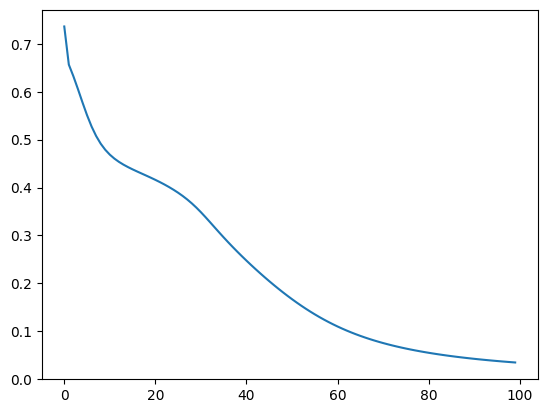

In [65]:
import numpy as np
import pandas as pd
from lib.data_loader import get_monks_dataset

X_train, y_train, X_test, y_test = get_monks_dataset(1, one_hot_encode=True)

loss_history = []

input_size = X_train.shape[1]
hidden_size = 10  # Number of neurons in hidden layer
output_size = y_train.shape[1]
learning_rate = 0.6
epochs = 1000

np.random.seed(42)
W1 = np.random.randn(input_size, hidden_size) * np.sqrt(2 / input_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size) * np.sqrt(2 / hidden_size)
b2 = np.zeros((1, output_size))

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def forward_propagation(X):
    Z1 = np.dot(X, W1) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = sigmoid(Z2)
    return Z1, A1, Z2, A2

def backward_propagation(X, y, Z1, A1, Z2, A2):
    global W1, b1, W2, b2
    
    m = X.shape[0]
    dZ2 = A2 - y
    dW2 = (1/m) * np.dot(A1.T, dZ2)
    db2 = (1/m) * np.sum(dZ2, axis=0, keepdims=True)
    
    dZ1 = np.dot(dZ2, W2.T) * sigmoid_derivative(A1)
    dW1 = (1/m) * np.dot(X.T, dZ1)
    db1 = (1/m) * np.sum(dZ1, axis=0, keepdims=True)
    
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

def binary_crossentropy_loss(y_true, y_pred):
    m = y_true.shape[0]
    epsilon = 1e-8  # small value to avoid division by zero
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)  # clip predictions to avoid log(0)
    loss = -np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred)) / m
    loss_history.append(loss)
    return loss


for epoch in range(epochs):
    Z1, A1, Z2, A2 = forward_propagation(X_train)
    backward_propagation(X_train, y_train, Z1, A1, Z2, A2)
    
    if epoch % 10 == 0:
        loss = binary_crossentropy_loss(y_train, A2)
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

_, _, _, A2_test = forward_propagation(X_test)
predictions = (A2_test > 0.5).astype(int)
accuracy = np.mean(predictions == y_test)
print(f"Test Accuracy: {accuracy:.4f}")

pd.Series(loss_history).plot()

Using cached ../datasets/monks/monk-1-train.csv
Using cached ../datasets/monks/monk-1-test.csv
One-hot encoding MONK-1 dataset...
Epoch 0, Loss: 0.2698
Epoch 10, Loss: 0.2445
Epoch 20, Loss: 0.2394
Epoch 30, Loss: 0.2370
Epoch 40, Loss: 0.2350
Epoch 50, Loss: 0.2329
Epoch 60, Loss: 0.2308
Epoch 70, Loss: 0.2286
Epoch 80, Loss: 0.2265
Epoch 90, Loss: 0.2243
Epoch 100, Loss: 0.2220
Epoch 110, Loss: 0.2197
Epoch 120, Loss: 0.2174
Epoch 130, Loss: 0.2151
Epoch 140, Loss: 0.2128
Epoch 150, Loss: 0.2104
Epoch 160, Loss: 0.2081
Epoch 170, Loss: 0.2057
Epoch 180, Loss: 0.2034
Epoch 190, Loss: 0.2010
Epoch 200, Loss: 0.1988
Epoch 210, Loss: 0.1965
Epoch 220, Loss: 0.1943
Epoch 230, Loss: 0.1921
Epoch 240, Loss: 0.1900
Epoch 250, Loss: 0.1880
Epoch 260, Loss: 0.1860
Epoch 270, Loss: 0.1841
Epoch 280, Loss: 0.1822
Epoch 290, Loss: 0.1804
Epoch 300, Loss: 0.1787
Epoch 310, Loss: 0.1770
Epoch 320, Loss: 0.1754
Epoch 330, Loss: 0.1739
Epoch 340, Loss: 0.1725
Epoch 350, Loss: 0.1711
Epoch 360, Loss: 

<Axes: >

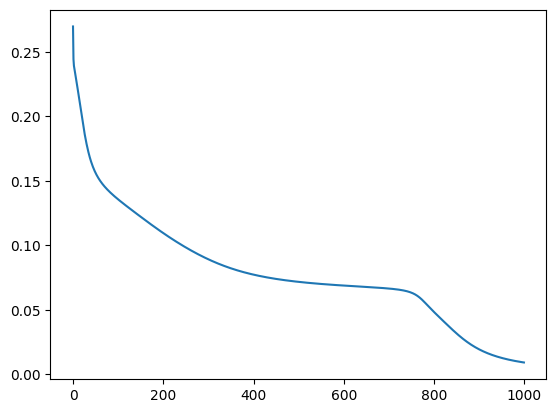

In [66]:
import numpy as np
import pandas as pd
from lib.data_loader import get_monks_dataset

# Caricamento del dataset Monks con one-hot encoding per le etichette
X_train, y_train, X_test, y_test = get_monks_dataset(1, one_hot_encode=True)

# Lista per memorizzare la storia della perdita durante l'allenamento
loss_history = []

# Definizione dell'architettura della rete neurale
input_size = X_train.shape[1]   # Numero di input features
hidden_size = 10                # Numero di neuroni nello strato nascosto
output_size = y_train.shape[1]  # Numero di classi nell'output
learning_rate = 0.45             # Tasso di apprendimento
epochs = 10000                   # Numero di epoche di allenamento
loss_function = "mse"  # Funzione di perdita selezionata

# Inizializzazione dei pesi e dei bias
np.random.seed(42)  # Per la riproducibilità dei risultati
W1 = np.random.randn(input_size, hidden_size) * np.sqrt(2 / input_size)  # Pesi strato nascosto
b1 = np.zeros((1, hidden_size))  # Bias strato nascosto
W2 = np.random.randn(hidden_size, output_size) * np.sqrt(2 / hidden_size)  # Pesi strato output
b2 = np.zeros((1, output_size))  # Bias strato output

# Funzione di attivazione sigmoide
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivata della funzione sigmoide
def sigmoid_derivative(x):
    return x * (1 - x)

# Propagazione in avanti (Forward Propagation)
def forward_propagation(X):
    Z1 = np.dot(X, W1) + b1  # Calcolo pre-attivazione strato nascosto
    A1 = sigmoid(Z1)         # Applicazione funzione di attivazione
    Z2 = np.dot(A1, W2) + b2  # Calcolo pre-attivazione strato output
    A2 = sigmoid(Z2)         # Applicazione funzione di attivazione
    return Z1, A1, Z2, A2

# Funzione di perdita Binary Crossentropy
def binary_crossentropy_loss(y_true, y_pred):
    m = y_true.shape[0]  # Numero di esempi nel batch
    epsilon = 1e-8  # Piccolo valore per evitare divisioni per zero
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)  # Evita log(0)
    return -np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred)) / m

# Funzione di perdita Mean Squared Error (MSE)
def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Selezione della funzione di perdita
def compute_loss(y_true, y_pred):
    loss = binary_crossentropy_loss(y_true, y_pred) if loss_function == "binary_crossentropy" else mse_loss(y_true, y_pred)
    loss_history.append(loss)  # Salvataggio della perdita per analisi successive
    return loss

# Propagazione all'indietro (Backpropagation)
def backward_propagation(X, y, Z1, A1, Z2, A2):
    global W1, b1, W2, b2  # Dichiarazione delle variabili globali
    
    m = X.shape[0]  # Numero di campioni nel batch
    
    # Calcolo dell'errore dell'output in base alla funzione di perdita scelta
    if loss_function == "binary_crossentropy":
        dZ2 = A2 - y  # Derivata della loss rispetto all'output (cross-entropy)
    else:  # Mean Squared Error
        dZ2 = (A2 - y) * sigmoid_derivative(A2)  # Derivata della MSE rispetto all'output
    
    dW2 = (1/m) * np.dot(A1.T, dZ2)  # Gradiente dei pesi dello strato output
    db2 = (1/m) * np.sum(dZ2, axis=0, keepdims=True)  # Gradiente del bias output
    
    # Backpropagation attraverso lo strato nascosto
    dZ1 = np.dot(dZ2, W2.T) * sigmoid_derivative(A1)  # Derivata rispetto all'input dello strato nascosto
    dW1 = (1/m) * np.dot(X.T, dZ1)  # Gradiente dei pesi dello strato nascosto
    db1 = (1/m) * np.sum(dZ1, axis=0, keepdims=True)  # Gradiente del bias strato nascosto
    
    # Aggiornamento dei pesi e dei bias
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

# Allenamento della rete neurale
for epoch in range(epochs):
    Z1, A1, Z2, A2 = forward_propagation(X_train)  # Forward propagation
    backward_propagation(X_train, y_train, Z1, A1, Z2, A2)  # Backpropagation e aggiornamento pesi
    
    if epoch % 10 == 0:  # Ogni 10 epoche calcola la perdita
        loss = compute_loss(y_train, A2)
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

# Valutazione sul set di test
_, _, _, A2_test = forward_propagation(X_test)
predictions = (A2_test > 0.5).astype(int)  # Conversione delle probabilità in classi binarie
accuracy = np.mean(predictions == y_test)  # Calcolo dell'accuratezza
print(f"Test Accuracy: {accuracy:.4f}")

# Visualizzazione della curva di perdita
pd.Series(loss_history).plot()


Using cached ../datasets/monks/monk-1-train.csv
Using cached ../datasets/monks/monk-1-test.csv
One-hot encoding MONK-1 dataset...
Epoch 0, Loss: 0.7041
Epoch 10, Loss: 0.6021
Epoch 20, Loss: 0.4808
Epoch 30, Loss: 0.4053
Epoch 40, Loss: 0.3565
Epoch 50, Loss: 0.3177
Epoch 60, Loss: 0.2856
Epoch 70, Loss: 0.2581
Epoch 80, Loss: 0.2335
Epoch 90, Loss: 0.2122
Epoch 100, Loss: 0.1936
Epoch 110, Loss: 0.1768
Epoch 120, Loss: 0.1614
Epoch 130, Loss: 0.1485
Epoch 140, Loss: 0.1350
Epoch 150, Loss: 0.1230
Epoch 160, Loss: 0.1113
Epoch 170, Loss: 0.1014
Epoch 180, Loss: 0.0928
Epoch 190, Loss: 0.0846
Epoch 200, Loss: 0.0774
Epoch 210, Loss: 0.0708
Epoch 220, Loss: 0.0657
Epoch 230, Loss: 0.0599
Epoch 240, Loss: 0.0555
Epoch 250, Loss: 0.0519
Epoch 260, Loss: 0.0473
Epoch 270, Loss: 0.0441
Epoch 280, Loss: 0.0410
Epoch 290, Loss: 0.0384
Epoch 300, Loss: 0.0358
Epoch 310, Loss: 0.0336
Epoch 320, Loss: 0.0315
Epoch 330, Loss: 0.0296
Epoch 340, Loss: 0.0279
Epoch 350, Loss: 0.0264
Epoch 360, Loss: 

<Axes: >

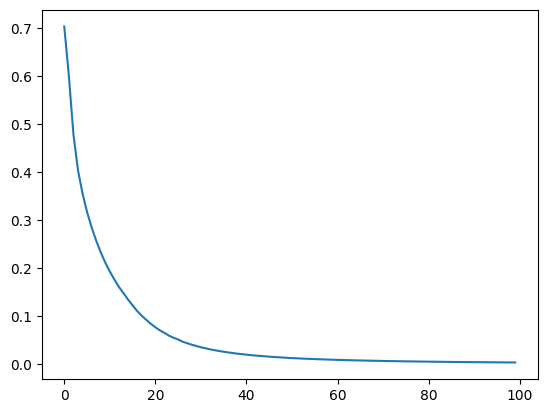

In [67]:
import numpy as np
import pandas as pd
from lib.data_loader import get_monks_dataset

# caricamento del dataset monks con one-hot encoding per le etichette
X_train, y_train, X_test, y_test = get_monks_dataset(1, one_hot_encode=True)

# lista per memorizzare la storia della perdita durante l'allenamento
loss_history = []

# definizione dell'architettura della rete neurale
input_size = X_train.shape[1]   # numero di input features
hidden_size = 10                # numero di neuroni nello strato nascosto
output_size = y_train.shape[1]  # numero di classi nell'output
learning_rate = 0.1             # tasso di apprendimento
epochs = 1000                   # numero di epoche di allenamento
batch_size = 32                 # dimensione del batch
loss_function = "binary_crossentropy"  # funzione di perdita selezionata
activation_function = "relu"  # funzione di attivazione selezionata

# inizializzazione dei pesi e dei bias
np.random.seed(42)  # per la riproducibilità dei risultati
W1 = np.random.randn(input_size, hidden_size) * np.sqrt(2 / input_size)  # pesi strato nascosto
b1 = np.zeros((1, hidden_size))  # bias strato nascosto
W2 = np.random.randn(hidden_size, output_size) * np.sqrt(2 / hidden_size)  # pesi strato output
b2 = np.zeros((1, output_size))  # bias strato output

# definizione delle funzioni di attivazione e delle loro derivate
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

def activation(x):
    return sigmoid(x) if activation_function == "sigmoid" else relu(x)

def activation_derivative(x):
    return sigmoid_derivative(x) if activation_function == "sigmoid" else relu_derivative(x)

# propagazione in avanti (forward propagation)
def forward_propagation(X):
    Z1 = np.dot(X, W1) + b1  # calcolo pre-attivazione strato nascosto
    A1 = activation(Z1)      # applicazione funzione di attivazione
    Z2 = np.dot(A1, W2) + b2  # calcolo pre-attivazione strato output
    A2 = sigmoid(Z2)         # funzione di attivazione finale (sigmoide per classificazione binaria)
    return Z1, A1, Z2, A2

# funzione di perdita binary crossentropy
def binary_crossentropy_loss(y_true, y_pred):
    m = y_true.shape[0]  # numero di esempi nel batch
    epsilon = 1e-8  # piccolo valore per evitare divisioni per zero
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)  # evita log(0)
    return -np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred)) / m

# funzione di perdita mean squared error (mse)
def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# selezione della funzione di perdita
def compute_loss(y_true, y_pred):
    loss = binary_crossentropy_loss(y_true, y_pred) if loss_function == "binary_crossentropy" else mse_loss(y_pred, y_true)
    loss_history.append(loss)  # salvataggio della perdita per analisi successive
    return loss

# propagazione all'indietro (backpropagation)
def backward_propagation(X, y, Z1, A1, Z2, A2):
    global W1, b1, W2, b2  # dichiarazione delle variabili globali
    
    m = X.shape[0]  # numero di campioni nel batch
    
    # calcolo dell'errore dell'output in base alla funzione di perdita scelta
    if loss_function == "binary_crossentropy":
        dZ2 = A2 - y  # derivata della loss rispetto all'output (cross-entropy)
    else:  # mean squared error
        dZ2 = (A2 - y) * sigmoid_derivative(A2)  # derivata della mse rispetto all'output
    
    dW2 = (1/m) * np.dot(A1.T, dZ2)  # gradiente dei pesi dello strato output
    db2 = (1/m) * np.sum(dZ2, axis=0, keepdims=True)  # gradiente del bias output
    
    # backpropagation attraverso lo strato nascosto
    dZ1 = np.dot(dZ2, W2.T) * activation_derivative(A1)  # derivata rispetto all'input dello strato nascosto
    dW1 = (1/m) * np.dot(X.T, dZ1)  # gradiente dei pesi dello strato nascosto
    db1 = (1/m) * np.sum(dZ1, axis=0, keepdims=True)  # gradiente del bias strato nascosto
    
    # aggiornamento dei pesi e dei bias
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

# allenamento della rete neurale con mini-batch gradient descent
for epoch in range(epochs):
    # shuffle dei dati per evitare overfitting
    permutation = np.random.permutation(X_train.shape[0])
    X_train_shuffled = X_train[permutation]
    y_train_shuffled = y_train[permutation]
    
    for i in range(0, X_train.shape[0], batch_size):
        X_batch = X_train_shuffled[i:i+batch_size]
        y_batch = y_train_shuffled[i:i+batch_size]
        
        Z1, A1, Z2, A2 = forward_propagation(X_batch)  # forward propagation
        backward_propagation(X_batch, y_batch, Z1, A1, Z2, A2)  # backpropagation e aggiornamento pesi
    
    if epoch % 10 == 0:  # ogni 10 epoche calcola la perdita
        loss = compute_loss(y_train, forward_propagation(X_train)[-1])
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

# valutazione sul set di test
_, _, _, A2_test = forward_propagation(X_test)
predictions = (A2_test > 0.5).astype(int)  # conversione delle probabilità in classi binarie
accuracy = np.mean(predictions == y_test)  # calcolo dell'accuratezza
print(f"Test Accuracy: {accuracy:.4f}")

pd.Series(loss_history).plot()

Using cached ../datasets/monks/monk-1-train.csv
Using cached ../datasets/monks/monk-1-test.csv
One-hot encoding MONK-1 dataset...
Epoch 0, Loss: 0.2787
Epoch 10, Loss: 0.2360
Epoch 20, Loss: 0.2200
Epoch 30, Loss: 0.2000
Epoch 40, Loss: 0.1757
Epoch 50, Loss: 0.1434
Epoch 60, Loss: 0.1071
Epoch 70, Loss: 0.0780
Epoch 80, Loss: 0.0587
Epoch 90, Loss: 0.0443
Epoch 100, Loss: 0.0335
Epoch 110, Loss: 0.0243
Epoch 120, Loss: 0.0176
Epoch 130, Loss: 0.0127
Epoch 140, Loss: 0.0093
Epoch 150, Loss: 0.0069
Epoch 160, Loss: 0.0051
Epoch 170, Loss: 0.0039
Epoch 180, Loss: 0.0029
Epoch 190, Loss: 0.0022
Epoch 200, Loss: 0.0017
Epoch 210, Loss: 0.0013
Epoch 220, Loss: 0.0011
Epoch 230, Loss: 0.0009
Epoch 240, Loss: 0.0007
Epoch 250, Loss: 0.0006
Epoch 260, Loss: 0.0005
Epoch 270, Loss: 0.0004
Epoch 280, Loss: 0.0003
Epoch 290, Loss: 0.0003
Epoch 300, Loss: 0.0003
Epoch 310, Loss: 0.0002
Epoch 320, Loss: 0.0002
Epoch 330, Loss: 0.0002
Epoch 340, Loss: 0.0001
Epoch 350, Loss: 0.0001
Epoch 360, Loss: 

<Axes: >

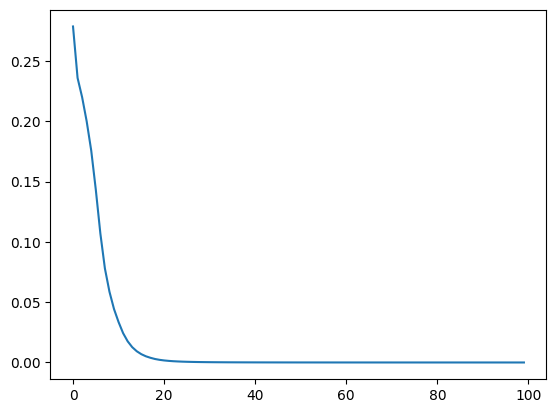

In [68]:
import numpy as np
import pandas as pd
from lib.data_loader import get_monks_dataset

# Parametri
hidden_layers = [10, 8]  # Lista che specifica il numero di neuroni per ogni hidden layer
learning_rate = 0.05
epochs = 1000
batch_size = 32
loss_function = "mse"
activation_function = "relu"

# Caricamento dataset
X_train, y_train, X_test, y_test = get_monks_dataset(1, one_hot_encode=True)
input_size = X_train.shape[1]
output_size = y_train.shape[1]

# Inizializzazione pesi e bias
np.random.seed(42)
layers = [input_size] + hidden_layers + [output_size]
W = [np.random.randn(layers[i], layers[i+1]) * np.sqrt(2 / layers[i]) for i in range(len(layers) - 1)]
b = [np.zeros((1, layers[i+1])) for i in range(len(layers) - 1)]

# Funzioni di attivazione
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

def activation(x):
    return sigmoid(x) if activation_function == "sigmoid" else relu(x)

def activation_derivative(x):
    return sigmoid_derivative(x) if activation_function == "sigmoid" else relu_derivative(x)

# Forward propagation
def forward_propagation(X):
    A = [X]
    Z = []
    for i in range(len(W) - 1):
        Z.append(np.dot(A[-1], W[i]) + b[i])
        A.append(activation(Z[-1]))
    
    Z.append(np.dot(A[-1], W[-1]) + b[-1])
    A.append(sigmoid(Z[-1]))  # Output layer usa sigmoide
    return Z, A

# Funzione di perdita
def binary_crossentropy_loss(y_true, y_pred):
    epsilon = 1e-8
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def compute_loss(y_true, y_pred):
    return binary_crossentropy_loss(y_true, y_pred) if loss_function == "binary_crossentropy" else mse_loss(y_true, y_pred)

# Backward propagation
def backward_propagation(X, y, Z, A):
    global W, b
    m = X.shape[0]
    dZ = A[-1] - y  # Output layer
    
    dW = [np.dot(A[-2].T, dZ) / m]
    db = [np.sum(dZ, axis=0, keepdims=True) / m]
    
    for i in range(len(W) - 2, -1, -1):
        dZ = np.dot(dZ, W[i+1].T) * activation_derivative(A[i+1])
        dW.insert(0, np.dot(A[i].T, dZ) / m)
        db.insert(0, np.sum(dZ, axis=0, keepdims=True) / m)
    
    for i in range(len(W)):
        W[i] -= learning_rate * dW[i]
        b[i] -= learning_rate * db[i]

# Training
loss_history = []
for epoch in range(epochs):
    permutation = np.random.permutation(X_train.shape[0])
    X_train_shuffled = X_train[permutation]
    y_train_shuffled = y_train[permutation]
    
    for i in range(0, X_train.shape[0], batch_size):
        X_batch = X_train_shuffled[i:i+batch_size]
        y_batch = y_train_shuffled[i:i+batch_size]
        
        Z, A = forward_propagation(X_batch)
        backward_propagation(X_batch, y_batch, Z, A)
    
    if epoch % 10 == 0:
        loss = compute_loss(y_train, forward_propagation(X_train)[1][-1])
        loss_history.append(loss)
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

# Test
_, A_test = forward_propagation(X_test)
predictions = (A_test[-1] > 0.5).astype(int)
accuracy = np.mean(predictions == y_test)
print(f"Test Accuracy: {accuracy:.4f}")

pd.Series(loss_history).plot()

Using cached ../datasets/monks/monk-3-train.csv
Using cached ../datasets/monks/monk-3-test.csv
One-hot encoding MONK-3 dataset...
Epoch 0, Loss: 0.2639
Epoch 10, Loss: 0.2558
Epoch 20, Loss: 0.2508
Epoch 30, Loss: 0.2464
Epoch 40, Loss: 0.2422
Epoch 50, Loss: 0.2377
Epoch 60, Loss: 0.2324
Epoch 70, Loss: 0.2258
Epoch 80, Loss: 0.2173
Epoch 90, Loss: 0.2077
Epoch 100, Loss: 0.1958
Epoch 110, Loss: 0.1826
Epoch 120, Loss: 0.1693
Epoch 130, Loss: 0.1560
Epoch 140, Loss: 0.1421
Epoch 150, Loss: 0.1282
Epoch 160, Loss: 0.1134
Epoch 170, Loss: 0.1000
Epoch 180, Loss: 0.0889
Epoch 190, Loss: 0.0798
Epoch 200, Loss: 0.0732
Epoch 210, Loss: 0.0672
Epoch 220, Loss: 0.0628
Epoch 230, Loss: 0.0600
Epoch 240, Loss: 0.0578
Epoch 250, Loss: 0.0560
Epoch 260, Loss: 0.0547
Epoch 270, Loss: 0.0534
Epoch 280, Loss: 0.0524
Epoch 290, Loss: 0.0515
Epoch 300, Loss: 0.0507
Epoch 310, Loss: 0.0502
Epoch 320, Loss: 0.0495
Epoch 330, Loss: 0.0487
Epoch 340, Loss: 0.0481
Epoch 350, Loss: 0.0478
Epoch 360, Loss: 

<Axes: >

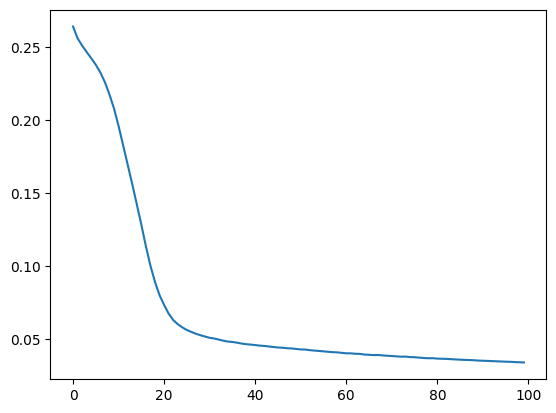

In [69]:
import numpy as np
import pandas as pd
from lib.data_loader import get_monks_dataset

# Parametri per la rete neurale
hidden_layers = [4, 4]
learning_rate = 0.02
epochs = 1000
batch_size = 32
loss_function = "mse"  # "mse" oppure "binary_crossentropy"
activation_function = "relu"
lambda_reg = 0.0005  # Coefficiente di regolarizzazione L2 (Tikhonov)

# Caricamento dataset
X_train, y_train, X_test, y_test = get_monks_dataset(3, one_hot_encode=True)
input_size = X_train.shape[1]
output_size = y_train.shape[1]

# Inizializzazione pesi e bias
np.random.seed(42)
layers = [input_size] + hidden_layers + [output_size]
W = [np.random.randn(layers[i], layers[i+1]) * np.sqrt(2 / layers[i]) for i in range(len(layers) - 1)]
b = [np.zeros((1, layers[i+1])) for i in range(len(layers) - 1)]

# Funzioni di attivazione
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

def activation(x):
    return sigmoid(x) if activation_function == "sigmoid" else relu(x)

def activation_derivative(x):
    return sigmoid_derivative(x) if activation_function == "sigmoid" else relu_derivative(x)

# Forward propagation
def forward_propagation(X):
    A = [X]
    Z = []
    for i in range(len(W) - 1):
        Z.append(np.dot(A[-1], W[i]) + b[i])
        A.append(activation(Z[-1]))
    Z.append(np.dot(A[-1], W[-1]) + b[-1])
    A.append(sigmoid(Z[-1]))  # Output layer usa sigmoide
    return Z, A

# Funzioni di perdita
def binary_crossentropy_loss(y_true, y_pred):
    epsilon = 1e-8
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def compute_loss(y_true, y_pred):
    loss = binary_crossentropy_loss(y_true, y_pred) if loss_function == "binary_crossentropy" else mse_loss(y_true, y_pred)
    reg_term = (lambda_reg / 2) * sum(np.sum(W_i ** 2) for W_i in W)  # L2 regularization
    return loss + reg_term

# Derivata della loss
def loss_derivative(y_true, y_pred):
    epsilon = 1e-8
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    if loss_function == "mse":
        return y_pred - y_true
    elif loss_function == "binary_crossentropy":
        return (y_pred - y_true) / (y_pred * (1 - y_pred))

# Backward propagation con regolarizzazione L2
def backward_propagation(X, y, Z, A):
    global W, b
    m = X.shape[0]
    dZ = loss_derivative(y, A[-1])
    
    dW = [np.dot(A[-2].T, dZ) / m + lambda_reg * W[-1] / m]  # Aggiunta della regolarizzazione
    db = [np.sum(dZ, axis=0, keepdims=True) / m]
    
    for i in range(len(W) - 2, -1, -1):
        dZ = np.dot(dZ, W[i+1].T) * activation_derivative(A[i+1])
        dW.insert(0, np.dot(A[i].T, dZ) / m + lambda_reg * W[i] / m)
        db.insert(0, np.sum(dZ, axis=0, keepdims=True) / m)
    
    for i in range(len(W)):
        W[i] -= learning_rate * dW[i]
        b[i] -= learning_rate * db[i]

# Training
loss_history = []
for epoch in range(epochs):
    permutation = np.random.permutation(X_train.shape[0])
    X_train_shuffled = X_train[permutation]
    y_train_shuffled = y_train[permutation]
    
    for i in range(0, X_train.shape[0], batch_size):
        X_batch = X_train_shuffled[i:i+batch_size]
        y_batch = y_train_shuffled[i:i+batch_size]
        Z, A = forward_propagation(X_batch)
        backward_propagation(X_batch, y_batch, Z, A)
    
    if epoch % 10 == 0:
        loss = compute_loss(y_train, forward_propagation(X_train)[1][-1])
        loss_history.append(loss)
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

# Test
_, A_test = forward_propagation(X_test)
predictions = (A_test[-1] > 0.5).astype(int)
accuracy = np.mean(predictions == y_test)
print(f"Test Accuracy: {accuracy:.4f}")

# Plot della loss nel tempo
pd.Series(loss_history).plot()

Using cached ../datasets/monks/monk-3-train.csv
Using cached ../datasets/monks/monk-3-test.csv
One-hot encoding MONK-3 dataset...
Epoch 0, Loss: 1.5741
Epoch 10, Loss: 1.5251
Epoch 20, Loss: 1.4939
Epoch 30, Loss: 1.4515
Epoch 40, Loss: 1.5236
Epoch 50, Loss: 1.9696
Epoch 60, Loss: 21.0582
Epoch 70, Loss: 21.0413
Epoch 80, Loss: 147.5815
Epoch 90, Loss: 145.9716
Epoch 100, Loss: 146.4080
Epoch 110, Loss: 145.5904
Epoch 120, Loss: 144.8174
Epoch 130, Loss: 144.0553
Epoch 140, Loss: 143.2988
Epoch 150, Loss: 142.5465
Epoch 160, Loss: 141.7983
Epoch 170, Loss: 141.0540
Epoch 180, Loss: 140.3137
Epoch 190, Loss: 139.5772
Epoch 200, Loss: 138.8446
Epoch 210, Loss: 138.1159
Epoch 220, Loss: 137.3911
Epoch 230, Loss: 136.6700
Epoch 240, Loss: 135.9528
Epoch 250, Loss: 135.2393
Epoch 260, Loss: 134.5296
Epoch 270, Loss: 133.8237
Epoch 280, Loss: 133.1215
Epoch 290, Loss: 132.4230
Epoch 300, Loss: 131.7281
Epoch 310, Loss: 131.0370
Epoch 320, Loss: 130.3494
Epoch 330, Loss: 129.6655
Epoch 340, 

<Axes: >

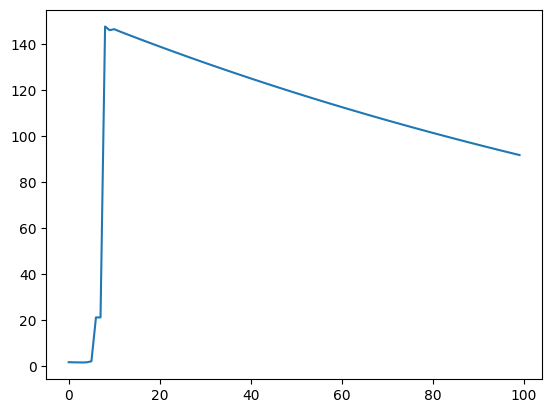

In [70]:
import numpy as np
import pandas as pd
from lib.data_loader import get_monks_dataset

# Parametri per la rete neurale
hidden_layers = [4, 4]
learning_rate = 0.02
epochs = 1000
batch_size = 32
loss_function = "binary_crossentropy"  # "mse" oppure "binary_crossentropy"
activation_function = "relu"
lambda_reg = 0.1  # Coefficiente di regolarizzazione L2 (Tikhonov)

# Caricamento dataset
X_train, y_train, X_test, y_test = get_monks_dataset(3, one_hot_encode=True)
input_size = X_train.shape[1]
output_size = y_train.shape[1]

# Inizializzazione pesi e bias
np.random.seed(42)
layers = [input_size] + hidden_layers + [output_size]
W = [np.random.randn(layers[i], layers[i+1]) * np.sqrt(2 / layers[i]) for i in range(len(layers) - 1)]
b = [np.zeros((1, layers[i+1])) for i in range(len(layers) - 1)]

# Funzioni di attivazione
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

def activation(x):
    return sigmoid(x) if activation_function == "sigmoid" else relu(x)

def activation_derivative(x):
    return sigmoid_derivative(x) if activation_function == "sigmoid" else relu_derivative(x)

# Forward propagation
def forward_propagation(X):
    A = [X]
    Z = []
    for i in range(len(W) - 1):
        Z.append(np.dot(A[-1], W[i]) + b[i])
        A.append(activation(Z[-1]))
    Z.append(np.dot(A[-1], W[-1]) + b[-1])
    A.append(sigmoid(Z[-1]))  # Output layer usa sigmoide
    return Z, A

# Funzioni di perdita
def binary_crossentropy_loss(y_true, y_pred):
    epsilon = 1e-8
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def compute_loss(y_true, y_pred):
    loss = binary_crossentropy_loss(y_true, y_pred) if loss_function == "binary_crossentropy" else mse_loss(y_true, y_pred)
    reg_term = (lambda_reg / 2) * sum(np.sum(W_i ** 2) for W_i in W)  # L2 regularization
    return loss + reg_term

# Derivata della loss
def loss_derivative(y_true, y_pred):
    epsilon = 1e-8
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    if loss_function == "mse":
        return y_pred - y_true
    elif loss_function == "binary_crossentropy":
        return (y_pred - y_true) / (y_pred * (1 - y_pred))

# Backward propagation con regolarizzazione L2
def backward_propagation(X, y, Z, A):
    global W, b
    m = X.shape[0]
    dZ = loss_derivative(y, A[-1])
    
    dW = [np.dot(A[-2].T, dZ) / m + lambda_reg * W[-1] / m]  # Aggiunta della regolarizzazione
    db = [np.sum(dZ, axis=0, keepdims=True) / m]
    
    for i in range(len(W) - 2, -1, -1):
        dZ = np.dot(dZ, W[i+1].T) * activation_derivative(A[i+1])
        dW.insert(0, np.dot(A[i].T, dZ) / m + lambda_reg * W[i] / m)
        db.insert(0, np.sum(dZ, axis=0, keepdims=True) / m)
    
    for i in range(len(W)):
        W[i] -= learning_rate * dW[i]
        b[i] -= learning_rate * db[i]

# Training
loss_history = []
for epoch in range(epochs):
    permutation = np.random.permutation(X_train.shape[0])
    X_train_shuffled = X_train[permutation]
    y_train_shuffled = y_train[permutation]
    
    for i in range(0, X_train.shape[0], batch_size):
        X_batch = X_train_shuffled[i:i+batch_size]
        y_batch = y_train_shuffled[i:i+batch_size]
        Z, A = forward_propagation(X_batch)
        backward_propagation(X_batch, y_batch, Z, A)
    
    if epoch % 10 == 0:
        loss = compute_loss(y_train, forward_propagation(X_train)[1][-1])
        loss_history.append(loss)
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

# Test
_, A_test = forward_propagation(X_test)
predictions = (A_test[-1] > 0.5).astype(int)
accuracy = np.mean(predictions == y_test)
print(f"Test Accuracy: {accuracy:.4f}")

# Plot della loss nel tempo
pd.Series(loss_history).plot()

Using cached ../datasets/monks/monk-3-train.csv
Using cached ../datasets/monks/monk-3-test.csv
One-hot encoding MONK-3 dataset...
Epoch 0, Loss: 0.8021
Epoch 10, Loss: 0.7914
Epoch 20, Loss: 0.7829
Epoch 30, Loss: 0.7759
Epoch 40, Loss: 0.7700
Epoch 50, Loss: 0.7648
Epoch 60, Loss: 0.7603
Epoch 70, Loss: 0.7560
Epoch 80, Loss: 0.7519
Epoch 90, Loss: 0.7482
Epoch 100, Loss: 0.7445
Epoch 110, Loss: 0.7410
Epoch 120, Loss: 0.7377
Epoch 130, Loss: 0.7345
Epoch 140, Loss: 0.7315
Epoch 150, Loss: 0.7285
Epoch 160, Loss: 0.7253
Epoch 170, Loss: 0.7221
Epoch 180, Loss: 0.7187
Epoch 190, Loss: 0.7152
Epoch 200, Loss: 0.7115
Epoch 210, Loss: 0.7076
Epoch 220, Loss: 0.7034
Epoch 230, Loss: 0.6992
Epoch 240, Loss: 0.6948
Epoch 250, Loss: 0.6903
Epoch 260, Loss: 0.6858
Epoch 270, Loss: 0.6808
Epoch 280, Loss: 0.6756
Epoch 290, Loss: 0.6701
Epoch 300, Loss: 0.6645
Epoch 310, Loss: 0.6586
Epoch 320, Loss: 0.6523
Epoch 330, Loss: 0.6461
Epoch 340, Loss: 0.6397
Epoch 350, Loss: 0.6326
Epoch 360, Loss: 

<Axes: >

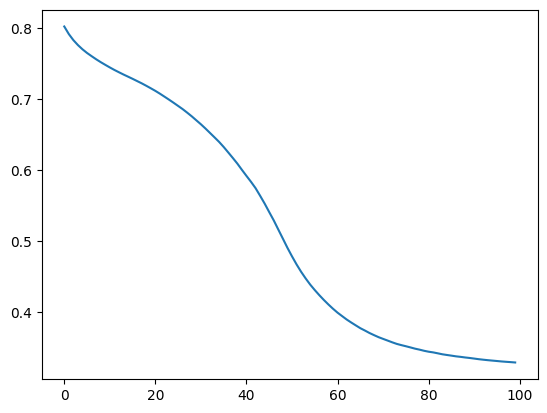

In [71]:
import numpy as np
import pandas as pd
from lib.data_loader import get_monks_dataset

# Parametri per la rete neurale
hidden_layers = [4, 4]
learning_rate = 0.9
epochs = 1000
batch_size = 32
loss_function = "binary_crossentropy"  # "mse" oppure "binary_crossentropy"
activation_function = "relu"  # Attivazione per i layer nascosti
output_activation_function = "sigmoid"  # Attivazione per l'output layer
lambda_reg = 0.01  # Coefficiente di regolarizzazione L2 (Tikhonov)

# Caricamento dataset
X_train, y_train, X_test, y_test = get_monks_dataset(3, one_hot_encode=True)
input_size = X_train.shape[1]
output_size = y_train.shape[1]

# Inizializzazione pesi e bias
np.random.seed(42)
layers = [input_size] + hidden_layers + [output_size]
W = [np.random.randn(layers[i], layers[i+1]) * np.sqrt(2 / layers[i]) for i in range(len(layers) - 1)]
b = [np.zeros((1, layers[i+1])) for i in range(len(layers) - 1)]

# Funzioni di attivazione
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(a):
    # a = sigmoid(x)
    return a * (1 - a)

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

# Funzione per i layer nascosti (parametrica)
def activation(x):
    return sigmoid(x) if activation_function == "sigmoid" else relu(x)

def activation_derivative(a):
    return sigmoid_derivative(a) if activation_function == "sigmoid" else relu_derivative(a)

# Funzione per l'output layer (parametrica)
def output_activation(x):
    return sigmoid(x) if output_activation_function == "sigmoid" else relu(x)

def output_activation_derivative(a):
    return sigmoid_derivative(a) if output_activation_function == "sigmoid" else relu_derivative(a)

# Forward propagation
def forward_propagation(X):
    A = [X]
    Z = []
    # Calcolo per i layer nascosti
    for i in range(len(W) - 1):
        Z_curr = np.dot(A[-1], W[i]) + b[i]
        Z.append(Z_curr)
        A.append(activation(Z_curr))
    # Output layer: usiamo la funzione di attivazione parametrica
    Z_output = np.dot(A[-1], W[-1]) + b[-1]
    Z.append(Z_output)
    A.append(output_activation(Z_output))
    return Z, A

# Funzioni di perdita
def binary_crossentropy_loss(y_true, y_pred):
    epsilon = 1e-8
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def compute_loss(y_true, y_pred):
    loss = binary_crossentropy_loss(y_true, y_pred) if loss_function == "binary_crossentropy" else mse_loss(y_true, y_pred)
    reg_term = (lambda_reg / 2) * sum(np.sum(W_i ** 2) for W_i in W)  # L2 regularization
    return loss + reg_term

# Derivata della loss rispetto all'output A (senza considerare l'attivazione)
def loss_derivative(y_true, y_pred):
    m = y_true.shape[0]
    if loss_function == "mse":
        return (y_pred - y_true) / m
    elif loss_function == "binary_crossentropy":
        # Nota: se l'output activation è sigmoid, la derivata combinata (loss + sigmoide) si semplifica
        # Tuttavia, per mantenere tutto parametrico, calcoliamo la derivata della loss e poi moltiplichiamo per quella dell'attivazione
        return (y_pred - y_true) / m

# Backward propagation con regolarizzazione L2
def backward_propagation(X, y, Z, A):
    global W, b
    m = X.shape[0]
    # Calcolo del gradiente per l'output layer
    dA_output = loss_derivative(y, A[-1])
    # Moltiplichiamo per la derivata della funzione di attivazione dell'output
    dZ_output = dA_output * output_activation_derivative(A[-1])
    dW = [np.dot(A[-2].T, dZ_output) / m + lambda_reg * W[-1] / m]
    db = [np.sum(dZ_output, axis=0, keepdims=True) / m]
    
    # Propagazione all'indietro per i layer nascosti
    dZ = dZ_output  # inizialmente dZ per l'output layer
    for i in range(len(W) - 2, -1, -1):
        # dA del layer corrente (calcolato tramite il layer successivo)
        dA = np.dot(dZ, W[i+1].T)
        # Moltiplichiamo per la derivata dell'attivazione del layer nascosto
        dZ = dA * activation_derivative(A[i+1])
        dW.insert(0, np.dot(A[i].T, dZ) / m + lambda_reg * W[i] / m)
        db.insert(0, np.sum(dZ, axis=0, keepdims=True) / m)
    
    # Aggiornamento dei pesi e bias
    for i in range(len(W)):
        W[i] -= learning_rate * dW[i]
        b[i] -= learning_rate * db[i]

# Training
loss_history = []
for epoch in range(epochs):
    permutation = np.random.permutation(X_train.shape[0])
    X_train_shuffled = X_train[permutation]
    y_train_shuffled = y_train[permutation]
    
    for i in range(0, X_train.shape[0], batch_size):
        X_batch = X_train_shuffled[i:i+batch_size]
        y_batch = y_train_shuffled[i:i+batch_size]
        Z, A = forward_propagation(X_batch)
        backward_propagation(X_batch, y_batch, Z, A)
    
    if epoch % 10 == 0:
        loss = compute_loss(y_train, forward_propagation(X_train)[1][-1])
        loss_history.append(loss)
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

# Test
_, A_test = forward_propagation(X_test)
predictions = (A_test[-1] > 0.5).astype(int)
accuracy = np.mean(predictions == y_test)
print(f"Test Accuracy: {accuracy:.4f}")

# Plot della loss nel tempo
pd.Series(loss_history).plot()


Using cached ../datasets/monks/monk-3-train.csv
Using cached ../datasets/monks/monk-3-test.csv
One-hot encoding MONK-3 dataset...
Epoch 0, Loss: 0.2171
Epoch 10, Loss: 0.2129
Epoch 20, Loss: 0.2092
Epoch 30, Loss: 0.2059
Epoch 40, Loss: 0.2030
Epoch 50, Loss: 0.2003
Epoch 60, Loss: 0.1978
Epoch 70, Loss: 0.1954
Epoch 80, Loss: 0.1932
Epoch 90, Loss: 0.1910
Epoch 100, Loss: 0.1889
Epoch 110, Loss: 0.1869
Epoch 120, Loss: 0.1850
Epoch 130, Loss: 0.1832
Epoch 140, Loss: 0.1814
Epoch 150, Loss: 0.1797
Epoch 160, Loss: 0.1779
Epoch 170, Loss: 0.1762
Epoch 180, Loss: 0.1745
Epoch 190, Loss: 0.1728
Epoch 200, Loss: 0.1710
Epoch 210, Loss: 0.1693
Epoch 220, Loss: 0.1675
Epoch 230, Loss: 0.1657
Epoch 240, Loss: 0.1640
Epoch 250, Loss: 0.1622
Epoch 260, Loss: 0.1605
Epoch 270, Loss: 0.1587
Epoch 280, Loss: 0.1569
Epoch 290, Loss: 0.1550
Epoch 300, Loss: 0.1531
Epoch 310, Loss: 0.1512
Epoch 320, Loss: 0.1493
Epoch 330, Loss: 0.1474
Epoch 340, Loss: 0.1455
Epoch 350, Loss: 0.1434
Epoch 360, Loss: 

<Axes: >

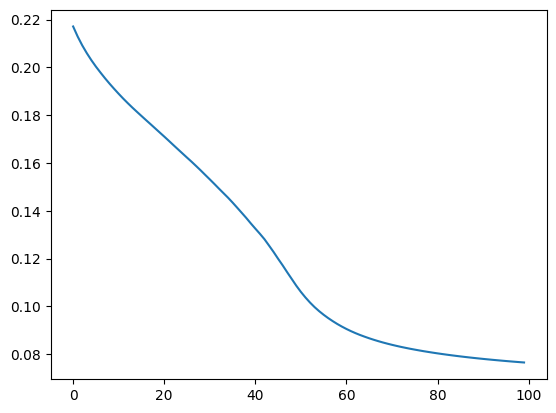

In [72]:
import numpy as np
import pandas as pd
from lib.data_loader import get_monks_dataset

# Parametri
hidden_layers = [4, 4]
learning_rate = 0.9
epochs = 1000
batch_size = 32
loss_function = "mse"  # oppure "mse"
activation_function = "relu"           # oppure "sigmoid"
output_activation_function = "sigmoid" # oppure "relu"
lambda_reg = 0.01

# Caricamento del dataset
X_train, y_train, X_test, y_test = get_monks_dataset(3, one_hot_encode=True)
input_size = X_train.shape[1]
output_size = y_train.shape[1]

# Inizializzazione dei pesi e bias
np.random.seed(42)
layers = [input_size] + hidden_layers + [output_size]
W = [np.random.randn(layers[i], layers[i+1]) * np.sqrt(2 / layers[i])
     for i in range(len(layers) - 1)]
b = [np.zeros((1, layers[i+1])) for i in range(len(layers) - 1)]

# Funzioni di attivazione e loro derivate
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(a):
    return a * (1 - a)

def relu(x):
    return np.maximum(0, x)

def relu_derivative(z):
    return (z > 0).astype(float)

def activation(x):
    if activation_function == "sigmoid":
        return sigmoid(x)
    else:
        return relu(x)

def activation_derivative(z, a):
    """
    Utilizza i valori pre-attivazione (z) per il calcolo della derivata,
    utile soprattutto per ReLU.
    """
    if activation_function == "sigmoid":
        return sigmoid_derivative(a)
    else:
        return relu_derivative(z)

def output_activation(x):
    if output_activation_function == "sigmoid":
        return sigmoid(x)
    else:
        return relu(x)

def output_activation_derivative(z, a):
    if output_activation_function == "sigmoid":
        return sigmoid_derivative(a)
    else:
        return relu_derivative(z)

# Forward propagation: memorizza sia Z (pre-attivazione) che A (attivazione)
def forward_propagation(X):
    A = [X]
    Z = []
    # Layer nascosti
    for i in range(len(W) - 1):
        Z_curr = np.dot(A[-1], W[i]) + b[i]
        Z.append(Z_curr)
        A.append(activation(Z_curr))
    # Layer di output
    Z_output = np.dot(A[-1], W[-1]) + b[-1]
    Z.append(Z_output)
    A.append(output_activation(Z_output))
    return Z, A

# Funzioni di loss
def binary_crossentropy_loss(y_true, y_pred):
    epsilon = 1e-8
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

def mse_loss(y_true, y_pred):
    # Usando 0.5 per semplificare la derivata
    return 0.5 * np.mean((y_true - y_pred) ** 2)

def compute_loss(y_true, y_pred):
    loss = (binary_crossentropy_loss(y_true, y_pred)
            if loss_function == "binary_crossentropy" else mse_loss(y_true, y_pred))
    reg_term = (lambda_reg / 2) * sum(np.sum(W_i ** 2) for W_i in W)
    return loss + reg_term

def loss_derivative(y_true, y_pred):
    m = y_true.shape[0]
    # Per entrambe le loss (con sigmoid in output e one-hot encoding per binary_crossentropy)
    # la derivata risulta (y_pred - y_true) se la loss è definita in questo modo.
    return (y_pred - y_true) / m

# Backward propagation: calcola i gradienti e aggiorna i pesi e i bias
def backward_propagation(X, y, Z, A):
    global W, b
    m = X.shape[0]
    # Layer di output
    dA = loss_derivative(y, A[-1])
    dZ = dA * output_activation_derivative(Z[-1], A[-1])
    dW = [np.dot(A[-2].T, dZ) / m + lambda_reg * W[-1] / m]
    db = [np.sum(dZ, axis=0, keepdims=True) / m]

    # Layer nascosti (iterando all'indietro)
    for i in range(len(W) - 2, -1, -1):
        dA = np.dot(dZ, W[i+1].T)
        dZ = dA * activation_derivative(Z[i], A[i+1])
        dW.insert(0, np.dot(A[i].T, dZ) / m + lambda_reg * W[i] / m)
        db.insert(0, np.sum(dZ, axis=0, keepdims=True) / m)

    # Aggiornamento dei pesi e dei bias
    for i in range(len(W)):
        W[i] -= learning_rate * dW[i]
        b[i] -= learning_rate * db[i]

# Ciclo di training
loss_history = []
for epoch in range(epochs):
    permutation = np.random.permutation(X_train.shape[0])
    X_train_shuffled = X_train[permutation]
    y_train_shuffled = y_train[permutation]
    for i in range(0, X_train.shape[0], batch_size):
        X_batch = X_train_shuffled[i:i + batch_size]
        y_batch = y_train_shuffled[i:i + batch_size]
        Z, A = forward_propagation(X_batch)
        backward_propagation(X_batch, y_batch, Z, A)
    if epoch % 10 == 0:
        Z_train, A_train = forward_propagation(X_train)
        loss = compute_loss(y_train, A_train[-1])
        loss_history.append(loss)
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

# Valutazione sul test set
Z_test, A_test = forward_propagation(X_test)
if output_size == 1:
    predictions = (A_test[-1] > 0.5).astype(int)
    accuracy = np.mean(predictions == y_test)
else:
    predictions = np.argmax(A_test[-1], axis=1)
    labels = np.argmax(y_test, axis=1)
    accuracy = np.mean(predictions == labels)
print(f"Test Accuracy: {accuracy:.4f}")

pd.Series(loss_history).plot()

Using cached ../datasets/monks/monk-3-train.csv
Using cached ../datasets/monks/monk-3-test.csv
One-hot encoding MONK-3 dataset...
Epoch 0, Loss: 0.2595
Epoch 15, Loss: 0.2474
Epoch 30, Loss: 0.2393
Epoch 45, Loss: 0.2309
Epoch 60, Loss: 0.2188
Epoch 75, Loss: 0.2028
Epoch 90, Loss: 0.1809
Epoch 105, Loss: 0.1584
Epoch 120, Loss: 0.1360
Epoch 135, Loss: 0.1122
Epoch 150, Loss: 0.0920
Epoch 165, Loss: 0.0778
Epoch 180, Loss: 0.0684
Epoch 195, Loss: 0.0621
Epoch 210, Loss: 0.0578
Epoch 225, Loss: 0.0548
Epoch 240, Loss: 0.0525
Epoch 255, Loss: 0.0506
Epoch 270, Loss: 0.0491
Epoch 285, Loss: 0.0478
Test Accuracy: 0.9606


<Axes: >

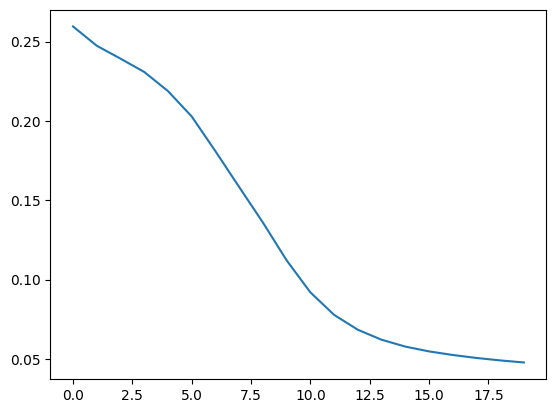

In [73]:
import numpy as np
import pandas as pd
from lib.data_loader import get_monks_dataset

# ============================
# Funzioni di attivazione e derivate
# ============================

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(z, a):
    # z non viene usato, ma lo manteniamo per avere la stessa firma
    return a * (1 - a)

def relu(x):
    return np.maximum(0, x)

def relu_derivative(z, a):
    return (z > 0).astype(float)

activation_functions = {
    "sigmoid": sigmoid,
    "relu": relu
}

activation_derivatives = {
    "sigmoid": lambda z, a: sigmoid_derivative(z, a),
    "relu": lambda z, a: relu_derivative(z, a)
}

# ============================
# Funzioni di loss e derivate
# ============================

def binary_crossentropy_loss(y_true, y_pred):
    epsilon = 1e-8
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

def binary_crossentropy_derivative(y_true, y_pred):
    epsilon = 1e-8
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    # Derivata elementwise: dL/dy_pred = - y_true/y_pred + (1-y_true)/(1-y_pred)
    return - (y_true / y_pred) + ((1 - y_true) / (1 - y_pred))

def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def mse_derivative(y_true, y_pred):
    return 2 * (y_pred - y_true)

loss_functions = {
    "binary_crossentropy": binary_crossentropy_loss,
    "mse": mse_loss
}

loss_derivatives = {
    "binary_crossentropy": binary_crossentropy_derivative,
    "mse": mse_derivative
}

# ============================
# Classe della Rete Neurale
# ============================

class NeuralNetwork:
    def __init__(self, layers, learning_rate=0.9, lambda_reg=0.01,
                 loss_function_name="binary_crossentropy",
                 activation_function_name="relu",
                 output_activation_function_name="sigmoid"):
        """
        :param layers: lista con la dimensione di ogni layer (input, hidden, output)
        :param learning_rate: tasso di apprendimento
        :param lambda_reg: coefficiente di regolarizzazione L2
        :param loss_function_name: nome della funzione di loss (deve essere presente in loss_functions e loss_derivatives)
        :param activation_function_name: nome della funzione di attivazione per i layer nascosti
        :param output_activation_function_name: nome della funzione di attivazione per il layer di output
        """
        self.layers = layers
        self.learning_rate = learning_rate
        self.lambda_reg = lambda_reg
        self.loss_function_name = loss_function_name
        self.activation_function_name = activation_function_name
        self.output_activation_function_name = output_activation_function_name
        self._initialize_parameters()
        
    def _initialize_parameters(self):
        """Inizializza i pesi e bias utilizzando un metodo di inizializzazione (He in questo esempio)."""
        self.W = []
        self.b = []
        np.random.seed(42)
        for i in range(len(self.layers) - 1):
            weight = np.random.randn(self.layers[i], self.layers[i + 1]) * np.sqrt(2 / self.layers[i])
            self.W.append(weight)
            self.b.append(np.zeros((1, self.layers[i + 1])))
    
    def _apply_activation(self, x, func_name):
        if func_name not in activation_functions:
            raise ValueError(f"Attivazione non supportata: {func_name}")
        return activation_functions[func_name](x)
    
    def _apply_activation_derivative(self, z, a, func_name):
        if func_name not in activation_derivatives:
            raise ValueError(f"Derivata dell'attivazione non supportata: {func_name}")
        return activation_derivatives[func_name](z, a)
    
    def _forward(self, X):
        """
        Esegue la forward propagation e ritorna le liste:
        - Z: valori pre-attivazione per ogni layer
        - A: output attivati per ogni layer (incluso l'input come A[0])
        """
        A = [X]
        Z = []
        # Propagazione attraverso i layer nascosti
        for i in range(len(self.W) - 1):
            z_curr = np.dot(A[-1], self.W[i]) + self.b[i]
            Z.append(z_curr)
            a_curr = self._apply_activation(z_curr, self.activation_function_name)
            A.append(a_curr)
        # Propagazione nel layer di output
        z_out = np.dot(A[-1], self.W[-1]) + self.b[-1]
        Z.append(z_out)
        a_out = self._apply_activation(z_out, self.output_activation_function_name)
        A.append(a_out)
        return Z, A
    
    def _backward(self, X, y, Z, A):
        """
        Esegue la backward propagation calcolando i gradienti e aggiornando i parametri.
        La catena del gradiente viene calcolata in maniera modulare.
        """
        m = X.shape[0]
        if self.loss_function_name not in loss_derivatives:
            raise ValueError(f"Derivata della loss non supportata: {self.loss_function_name}")
        # Calcola dL/dy_pred per l'output
        dA = loss_derivatives[self.loss_function_name](y, A[-1])
        # Calcola dL/dz nel layer di output
        dZ = dA * self._apply_activation_derivative(Z[-1], A[-1], self.output_activation_function_name)
        dW = [np.dot(A[-2].T, dZ) / m + self.lambda_reg * self.W[-1] / m]
        db = [np.sum(dZ, axis=0, keepdims=True) / m]
        
        # Backpropagation nei layer nascosti
        for i in range(len(self.W) - 2, -1, -1):
            dA = np.dot(dZ, self.W[i + 1].T)
            dZ = dA * self._apply_activation_derivative(Z[i], A[i + 1], self.activation_function_name)
            dW.insert(0, np.dot(A[i].T, dZ) / m + self.lambda_reg * self.W[i] / m)
            db.insert(0, np.sum(dZ, axis=0, keepdims=True) / m)
        
        # Aggiorna i parametri
        for i in range(len(self.W)):
            self.W[i] -= self.learning_rate * dW[i]
            self.b[i] -= self.learning_rate * db[i]
    
    def train(self, X, y, epochs=1000, batch_size=32, verbose=True):
        """
        Esegue il training della rete mediante mini-batch gradient descent.
        Ritorna la lista degli errori per ogni epoca (ogni 10 epoche).
        """
        loss_history = []
        for epoch in range(epochs):
            permutation = np.random.permutation(X.shape[0])
            X_shuffled = X[permutation]
            y_shuffled = y[permutation]
            for i in range(0, X.shape[0], batch_size):
                X_batch = X_shuffled[i:i + batch_size]
                y_batch = y_shuffled[i:i + batch_size]
                Z, A = self._forward(X_batch)
                self._backward(X_batch, y_batch, Z, A)
            if epoch % int(epochs/20) == 0:
                _, A_full = self._forward(X)
                loss = loss_functions[self.loss_function_name](y, A_full[-1])
                reg_term = (self.lambda_reg / 2) * sum(np.sum(w ** 2) for w in self.W)
                total_loss = loss + reg_term
                loss_history.append(total_loss)
                if verbose:
                    print(f"Epoch {epoch}, Loss: {total_loss:.4f}")
        return loss_history
    
    def predict(self, X):
        """
        Restituisce le predizioni:
          - Se l'output ha un solo neurone, viene usata una soglia a 0.5.
          - Se l'output è one-hot encoded, viene usato argmax.
        """
        _, A = self._forward(X)
        output = A[-1]
        if output.shape[1] == 1:
            return (output > 0.5).astype(int)
        else:
            return np.argmax(output, axis=1)
    
    def evaluate(self, X, y):
        """
        Calcola l'accuratezza.
        Se y è one-hot encoded, converte le etichette in formato indice.
        """
        predictions = self.predict(X)
        if y.ndim > 1 and y.shape[1] > 1:
            y_true = np.argmax(y, axis=1)
        else:
            y_true = y
        return np.mean(predictions == y_true)

# ============================
# Esecuzione: Caricamento dataset, training e valutazione
# ============================

X_train, y_train, X_test, y_test = get_monks_dataset(3, one_hot_encode=True)
input_size = X_train.shape[1]
output_size = y_train.shape[1]
layers = [input_size, 4, 4, output_size]

# Istanziamo la rete con i parametri desiderati (nessuna assunzione implicita)
nn = NeuralNetwork(
    layers,
    learning_rate=0.05,
    lambda_reg=0.00001,
    loss_function_name="mse",
    activation_function_name="relu",
    output_activation_function_name="sigmoid"
)

loss_history = nn.train(X_train, y_train, epochs=300, batch_size=32, verbose=True)
accuracy = nn.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

pd.Series(loss_history).plot()


Using cached ../datasets/monks/monk-3-train.csv
Using cached ../datasets/monks/monk-3-test.csv
One-hot encoding MONK-3 dataset...
Epoch 0, Loss: 0.2596
Epoch 15, Loss: 0.2474
Epoch 30, Loss: 0.2392
Epoch 45, Loss: 0.2308
Epoch 60, Loss: 0.2186
Epoch 75, Loss: 0.2024
Epoch 90, Loss: 0.1803
Epoch 105, Loss: 0.1579
Epoch 120, Loss: 0.1358
Epoch 135, Loss: 0.1123
Epoch 150, Loss: 0.0921
Epoch 165, Loss: 0.0778
Epoch 180, Loss: 0.0684
Epoch 195, Loss: 0.0620
Epoch 210, Loss: 0.0577
Epoch 225, Loss: 0.0547
Epoch 240, Loss: 0.0524
Epoch 255, Loss: 0.0506
Epoch 270, Loss: 0.0490
Epoch 285, Loss: 0.0477
Test Accuracy: 0.9630


<Axes: >

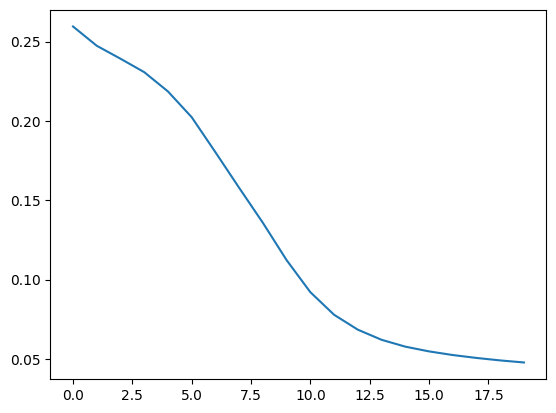

In [74]:
import numpy as np
import pandas as pd
from lib.data_loader import get_monks_dataset

# ============================
# Funzioni di attivazione e derivate
# ============================

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(z, a):
    # z non viene usato, ma lo manteniamo per avere la stessa firma
    return a * (1 - a)

def relu(x):
    return np.maximum(0, x)

def relu_derivative(z, a):
    return (z > 0).astype(float)

activation_functions = {
    "sigmoid": sigmoid,
    "relu": relu
}

activation_derivatives = {
    "sigmoid": lambda z, a: sigmoid_derivative(z, a),
    "relu": lambda z, a: relu_derivative(z, a)
}

# ============================
# Funzioni di loss e derivate
# ============================

def binary_crossentropy_loss(y_true, y_pred):
    epsilon = 1e-8
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

def binary_crossentropy_derivative(y_true, y_pred):
    epsilon = 1e-8
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    # Derivata elementwise: dL/dy_pred = - y_true/y_pred + (1-y_true)/(1-y_pred)
    return - (y_true / y_pred) + ((1 - y_true) / (1 - y_pred))

def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def mse_derivative(y_true, y_pred):
    return 2 * (y_pred - y_true)

loss_functions = {
    "binary_crossentropy": binary_crossentropy_loss,
    "mse": mse_loss
}

loss_derivatives = {
    "binary_crossentropy": binary_crossentropy_derivative,
    "mse": mse_derivative
}

# ============================
# Classe della Rete Neurale
# ============================

class NeuralNetwork:
    def __init__(self, layers, learning_rate=0.9, lambda_reg=0, reg_type="l2",
                 loss_function_name="binary_crossentropy",
                 activation_function_name="relu",
                 output_activation_function_name="sigmoid"):
        """
        :param layers: lista con la dimensione di ogni layer (input, hidden, output)
        :param learning_rate: tasso di apprendimento
        :param lambda_reg: coefficiente di regolarizzazione
        :param reg_type: tipo di regolarizzazione ("l2" o "l1")
        :param loss_function_name: nome della funzione di loss (deve essere presente in loss_functions e loss_derivatives)
        :param activation_function_name: nome della funzione di attivazione per i layer nascosti
        :param output_activation_function_name: nome della funzione di attivazione per il layer di output
        """
        self.layers = layers
        self.learning_rate = learning_rate
        self.lambda_reg = lambda_reg
        self.reg_type = reg_type
        self.loss_function_name = loss_function_name
        self.activation_function_name = activation_function_name
        self.output_activation_function_name = output_activation_function_name
        self._initialize_parameters()
        
    def _initialize_parameters(self):
        """Inizializza i pesi e bias utilizzando un metodo di inizializzazione (He in questo esempio)."""
        self.W = []
        self.b = []
        np.random.seed(42)
        for i in range(len(self.layers) - 1):
            weight = np.random.randn(self.layers[i], self.layers[i + 1]) * np.sqrt(2 / self.layers[i])
            self.W.append(weight)
            self.b.append(np.zeros((1, self.layers[i + 1])))
    
    def _apply_activation(self, x, func_name):
        if func_name not in activation_functions:
            raise ValueError(f"Attivazione non supportata: {func_name}")
        return activation_functions[func_name](x)
    
    def _apply_activation_derivative(self, z, a, func_name):
        if func_name not in activation_derivatives:
            raise ValueError(f"Derivata dell'attivazione non supportata: {func_name}")
        return activation_derivatives[func_name](z, a)
    
    def _forward(self, X):
        """
        Esegue la forward propagation e ritorna le liste:
        - Z: valori pre-attivazione per ogni layer
        - A: output attivati per ogni layer (incluso l'input come A[0])
        """
        A = [X]
        Z = []
        # Propagazione attraverso i layer nascosti
        for i in range(len(self.W) - 1):
            z_curr = np.dot(A[-1], self.W[i]) + self.b[i]
            Z.append(z_curr)
            a_curr = self._apply_activation(z_curr, self.activation_function_name)
            A.append(a_curr)
        # Propagazione nel layer di output
        z_out = np.dot(A[-1], self.W[-1]) + self.b[-1]
        Z.append(z_out)
        a_out = self._apply_activation(z_out, self.output_activation_function_name)
        A.append(a_out)
        return Z, A
    
    def _backward(self, X, y, Z, A):
        """
        Esegue la backward propagation calcolando i gradienti e aggiornando i parametri.
        La catena del gradiente viene calcolata in maniera modulare.
        """
        m = X.shape[0]
        if self.loss_function_name not in loss_derivatives:
            raise ValueError(f"Derivata della loss non supportata: {self.loss_function_name}")
        # Calcola dL/dy_pred per l'output
        dA = loss_derivatives[self.loss_function_name](y, A[-1])
        # Calcola dL/dz nel layer di output
        dZ = dA * self._apply_activation_derivative(Z[-1], A[-1], self.output_activation_function_name)
        # Calcolo del termine di regolarizzazione per il layer di output
        if self.reg_type == "l2":
            reg_term = self.lambda_reg * self.W[-1] / m
        elif self.reg_type == "l1":
            reg_term = self.lambda_reg * np.sign(self.W[-1]) / m
        else:
            reg_term = 0
        dW = [np.dot(A[-2].T, dZ) / m + reg_term]
        db = [np.sum(dZ, axis=0, keepdims=True) / m]
        
        # Backpropagation nei layer nascosti
        for i in range(len(self.W) - 2, -1, -1):
            dA = np.dot(dZ, self.W[i + 1].T)
            dZ = dA * self._apply_activation_derivative(Z[i], A[i + 1], self.activation_function_name)
            if self.reg_type == "l2":
                reg_term = self.lambda_reg * self.W[i] / m
            elif self.reg_type == "l1":
                reg_term = self.lambda_reg * np.sign(self.W[i]) / m
            else:
                reg_term = 0
            dW.insert(0, np.dot(A[i].T, dZ) / m + reg_term)
            db.insert(0, np.sum(dZ, axis=0, keepdims=True) / m)
        
        # Aggiorna i parametri
        for i in range(len(self.W)):
            self.W[i] -= self.learning_rate * dW[i]
            self.b[i] -= self.learning_rate * db[i]
    
    def train(self, X, y, epochs=1000, batch_size=32, verbose=True):
        """
        Esegue il training della rete mediante mini-batch gradient descent.
        Ritorna la lista degli errori per ogni epoca (ogni 10 epoche).
        """
        loss_history = []
        for epoch in range(epochs):
            permutation = np.random.permutation(X.shape[0])
            X_shuffled = X[permutation]
            y_shuffled = y[permutation]
            for i in range(0, X.shape[0], batch_size):
                X_batch = X_shuffled[i:i + batch_size]
                y_batch = y_shuffled[i:i + batch_size]
                Z, A = self._forward(X_batch)
                self._backward(X_batch, y_batch, Z, A)
            if epoch % int(epochs/20) == 0:
                _, A_full = self._forward(X)
                loss = loss_functions[self.loss_function_name](y, A_full[-1])
                # Calcolo del termine di regolarizzazione per il monitoraggio della loss
                if self.reg_type == "l2":
                    reg_term = (self.lambda_reg / 2) * sum(np.sum(w ** 2) for w in self.W)
                elif self.reg_type == "l1":
                    reg_term = self.lambda_reg * sum(np.sum(np.abs(w)) for w in self.W)
                else:
                    reg_term = 0
                total_loss = loss + reg_term
                loss_history.append(total_loss)
                if verbose:
                    print(f"Epoch {epoch}, Loss: {total_loss:.4f}")
        return loss_history
    
    def predict(self, X):
        """
        Restituisce le predizioni:
          - Se l'output ha un solo neurone, viene usata una soglia a 0.5.
          - Se l'output è one-hot encoded, viene usato argmax.
        """
        _, A = self._forward(X)
        output = A[-1]
        if output.shape[1] == 1:
            return (output > 0.5).astype(int)
        else:
            return np.argmax(output, axis=1)
    
    def evaluate(self, X, y):
        """
        Calcola l'accuratezza.
        Se y è one-hot encoded, converte le etichette in formato indice.
        """
        predictions = self.predict(X)
        if y.ndim > 1 and y.shape[1] > 1:
            y_true = np.argmax(y, axis=1)
        else:
            y_true = y
        return np.mean(predictions == y_true)

# ============================
# Esecuzione: Caricamento dataset, training e valutazione
# ============================

X_train, y_train, X_test, y_test = get_monks_dataset(3, one_hot_encode=True)
input_size = X_train.shape[1]
output_size = y_train.shape[1]
layers = [input_size, 4, 4, output_size]

# Istanziamo la rete con i parametri desiderati
nn = NeuralNetwork(
    layers,
    learning_rate=0.05,
    lambda_reg=0.00001,
    reg_type="l2",  # Cambia in "l2" per usare la regolarizzazione L2
    loss_function_name="mse",
    activation_function_name="relu",
    output_activation_function_name="sigmoid"
)

loss_history = nn.train(X_train, y_train, epochs=300, batch_size=32, verbose=True)
accuracy = nn.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

pd.Series(loss_history).plot()

Using cached ../datasets/monks/monk-3-train.csv
Using cached ../datasets/monks/monk-3-test.csv
One-hot encoding MONK-3 dataset...
Epoch 0, Loss: 3.0975
Epoch 15, Loss: 2.9687
Epoch 30, Loss: 2.8550
Epoch 45, Loss: 2.7612
Epoch 60, Loss: 2.6981
Epoch 75, Loss: 2.6535
Epoch 90, Loss: 2.6255
Epoch 105, Loss: 2.5981
Epoch 120, Loss: 2.5715
Epoch 135, Loss: 2.5580
Epoch 150, Loss: 2.5442
Epoch 165, Loss: 2.5207
Epoch 180, Loss: 2.4915
Epoch 195, Loss: 2.4578
Epoch 210, Loss: 2.4239
Epoch 225, Loss: 2.3912
Epoch 240, Loss: 2.3535
Epoch 255, Loss: 2.3160
Epoch 270, Loss: 2.2779
Epoch 285, Loss: 2.2428
Test Accuracy: 0.9699


<Axes: >

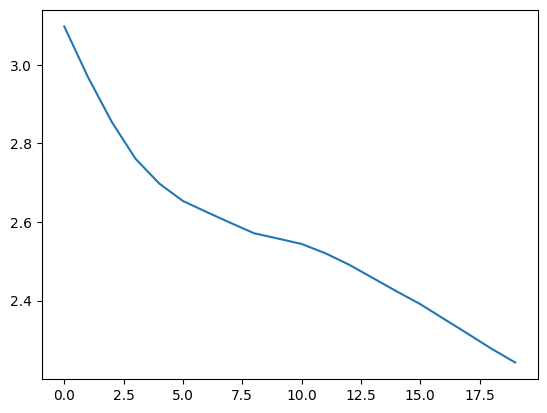

In [75]:
import numpy as np
import pandas as pd
from lib.data_loader import get_monks_dataset

# ============================
# Funzioni di attivazione e derivate
# ============================

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(z, a):
    # z non viene usato, ma lo manteniamo per avere la stessa firma
    return a * (1 - a)

def relu(x):
    return np.maximum(0, x)

def relu_derivative(z, a):
    return (z > 0).astype(float)

activation_functions = {
    "sigmoid": sigmoid,
    "relu": relu
}

activation_derivatives = {
    "sigmoid": lambda z, a: sigmoid_derivative(z, a),
    "relu": lambda z, a: relu_derivative(z, a)
}

# ============================
# Funzioni di loss e derivate
# ============================

def binary_crossentropy_loss(y_true, y_pred):
    epsilon = 1e-8
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

def binary_crossentropy_derivative(y_true, y_pred):
    epsilon = 1e-8
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    # Derivata elementwise: dL/dy_pred = - y_true/y_pred + (1-y_true)/(1-y_pred)
    return - (y_true / y_pred) + ((1 - y_true) / (1 - y_pred))

def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def mse_derivative(y_true, y_pred):
    return 2 * (y_pred - y_true)

loss_functions = {
    "binary_crossentropy": binary_crossentropy_loss,
    "mse": mse_loss
}

loss_derivatives = {
    "binary_crossentropy": binary_crossentropy_derivative,
    "mse": mse_derivative
}

# ============================
# Funzioni per la regolarizzazione (modulari)
# ============================

def compute_reg_gradient(W, lambda_reg, reg_type, m):
    """
    Calcola il termine di regolarizzazione da aggiungere al gradiente dei pesi.
    
    :param W: matrice dei pesi
    :param lambda_reg: coefficiente di regolarizzazione
    :param reg_type: tipo di regolarizzazione ("l2" o "l1")
    :param m: numero di esempi del batch
    :return: termine di regolarizzazione per il gradiente
    """
    if reg_type == "l2":
        return lambda_reg * W / m
    elif reg_type == "l1":
        return lambda_reg * np.sign(W) / m
    else:
        return 0

def compute_reg_loss(W_list, lambda_reg, reg_type):
    """
    Calcola il termine di loss della regolarizzazione per un elenco di pesi.
    
    :param W_list: lista delle matrici dei pesi
    :param lambda_reg: coefficiente di regolarizzazione
    :param reg_type: tipo di regolarizzazione ("l2" o "l1")
    :return: valore della regolarizzazione da sommare alla loss
    """
    if reg_type == "l2":
        return (lambda_reg / 2) * sum(np.sum(W ** 2) for W in W_list)
    elif reg_type == "l1":
        return lambda_reg * sum(np.sum(np.abs(W)) for W in W_list)
    else:
        return 0

# ============================
# Classe della Rete Neurale
# ============================

class NeuralNetwork:
    def __init__(self, layers, learning_rate=0.9, lambda_reg=0.01, reg_type="l2",
                 loss_function_name="binary_crossentropy",
                 activation_function_name="relu",
                 output_activation_function_name="sigmoid"):
        """
        :param layers: lista con la dimensione di ogni layer (input, hidden, output)
        :param learning_rate: tasso di apprendimento
        :param lambda_reg: coefficiente di regolarizzazione
        :param reg_type: tipo di regolarizzazione ("l2" o "l1")
        :param loss_function_name: nome della funzione di loss (deve essere presente in loss_functions e loss_derivatives)
        :param activation_function_name: nome della funzione di attivazione per i layer nascosti
        :param output_activation_function_name: nome della funzione di attivazione per il layer di output
        """
        self.layers = layers
        self.learning_rate = learning_rate
        self.lambda_reg = lambda_reg
        self.reg_type = reg_type
        self.loss_function_name = loss_function_name
        self.activation_function_name = activation_function_name
        self.output_activation_function_name = output_activation_function_name
        self._initialize_parameters()
        
    def _initialize_parameters(self):
        """Inizializza i pesi e bias utilizzando un metodo di inizializzazione (He in questo esempio)."""
        self.W = []
        self.b = []
        np.random.seed(42)
        for i in range(len(self.layers) - 1):
            weight = np.random.randn(self.layers[i], self.layers[i + 1]) * np.sqrt(2 / self.layers[i])
            self.W.append(weight)
            self.b.append(np.zeros((1, self.layers[i + 1])))
    
    def _apply_activation(self, x, func_name):
        if func_name not in activation_functions:
            raise ValueError(f"Attivazione non supportata: {func_name}")
        return activation_functions[func_name](x)
    
    def _apply_activation_derivative(self, z, a, func_name):
        if func_name not in activation_derivatives:
            raise ValueError(f"Derivata dell'attivazione non supportata: {func_name}")
        return activation_derivatives[func_name](z, a)
    
    def _forward(self, X):
        """
        Esegue la forward propagation e ritorna le liste:
        - Z: valori pre-attivazione per ogni layer
        - A: output attivati per ogni layer (incluso l'input come A[0])
        """
        A = [X]
        Z = []
        # Propagazione attraverso i layer nascosti
        for i in range(len(self.W) - 1):
            z_curr = np.dot(A[-1], self.W[i]) + self.b[i]
            Z.append(z_curr)
            a_curr = self._apply_activation(z_curr, self.activation_function_name)
            A.append(a_curr)
        # Propagazione nel layer di output
        z_out = np.dot(A[-1], self.W[-1]) + self.b[-1]
        Z.append(z_out)
        a_out = self._apply_activation(z_out, self.output_activation_function_name)
        A.append(a_out)
        return Z, A
    
    def _backward(self, X, y, Z, A):
        """
        Esegue la backward propagation calcolando i gradienti e aggiornando i parametri.
        La catena del gradiente viene calcolata in maniera modulare.
        """
        m = X.shape[0]
        if self.loss_function_name not in loss_derivatives:
            raise ValueError(f"Derivata della loss non supportata: {self.loss_function_name}")
        # Calcola dL/dy_pred per l'output
        dA = loss_derivatives[self.loss_function_name](y, A[-1])
        # Calcola dL/dz nel layer di output
        dZ = dA * self._apply_activation_derivative(Z[-1], A[-1], self.output_activation_function_name)
        # Calcolo del gradiente con regolarizzazione per l'ultimo layer
        reg_term = compute_reg_gradient(self.W[-1], self.lambda_reg, self.reg_type, m)
        dW = [np.dot(A[-2].T, dZ) / m + reg_term]
        db = [np.sum(dZ, axis=0, keepdims=True) / m]
        
        # Backpropagation nei layer nascosti
        for i in range(len(self.W) - 2, -1, -1):
            dA = np.dot(dZ, self.W[i + 1].T)
            dZ = dA * self._apply_activation_derivative(Z[i], A[i + 1], self.activation_function_name)
            reg_term = compute_reg_gradient(self.W[i], self.lambda_reg, self.reg_type, m)
            dW.insert(0, np.dot(A[i].T, dZ) / m + reg_term)
            db.insert(0, np.sum(dZ, axis=0, keepdims=True) / m)
        
        # Aggiorna i parametri
        for i in range(len(self.W)):
            self.W[i] -= self.learning_rate * dW[i]
            self.b[i] -= self.learning_rate * db[i]
    
    def train(self, X, y, epochs=1000, batch_size=32, verbose=True):
        """
        Esegue il training della rete mediante mini-batch gradient descent.
        Ritorna la lista degli errori per ogni epoca (ogni 10 epoche).
        """
        loss_history = []
        for epoch in range(epochs):
            permutation = np.random.permutation(X.shape[0])
            X_shuffled = X[permutation]
            y_shuffled = y[permutation]
            for i in range(0, X.shape[0], batch_size):
                X_batch = X_shuffled[i:i + batch_size]
                y_batch = y_shuffled[i:i + batch_size]
                Z, A = self._forward(X_batch)
                self._backward(X_batch, y_batch, Z, A)
            if epoch % int(epochs / 20) == 0:
                _, A_full = self._forward(X)
                loss = loss_functions[self.loss_function_name](y, A_full[-1])
                reg_loss = compute_reg_loss(self.W, self.lambda_reg, self.reg_type)
                total_loss = loss + reg_loss
                loss_history.append(total_loss)
                if verbose:
                    print(f"Epoch {epoch}, Loss: {total_loss:.4f}")
        return loss_history
    
    def predict(self, X):
        """
        Restituisce le predizioni:
          - Se l'output ha un solo neurone, viene usata una soglia a 0.5.
          - Se l'output è one-hot encoded, viene usato argmax.
        """
        _, A = self._forward(X)
        output = A[-1]
        if output.shape[1] == 1:
            return (output > 0.5).astype(int)
        else:
            return np.argmax(output, axis=1)
    
    def evaluate(self, X, y):
        """
        Calcola l'accuratezza.
        Se y è one-hot encoded, converte le etichette in formato indice.
        """
        predictions = self.predict(X)
        if y.ndim > 1 and y.shape[1] > 1:
            y_true = np.argmax(y, axis=1)
        else:
            y_true = y
        return np.mean(predictions == y_true)

# ============================
# Esecuzione: Caricamento dataset, training e valutazione
# ============================

X_train, y_train, X_test, y_test = get_monks_dataset(3, one_hot_encode=True)
input_size = X_train.shape[1]
output_size = y_train.shape[1]
layers = [input_size, 4, 4, output_size]

# Istanziamo la rete con i parametri desiderati
nn = NeuralNetwork(
    layers,
    learning_rate=0.05,
    lambda_reg=0.1,
    reg_type="l1",  # Cambia in "l2" per usare la regolarizzazione L2
    loss_function_name="mse",
    activation_function_name="relu",
    output_activation_function_name="sigmoid"
)

loss_history = nn.train(X_train, y_train, epochs=300, batch_size=32, verbose=True)
accuracy = nn.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

pd.Series(loss_history).plot()

Training della rete neurale per regressione...
Epoch 0, Loss: 2.0243
Epoch 15, Loss: 0.8982
Epoch 30, Loss: 0.7697
Epoch 45, Loss: 0.7187
Epoch 60, Loss: 0.6852
Epoch 75, Loss: 0.6588
Epoch 90, Loss: 0.6437
Epoch 105, Loss: 0.6298
Epoch 120, Loss: 0.6185
Epoch 135, Loss: 0.6087
Epoch 150, Loss: 0.5996
Epoch 165, Loss: 0.5909
Epoch 180, Loss: 0.5824
Epoch 195, Loss: 0.5745
Epoch 210, Loss: 0.5656
Epoch 225, Loss: 0.5596
Epoch 240, Loss: 0.5519
Epoch 255, Loss: 0.5461
Epoch 270, Loss: 0.5395
Epoch 285, Loss: 0.5326

Neural Network Test MSE (sul target scalato): 0.5626
Baseline Linear Regression Test MSE (sul target scalato): 0.4891


<Axes: >

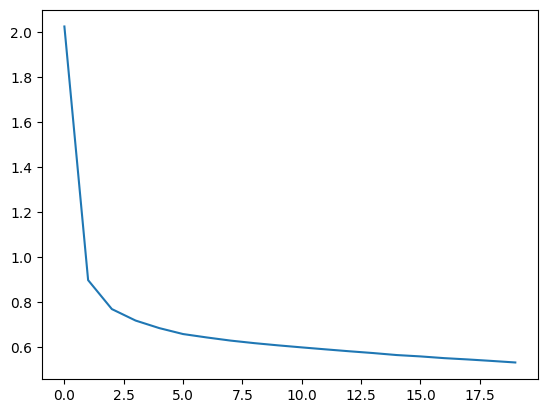

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import per il dataset e la baseline lineare
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# ============================
# Funzioni di attivazione e derivate
# ============================

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(z, a):
    # z non viene usato, ma lo manteniamo per avere la stessa firma
    return a * (1 - a)

def relu(x):
    return np.maximum(0, x)

def relu_derivative(z, a):
    return (z > 0).astype(float)

def linear(x):
    return x

def linear_derivative(z, a):
    return np.ones_like(a)

activation_functions = {
    "sigmoid": sigmoid,
    "relu": relu,
    "linear": linear
}

activation_derivatives = {
    "sigmoid": lambda z, a: sigmoid_derivative(z, a),
    "relu": lambda z, a: relu_derivative(z, a),
    "linear": lambda z, a: linear_derivative(z, a)
}

# ============================
# Funzioni di loss e derivate
# ============================

def binary_crossentropy_loss(y_true, y_pred):
    epsilon = 1e-8
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

def binary_crossentropy_derivative(y_true, y_pred):
    epsilon = 1e-8
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return - (y_true / y_pred) + ((1 - y_true) / (1 - y_pred))

def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def mse_derivative(y_true, y_pred):
    return 2 * (y_pred - y_true)

loss_functions = {
    "binary_crossentropy": binary_crossentropy_loss,
    "mse": mse_loss
}

loss_derivatives = {
    "binary_crossentropy": binary_crossentropy_derivative,
    "mse": mse_derivative
}

# ============================
# Funzioni per la regolarizzazione (modulari)
# ============================

def compute_reg_gradient(W, lambda_reg, reg_type, m):
    if reg_type == "l2":
        return lambda_reg * W / m
    elif reg_type == "l1":
        return lambda_reg * np.sign(W) / m
    else:
        return 0

def compute_reg_loss(W_list, lambda_reg, reg_type):
    if reg_type == "l2":
        return (lambda_reg / 2) * sum(np.sum(W ** 2) for W in W_list)
    elif reg_type == "l1":
        return lambda_reg * sum(np.sum(np.abs(W)) for W in W_list)
    else:
        return 0

# ============================
# Classe della Rete Neurale
# ============================

class NeuralNetwork:
    def __init__(self, layers, learning_rate=0.01, lambda_reg=0.001, reg_type="l2",
                 loss_function_name=None,
                 activation_function_name="relu",
                 output_activation_function_name=None,
                 task="classification"):
        """
        :param layers: lista con la dimensione di ogni layer (input, hidden, output)
        :param learning_rate: tasso di apprendimento
        :param lambda_reg: coefficiente di regolarizzazione
        :param reg_type: tipo di regolarizzazione ("l2" o "l1")
        :param loss_function_name: nome della funzione di loss (se None, viene settata in base al task)
        :param activation_function_name: attivazione per i layer nascosti
        :param output_activation_function_name: attivazione per il layer di output (se None, viene settata in base al task)
        :param task: "classification" o "regression"
        """
        self.layers = layers
        self.learning_rate = learning_rate
        self.lambda_reg = lambda_reg
        self.reg_type = reg_type
        self.task = task
        
        # Impostiamo default diversi in base al task
        if self.task == "regression":
            self.loss_function_name = loss_function_name or "mse"
            self.output_activation_function_name = output_activation_function_name or "linear"
        else:
            self.loss_function_name = loss_function_name or "binary_crossentropy"
            self.output_activation_function_name = output_activation_function_name or "sigmoid"
            
        self.activation_function_name = activation_function_name
        self._initialize_parameters()
        
    def _initialize_parameters(self):
        self.W = []
        self.b = []
        np.random.seed(42)
        for i in range(len(self.layers) - 1):
            # Utilizziamo l'inizializzazione di He (ottimale per ReLU)
            weight = np.random.randn(self.layers[i], self.layers[i + 1]) * np.sqrt(2 / self.layers[i])
            self.W.append(weight)
            self.b.append(np.zeros((1, self.layers[i + 1])))
    
    def _apply_activation(self, x, func_name):
        if func_name not in activation_functions:
            raise ValueError(f"Attivazione non supportata: {func_name}")
        return activation_functions[func_name](x)
    
    def _apply_activation_derivative(self, z, a, func_name):
        if func_name not in activation_derivatives:
            raise ValueError(f"Derivata dell'attivazione non supportata: {func_name}")
        return activation_derivatives[func_name](z, a)
    
    def _forward(self, X):
        A = [X]
        Z = []
        # Propagazione attraverso i layer nascosti
        for i in range(len(self.W) - 1):
            z_curr = np.dot(A[-1], self.W[i]) + self.b[i]
            Z.append(z_curr)
            a_curr = self._apply_activation(z_curr, self.activation_function_name)
            A.append(a_curr)
        # Propagazione nel layer di output
        z_out = np.dot(A[-1], self.W[-1]) + self.b[-1]
        Z.append(z_out)
        a_out = self._apply_activation(z_out, self.output_activation_function_name)
        A.append(a_out)
        return Z, A
    
    def _backward(self, X, y, Z, A):
        m = X.shape[0]
        if self.loss_function_name not in loss_derivatives:
            raise ValueError(f"Derivata della loss non supportata: {self.loss_function_name}")
        # Calcola dL/dy_pred per l'output
        dA = loss_derivatives[self.loss_function_name](y, A[-1])
        # Calcola dL/dz nel layer di output
        dZ = dA * self._apply_activation_derivative(Z[-1], A[-1], self.output_activation_function_name)
        reg_term = compute_reg_gradient(self.W[-1], self.lambda_reg, self.reg_type, m)
        dW = [np.dot(A[-2].T, dZ) / m + reg_term]
        db = [np.sum(dZ, axis=0, keepdims=True) / m]
        
        # Backpropagation nei layer nascosti
        for i in range(len(self.W) - 2, -1, -1):
            dA = np.dot(dZ, self.W[i + 1].T)
            dZ = dA * self._apply_activation_derivative(Z[i], A[i + 1], self.activation_function_name)
            reg_term = compute_reg_gradient(self.W[i], self.lambda_reg, self.reg_type, m)
            dW.insert(0, np.dot(A[i].T, dZ) / m + reg_term)
            db.insert(0, np.sum(dZ, axis=0, keepdims=True) / m)
        
        # Aggiorna i parametri
        for i in range(len(self.W)):
            self.W[i] -= self.learning_rate * dW[i]
            self.b[i] -= self.learning_rate * db[i]
    
    def train(self, X, y, epochs=300, batch_size=32, verbose=True):
        loss_history = []
        for epoch in range(epochs):
            permutation = np.random.permutation(X.shape[0])
            X_shuffled = X[permutation]
            y_shuffled = y[permutation]
            for i in range(0, X.shape[0], batch_size):
                X_batch = X_shuffled[i:i + batch_size]
                y_batch = y_shuffled[i:i + batch_size]
                Z, A = self._forward(X_batch)
                self._backward(X_batch, y_batch, Z, A)
            if epoch % max(1, int(epochs / 20)) == 0:
                _, A_full = self._forward(X)
                loss = loss_functions[self.loss_function_name](y, A_full[-1])
                reg_loss = compute_reg_loss(self.W, self.lambda_reg, self.reg_type)
                total_loss = loss + reg_loss
                loss_history.append(total_loss)
                if verbose:
                    print(f"Epoch {epoch}, Loss: {total_loss:.4f}")
        return loss_history
    
    def predict(self, X):
        _, A = self._forward(X)
        output = A[-1]
        if self.task == "classification":
            if output.shape[1] == 1:
                return (output > 0.5).astype(int)
            else:
                return np.argmax(output, axis=1)
        else:  # regressione
            return output
    
    def evaluate(self, X, y):
        predictions = self.predict(X)
        if self.task == "regression":
            return mse_loss(y, predictions)
        else:
            if y.ndim > 1 and y.shape[1] > 1:
                y_true = np.argmax(y, axis=1)
            else:
                y_true = y
            return np.mean(predictions == y_true)

# ============================
# Esperimento di regressione con il dataset Diabetes
# ============================

# Caricamento e scaling del dataset
data = load_diabetes()
X = data.data
y = data.target.reshape(-1, 1)  # rendiamo y bidimensionale

scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# Suddividiamo in train e test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_scaled, test_size=0.2, random_state=42
)

# Definiamo l'architettura della rete per regressione
input_size = X_train.shape[1]    # 10 feature
layers = [input_size, 10, 10, 1]   # 2 hidden layer con 10 neuroni ciascuno, 1 output

# Istanziamo la rete neurale per regressione
nn_reg = NeuralNetwork(
    layers=layers,
    learning_rate=0.001,
    lambda_reg=0.001,
    reg_type="l2",
    loss_function_name="mse",               # per regressione usiamo MSE
    activation_function_name="relu",
    output_activation_function_name="linear",  # output lineare per regressione
    task="regression"
)

print("Training della rete neurale per regressione...")
loss_history = nn_reg.train(X_train, y_train, epochs=300, batch_size=32, verbose=True)
nn_mse = nn_reg.evaluate(X_test, y_test)
print(f"\nNeural Network Test MSE (sul target scalato): {nn_mse:.4f}")

# Baseline: regressione lineare di sklearn
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
lr_mse = np.mean((y_test - y_pred_lr) ** 2)
print(f"Baseline Linear Regression Test MSE (sul target scalato): {lr_mse:.4f}")

pd.Series(loss_history).plot()

Training della rete neurale per regressione...
Epoch 0, Loss: 2.0243
Epoch 15, Loss: 0.8982
Epoch 30, Loss: 0.7697
Epoch 45, Loss: 0.7187
Epoch 60, Loss: 0.6852
Epoch 75, Loss: 0.6588
Epoch 90, Loss: 0.6437
Epoch 105, Loss: 0.6298
Epoch 120, Loss: 0.6185
Epoch 135, Loss: 0.6087
Epoch 150, Loss: 0.5996
Epoch 165, Loss: 0.5909
Epoch 180, Loss: 0.5824
Epoch 195, Loss: 0.5745
Epoch 210, Loss: 0.5656
Epoch 225, Loss: 0.5596
Epoch 240, Loss: 0.5519
Epoch 255, Loss: 0.5461
Epoch 270, Loss: 0.5395
Epoch 285, Loss: 0.5326

Neural Network Test MSE (sul target scalato): 0.5626
Baseline Linear Regression Test MSE (sul target scalato): 0.4891


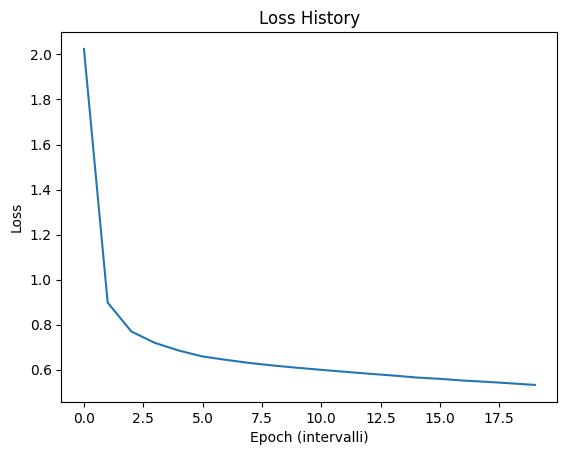

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import per il dataset e la baseline lineare
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# ============================
# Funzioni di attivazione e derivate
# ============================

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(z, a):
    # z non viene usato, ma lo manteniamo per avere la stessa firma
    return a * (1 - a)

def relu(x):
    return np.maximum(0, x)

def relu_derivative(z, a):
    return (z > 0).astype(float)

def linear(x):
    return x

def linear_derivative(z, a):
    return np.ones_like(a)

activation_functions = {
    "sigmoid": sigmoid,
    "relu": relu,
    "linear": linear
}

activation_derivatives = {
    "sigmoid": lambda z, a: sigmoid_derivative(z, a),
    "relu": lambda z, a: relu_derivative(z, a),
    "linear": lambda z, a: linear_derivative(z, a)
}

# ============================
# Funzioni di loss e derivate
# ============================

def binary_crossentropy_loss(y_true, y_pred):
    epsilon = 1e-8
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

def binary_crossentropy_derivative(y_true, y_pred):
    epsilon = 1e-8
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return - (y_true / y_pred) + ((1 - y_true) / (1 - y_pred))

def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def mse_derivative(y_true, y_pred):
    return 2 * (y_pred - y_true)

loss_functions = {
    "binary_crossentropy": binary_crossentropy_loss,
    "mse": mse_loss
}

loss_derivatives = {
    "binary_crossentropy": binary_crossentropy_derivative,
    "mse": mse_derivative
}

# ============================
# Funzioni per la regolarizzazione (modulari)
# ============================

def compute_reg_gradient(W, lambda_reg, reg_type, m):
    if reg_type == "l2":
        return lambda_reg * W / m
    elif reg_type == "l1":
        return lambda_reg * np.sign(W) / m
    else:
        return 0

def compute_reg_loss(W_list, lambda_reg, reg_type):
    if reg_type == "l2":
        return (lambda_reg / 2) * sum(np.sum(W ** 2) for W in W_list)
    elif reg_type == "l1":
        return lambda_reg * sum(np.sum(np.abs(W)) for W in W_list)
    else:
        return 0

# ============================
# Classe della Rete Neurale
# ============================

class NeuralNetwork:
    def __init__(self, layers, learning_rate=0.01, lambda_reg=0.001, reg_type="l2",
                 loss_function_name=None,
                 activation_function_name="relu",
                 output_activation_function_name=None,
                 activation_function_names=None,
                 task="classification"):
        """
        :param layers: lista con la dimensione di ogni layer (input, hidden, output)
        :param learning_rate: tasso di apprendimento
        :param lambda_reg: coefficiente di regolarizzazione
        :param reg_type: tipo di regolarizzazione ("l2" o "l1")
        :param loss_function_name: nome della funzione di loss (se None, viene settata in base al task)
        :param activation_function_name: attivazione da usare per i layer nascosti (se non viene specificato activation_function_names)
        :param output_activation_function_name: attivazione per il layer di output (se None, viene settata in base al task)
        :param activation_function_names: lista di nomi di funzioni di attivazione per ogni layer (lunghezza = len(layers)-1)
        :param task: "classification" o "regression"
        """
        self.layers = layers
        self.learning_rate = learning_rate
        self.lambda_reg = lambda_reg
        self.reg_type = reg_type
        self.task = task
        
        # Impostiamo i default in base al task
        if self.task == "regression":
            self.loss_function_name = loss_function_name or "mse"
            output_activation_function_name = output_activation_function_name or "linear"
        else:
            self.loss_function_name = loss_function_name or "binary_crossentropy"
            output_activation_function_name = output_activation_function_name or "sigmoid"
        
        # Se non è specificata una lista di attivazioni per ogni layer, usiamo la stessa per tutti i layer nascosti
        # e quella di output per l'ultimo layer
        if activation_function_names is None:
            # Creo una lista di lunghezza len(layers)-1
            self.activation_function_names = [activation_function_name] * (len(layers) - 1)
            self.activation_function_names[-1] = output_activation_function_name
        else:
            if len(activation_function_names) != len(layers) - 1:
                raise ValueError("La lista activation_function_names deve avere una lunghezza pari a len(layers)-1.")
            self.activation_function_names = activation_function_names
        
        self._initialize_parameters()
        
    def _initialize_parameters(self):
        self.W = []
        self.b = []
        np.random.seed(42)
        for i in range(len(self.layers) - 1):
            # Inizializzazione di He (ottimale per ReLU)
            weight = np.random.randn(self.layers[i], self.layers[i + 1]) * np.sqrt(2 / self.layers[i])
            self.W.append(weight)
            self.b.append(np.zeros((1, self.layers[i + 1])))
    
    def _apply_activation(self, x, func_name):
        if func_name not in activation_functions:
            raise ValueError(f"Attivazione non supportata: {func_name}")
        return activation_functions[func_name](x)
    
    def _apply_activation_derivative(self, z, a, func_name):
        if func_name not in activation_derivatives:
            raise ValueError(f"Derivata dell'attivazione non supportata: {func_name}")
        return activation_derivatives[func_name](z, a)
    
    def _forward(self, X):
        A = [X]
        Z = []
        # Propagazione attraverso i layer nascosti (tutti tranne l'output)
        for i in range(len(self.W) - 1):
            z_curr = np.dot(A[-1], self.W[i]) + self.b[i]
            Z.append(z_curr)
            a_curr = self._apply_activation(z_curr, self.activation_function_names[i])
            A.append(a_curr)
        # Propagazione nel layer di output
        z_out = np.dot(A[-1], self.W[-1]) + self.b[-1]
        Z.append(z_out)
        a_out = self._apply_activation(z_out, self.activation_function_names[-1])
        A.append(a_out)
        return Z, A
    
    def _backward(self, X, y, Z, A):
        m = X.shape[0]
        if self.loss_function_name not in loss_derivatives:
            raise ValueError(f"Derivata della loss non supportata: {self.loss_function_name}")
        # Calcola dL/dy_pred per l'output
        dA = loss_derivatives[self.loss_function_name](y, A[-1])
        # Calcola dL/dz per il layer di output
        dZ = dA * self._apply_activation_derivative(Z[-1], A[-1], self.activation_function_names[-1])
        reg_term = compute_reg_gradient(self.W[-1], self.lambda_reg, self.reg_type, m)
        dW = [np.dot(A[-2].T, dZ) / m + reg_term]
        db = [np.sum(dZ, axis=0, keepdims=True) / m]
        
        # Backpropagation nei layer nascosti
        for i in range(len(self.W) - 2, -1, -1):
            dA = np.dot(dZ, self.W[i + 1].T)
            dZ = dA * self._apply_activation_derivative(Z[i], A[i + 1], self.activation_function_names[i])
            reg_term = compute_reg_gradient(self.W[i], self.lambda_reg, self.reg_type, m)
            dW.insert(0, np.dot(A[i].T, dZ) / m + reg_term)
            db.insert(0, np.sum(dZ, axis=0, keepdims=True) / m)
        
        # Aggiorna i parametri
        for i in range(len(self.W)):
            self.W[i] -= self.learning_rate * dW[i]
            self.b[i] -= self.learning_rate * db[i]
    
    def train(self, X, y, epochs=300, batch_size=32, verbose=True):
        loss_history = []
        for epoch in range(epochs):
            permutation = np.random.permutation(X.shape[0])
            X_shuffled = X[permutation]
            y_shuffled = y[permutation]
            for i in range(0, X.shape[0], batch_size):
                X_batch = X_shuffled[i:i + batch_size]
                y_batch = y_shuffled[i:i + batch_size]
                Z, A = self._forward(X_batch)
                self._backward(X_batch, y_batch, Z, A)
            if epoch % max(1, int(epochs / 20)) == 0:
                _, A_full = self._forward(X)
                loss = loss_functions[self.loss_function_name](y, A_full[-1])
                reg_loss = compute_reg_loss(self.W, self.lambda_reg, self.reg_type)
                total_loss = loss + reg_loss
                loss_history.append(total_loss)
                if verbose:
                    print(f"Epoch {epoch}, Loss: {total_loss:.4f}")
        return loss_history
    
    def predict(self, X):
        _, A = self._forward(X)
        output = A[-1]
        if self.task == "classification":
            if output.shape[1] == 1:
                return (output > 0.5).astype(int)
            else:
                return np.argmax(output, axis=1)
        else:  # regressione
            return output
    
    def evaluate(self, X, y):
        predictions = self.predict(X)
        if self.task == "regression":
            return mse_loss(y, predictions)
        else:
            if y.ndim > 1 and y.shape[1] > 1:
                y_true = np.argmax(y, axis=1)
            else:
                y_true = y
            return np.mean(predictions == y_true)

# ============================
# Esperimento di regressione con il dataset Diabetes
# ============================

# Caricamento e scaling del dataset
data = load_diabetes()
X = data.data
y = data.target.reshape(-1, 1)  # rendiamo y bidimensionale

scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# Suddividiamo in train e test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_scaled, test_size=0.2, random_state=42
)

# Definiamo l'architettura della rete per regressione
input_size = X_train.shape[1]    # 10 feature
layers = [input_size, 10, 10, 1]   # 2 hidden layer con 10 neuroni ciascuno, 1 output

# Esempio: specifica di funzioni di attivazione diverse per ogni layer
# In questo caso, per i due layer nascosti usiamo "relu" e per l'output "linear"
activation_funcs = ["relu", "relu", "linear"]

# Istanziamo la rete neurale per regressione
nn_reg = NeuralNetwork(
    layers=layers,
    learning_rate=0.001,
    lambda_reg=0.001,
    reg_type="l2",
    loss_function_name="mse",  # per regressione usiamo MSE
    activation_function_names=activation_funcs,
    task="regression"
)

print("Training della rete neurale per regressione...")
loss_history = nn_reg.train(X_train, y_train, epochs=300, batch_size=32, verbose=True)
nn_mse = nn_reg.evaluate(X_test, y_test)
print(f"\nNeural Network Test MSE (sul target scalato): {nn_mse:.4f}")

# Baseline: regressione lineare di sklearn
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
lr_mse = np.mean((y_test - y_pred_lr) ** 2)
print(f"Baseline Linear Regression Test MSE (sul target scalato): {lr_mse:.4f}")

pd.Series(loss_history).plot()
plt.xlabel("Epoch (intervalli)")
plt.ylabel("Loss")
plt.title("Loss History")
plt.show()


Training della rete neurale per classificazione...
Epoch 0, Loss: 0.6555
Epoch 15, Loss: 0.2408
Epoch 30, Loss: 0.1524
Epoch 45, Loss: 0.1215
Epoch 60, Loss: 0.1066
Epoch 75, Loss: 0.0972
Epoch 90, Loss: 0.0905
Epoch 105, Loss: 0.0856
Epoch 120, Loss: 0.0816
Epoch 135, Loss: 0.0776
Epoch 150, Loss: 0.0743
Epoch 165, Loss: 0.0715
Epoch 180, Loss: 0.0689
Epoch 195, Loss: 0.0665
Epoch 210, Loss: 0.0644
Epoch 225, Loss: 0.0624
Epoch 240, Loss: 0.0604
Epoch 255, Loss: 0.0588
Epoch 270, Loss: 0.0574
Epoch 285, Loss: 0.0561

Neural Network Classification Accuracy: 0.9825


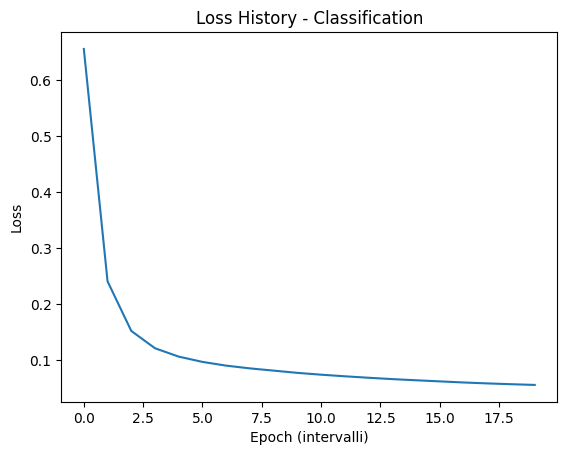

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming the NeuralNetwork class and related functions have been defined as in the previous code snippet.

# ============================
# Example for Binary Classification using the Breast Cancer Dataset
# ============================

# Caricamento del dataset
data = load_breast_cancer()
X = data.data
y = data.target.reshape(-1, 1)  # rendiamo y bidimensionale

# Scaling delle features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Suddivisione in train e test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Definizione dell'architettura della rete:
# - Input: numero di features (30)
# - Due hidden layer con 16 e 8 neuroni rispettivamente
# - Output: 1 neurone per la classificazione binaria
layers = [X_train.shape[1], 16, 8, 1]

# Specifica delle funzioni di attivazione per ogni layer:
# - Hidden layers: "relu"
# - Output layer: "sigmoid" (per ottenere una probabilità)
activation_funcs = ["relu", "relu", "sigmoid"]

# Istanziamo la rete neurale per classificazione
nn_clf = NeuralNetwork(
    layers=layers,
    learning_rate=0.01,
    lambda_reg=0.001,
    reg_type="l2",
    activation_function_names=activation_funcs,
    task="classification"  # Importante: specifica che si tratta di un task di classificazione
)

print("Training della rete neurale per classificazione...")
loss_history = nn_clf.train(X_train, y_train, epochs=300, batch_size=32, verbose=True)

# Valutazione: la funzione evaluate restituisce l'accuratezza per il task di classificazione
accuracy = nn_clf.evaluate(X_test, y_test)
print(f"\nNeural Network Classification Accuracy: {accuracy:.4f}")

# Plot della storia del loss
pd.Series(loss_history).plot()
plt.xlabel("Epoch (intervalli)")
plt.ylabel("Loss")
plt.title("Loss History - Classification")
plt.show()


Using cached ../datasets/monks/monk-1-train.csv
Using cached ../datasets/monks/monk-1-test.csv
One-hot encoding MONK-1 dataset...
Training della rete neurale per classificazione...
Epoch 0, Loss: 0.2689
Epoch 50, Loss: 0.1071
Epoch 100, Loss: 0.0679
Epoch 150, Loss: 0.0309
Epoch 200, Loss: 0.0097
Epoch 250, Loss: 0.0052
Epoch 300, Loss: 0.0034
Epoch 350, Loss: 0.0025
Epoch 400, Loss: 0.0019
Epoch 450, Loss: 0.0016
Epoch 500, Loss: 0.0013
Epoch 550, Loss: 0.0011
Epoch 600, Loss: 0.0010
Epoch 650, Loss: 0.0009
Epoch 700, Loss: 0.0008
Epoch 750, Loss: 0.0007
Epoch 800, Loss: 0.0007
Epoch 850, Loss: 0.0006
Epoch 900, Loss: 0.0006
Epoch 950, Loss: 0.0005

Neural Network Classification Accuracy: 1.0000


<Axes: >

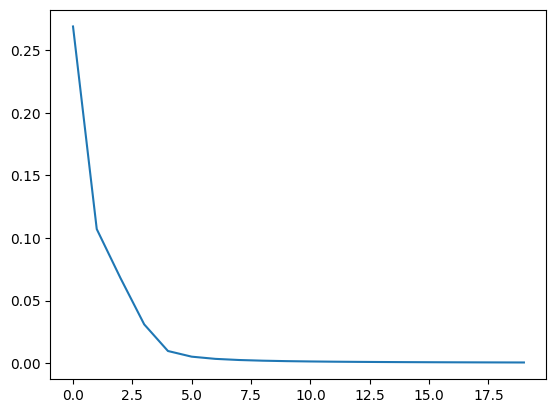

In [79]:
from lib.data_loader import get_monks_dataset

X_train, y_train, X_test, y_test = get_monks_dataset(1, one_hot_encode=True)
input_size = X_train.shape[1]
output_size = y_train.shape[1]
layers = [input_size, 4, output_size]

activation_funcs = ["relu",  "sigmoid"]

nn_clf = NeuralNetwork(
    layers=layers,
    learning_rate=0.5,
    lambda_reg=0,
    reg_type="l2",
    loss_function_name="mse",
    activation_function_names=activation_funcs,
    task="classification"  # Importante: specifica che si tratta di un task di classificazione
)

print("Training della rete neurale per classificazione...")
loss_history = nn_clf.train(X_train, y_train, epochs=1000, batch_size=32, verbose=True)

accuracy = nn_clf.evaluate(X_test, y_test)
print(f"\nNeural Network Classification Accuracy: {accuracy:.4f}")

pd.Series(loss_history).plot()

Using cached ../datasets/monks/monk-1-train.csv
Using cached ../datasets/monks/monk-1-test.csv
One-hot encoding MONK-1 dataset...
Training della rete neurale per classificazione...
Epoch 0, Loss: 0.2707
Epoch 50, Loss: 0.1064
Epoch 100, Loss: 0.0704
Epoch 150, Loss: 0.0485
Epoch 200, Loss: 0.0123
Epoch 250, Loss: 0.0060
Epoch 300, Loss: 0.0037
Epoch 350, Loss: 0.0027
Epoch 400, Loss: 0.0020
Epoch 450, Loss: 0.0016
Epoch 500, Loss: 0.0014
Epoch 550, Loss: 0.0012
Epoch 600, Loss: 0.0010
Epoch 650, Loss: 0.0009
Epoch 700, Loss: 0.0008
Epoch 750, Loss: 0.0007
Epoch 800, Loss: 0.0007
Epoch 850, Loss: 0.0006
Epoch 900, Loss: 0.0006
Epoch 950, Loss: 0.0005

Neural Network Classification Accuracy: 1.0000


<Axes: >

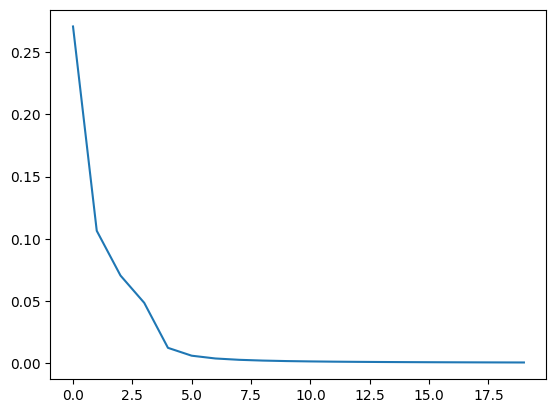

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import per il dataset e la baseline lineare
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# ============================
# Funzioni di attivazione e derivate
# ============================

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(z, a):
    # z non viene usato, ma lo manteniamo per avere la stessa firma
    return a * (1 - a)

def relu(x):
    return np.maximum(0, x)

def relu_derivative(z, a):
    return (z > 0).astype(float)

def linear(x):
    return x

def linear_derivative(z, a):
    return np.ones_like(a)

activation_functions = {
    "sigmoid": sigmoid,
    "relu": relu,
    "linear": linear
}

activation_derivatives = {
    "sigmoid": lambda z, a: sigmoid_derivative(z, a),
    "relu": lambda z, a: relu_derivative(z, a),
    "linear": lambda z, a: linear_derivative(z, a)
}

# ============================
# Funzioni di loss e derivate
# ============================

def binary_crossentropy_loss(y_true, y_pred):
    epsilon = 1e-8
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

def binary_crossentropy_derivative(y_true, y_pred):
    epsilon = 1e-8
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return - (y_true / y_pred) + ((1 - y_true) / (1 - y_pred))

def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def mse_derivative(y_true, y_pred):
    return 2 * (y_pred - y_true)

loss_functions = {
    "binary_crossentropy": binary_crossentropy_loss,
    "mse": mse_loss
}

loss_derivatives = {
    "binary_crossentropy": binary_crossentropy_derivative,
    "mse": mse_derivative
}

# ============================
# Funzioni per la regolarizzazione (modulari)
# ============================

def compute_reg_gradient(W, lambda_reg, reg_type, m):
    if reg_type == "l2":
        return lambda_reg * W / m
    elif reg_type == "l1":
        return lambda_reg * np.sign(W) / m
    else:
        return 0

def compute_reg_loss(W_list, lambda_reg, reg_type):
    if reg_type == "l2":
        return (lambda_reg / 2) * sum(np.sum(W ** 2) for W in W_list)
    elif reg_type == "l1":
        return lambda_reg * sum(np.sum(np.abs(W)) for W in W_list)
    else:
        return 0

# ============================
# Classe della Rete Neurale
# ============================

class NeuralNetwork:
    def __init__(self, layers, learning_rate=0.01, lambda_reg=0.001, reg_type="l2",
                 loss_function_name=None,
                 activation_function_name="relu",
                 output_activation_function_name=None,
                 activation_function_names=None,
                 task="classification"):
        """
        :param layers: lista con la dimensione di ogni layer (input, hidden, output)
        :param learning_rate: tasso di apprendimento
        :param lambda_reg: coefficiente di regolarizzazione
        :param reg_type: tipo di regolarizzazione ("l2" o "l1")
        :param loss_function_name: nome della funzione di loss (se None, viene settata in base al task)
        :param activation_function_name: attivazione da usare per i layer nascosti (se non viene specificato activation_function_names)
        :param output_activation_function_name: attivazione per il layer di output (se None, viene settata in base al task)
        :param activation_function_names: lista di nomi di funzioni di attivazione per ogni layer (lunghezza = len(layers)-1)
        :param task: "classification" o "regression"
        """
        self.layers = layers
        self.learning_rate = learning_rate
        self.lambda_reg = lambda_reg
        self.reg_type = reg_type
        self.task = task
        
        # Impostiamo i default in base al task
        if self.task == "regression":
            self.loss_function_name = loss_function_name or "mse"
            output_activation_function_name = output_activation_function_name or "linear"
        else:
            self.loss_function_name = loss_function_name or "binary_crossentropy"
            output_activation_function_name = output_activation_function_name or "sigmoid"
        
        # Se non è specificata una lista di attivazioni per ogni layer, usiamo la stessa per tutti i layer nascosti
        # e quella di output per l'ultimo layer
        if activation_function_names is None:
            # Creo una lista di lunghezza len(layers)-1
            self.activation_function_names = [activation_function_name] * (len(layers) - 1)
            self.activation_function_names[-1] = output_activation_function_name
        else:
            if len(activation_function_names) != len(layers) - 1:
                raise ValueError("La lista activation_function_names deve avere una lunghezza pari a len(layers)-1.")
            self.activation_function_names = activation_function_names
        
        self._initialize_parameters()
        
    def _initialize_parameters(self):
        self.W = []
        self.b = []
        np.random.seed(42)
        for i in range(len(self.layers) - 1):
            # Inizializzazione di He (ottimale per ReLU)
            weight = np.random.randn(self.layers[i], self.layers[i + 1]) * np.sqrt(2 / self.layers[i])
            self.W.append(weight)
            self.b.append(np.zeros((1, self.layers[i + 1])))
    
    def _apply_activation(self, x, func_name):
        if func_name not in activation_functions:
            raise ValueError(f"Attivazione non supportata: {func_name}")
        return activation_functions[func_name](x)
    
    def _apply_activation_derivative(self, z, a, func_name):
        if func_name not in activation_derivatives:
            raise ValueError(f"Derivata dell'attivazione non supportata: {func_name}")
        return activation_derivatives[func_name](z, a)
    
    def _forward(self, X):
        A = [X]
        Z = []
        # Propagazione attraverso i layer nascosti (tutti tranne l'output)
        for i in range(len(self.W) - 1):
            z_curr = np.dot(A[-1], self.W[i]) + self.b[i]
            Z.append(z_curr)
            a_curr = self._apply_activation(z_curr, self.activation_function_names[i])
            A.append(a_curr)
        # Propagazione nel layer di output
        z_out = np.dot(A[-1], self.W[-1]) + self.b[-1]
        Z.append(z_out)
        a_out = self._apply_activation(z_out, self.activation_function_names[-1])
        A.append(a_out)
        return Z, A
    
    def _backward(self, X, y, Z, A):
        m = X.shape[0]
        if self.loss_function_name not in loss_derivatives:
            raise ValueError(f"Derivata della loss non supportata: {self.loss_function_name}")
        # Calcola dL/dy_pred per l'output
        dA = loss_derivatives[self.loss_function_name](y, A[-1])
        # Calcola dL/dz per il layer di output
        dZ = dA * self._apply_activation_derivative(Z[-1], A[-1], self.activation_function_names[-1])
        reg_term = compute_reg_gradient(self.W[-1], self.lambda_reg, self.reg_type, m)
        dW = [np.dot(A[-2].T, dZ) / m + reg_term]
        db = [np.sum(dZ, axis=0, keepdims=True) / m]
        
        # Backpropagation nei layer nascosti
        for i in range(len(self.W) - 2, -1, -1):
            dA = np.dot(dZ, self.W[i + 1].T)
            dZ = dA * self._apply_activation_derivative(Z[i], A[i + 1], self.activation_function_names[i])
            reg_term = compute_reg_gradient(self.W[i], self.lambda_reg, self.reg_type, m)
            dW.insert(0, np.dot(A[i].T, dZ) / m + reg_term)
            db.insert(0, np.sum(dZ, axis=0, keepdims=True) / m)
        
        # Aggiorna i parametri
        for i in range(len(self.W)):
            self.W[i] -= self.learning_rate * dW[i]
            self.b[i] -= self.learning_rate * db[i]
    
    def train(self, X, y, epochs=300, batch_size=32, verbose=True):
        loss_history = []
        for epoch in range(epochs):
            permutation = np.random.permutation(X.shape[0])
            X_shuffled = X[permutation]
            y_shuffled = y[permutation]
            for i in range(0, X.shape[0], batch_size):
                X_batch = X_shuffled[i:i + batch_size]
                y_batch = y_shuffled[i:i + batch_size]
                Z, A = self._forward(X_batch)
                self._backward(X_batch, y_batch, Z, A)
            if epoch % max(1, int(epochs / 20)) == 0:
                _, A_full = self._forward(X)
                loss = loss_functions[self.loss_function_name](y, A_full[-1])
                reg_loss = compute_reg_loss(self.W, self.lambda_reg, self.reg_type)
                total_loss = loss + reg_loss
                loss_history.append(total_loss)
                if verbose:
                    print(f"Epoch {epoch}, Loss: {total_loss:.4f}")
        return loss_history
    
    def predict(self, X):
        _, A = self._forward(X)
        output = A[-1]
        if self.task == "classification":
            if output.shape[1] == 1:
                return (output > 0.5).astype(int)
            else:
                return np.argmax(output, axis=1)
        else:  # regressione
            return output
    
    def evaluate(self, X, y):
        predictions = self.predict(X)
        if self.task == "regression":
            return mse_loss(y, predictions)
        else:
            if y.ndim > 1 and y.shape[1] > 1:
                y_true = np.argmax(y, axis=1)
            else:
                y_true = y
            return np.mean(predictions == y_true)

from lib.data_loader import get_monks_dataset

X_train, y_train, X_test, y_test = get_monks_dataset(1, one_hot_encode=True)
input_size = X_train.shape[1]
output_size = y_train.shape[1]
layers = [input_size, 4, output_size]

activation_funcs = ["relu",  "sigmoid"]

nn_clf = NeuralNetwork(
    layers=layers,
    learning_rate=0.5,
    lambda_reg=0,
    reg_type="l2",
    loss_function_name="mse",
    activation_function_names=activation_funcs,
    task="classification"  # Importante: specifica che si tratta di un task di classificazione
)

print("Training della rete neurale per classificazione...")
loss_history = nn_clf.train(X_train, y_train, epochs=1000, batch_size=32, verbose=True)

accuracy = nn_clf.evaluate(X_test, y_test)
print(f"\nNeural Network Classification Accuracy: {accuracy:.4f}")

pd.Series(loss_history).plot()

Training the neural network on the breast cancer dataset...
Epoch    0, Loss: 0.1498, Learning Rate: 0.100000
Epoch   50, Loss: 0.0285, Learning Rate: 0.095123
Epoch  100, Loss: 0.0258, Learning Rate: 0.090484
Epoch  150, Loss: 0.0249, Learning Rate: 0.086071
Epoch  200, Loss: 0.0242, Learning Rate: 0.081873
Epoch  250, Loss: 0.0237, Learning Rate: 0.077880
Epoch  300, Loss: 0.0233, Learning Rate: 0.074082
Epoch  350, Loss: 0.0231, Learning Rate: 0.070469
Epoch  400, Loss: 0.0230, Learning Rate: 0.067032
Epoch  450, Loss: 0.0231, Learning Rate: 0.063763
Epoch  500, Loss: 0.0232, Learning Rate: 0.060653
Epoch  550, Loss: 0.0233, Learning Rate: 0.057695
Epoch  600, Loss: 0.0234, Learning Rate: 0.054881
Epoch  650, Loss: 0.0235, Learning Rate: 0.052205
Epoch  700, Loss: 0.0236, Learning Rate: 0.049659
Epoch  750, Loss: 0.0238, Learning Rate: 0.047237
Epoch  800, Loss: 0.0239, Learning Rate: 0.044933
Epoch  850, Loss: 0.0240, Learning Rate: 0.042741
Epoch  900, Loss: 0.0241, Learning Rate:

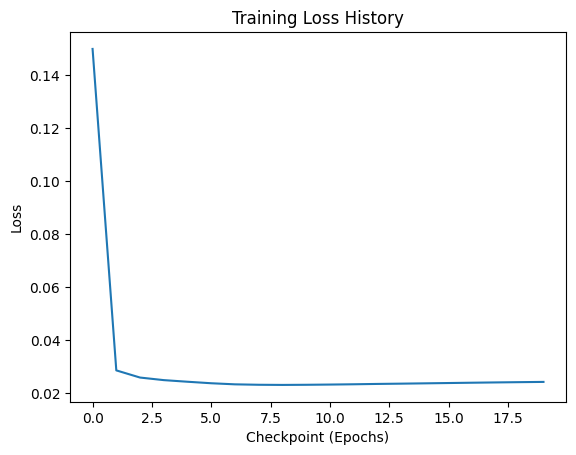

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import for sklearn dataset and preprocessing
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# ============================
# Activation functions and their derivatives
# ============================

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(z, a):
    # Note: z is not used here; kept for uniform signature.
    return a * (1 - a)

def relu(x):
    return np.maximum(0, x)

def relu_derivative(z, a):
    return (z > 0).astype(float)

def linear(x):
    return x

def linear_derivative(z, a):
    return np.ones_like(a)

activation_functions = {
    "sigmoid": sigmoid,
    "relu": relu,
    "linear": linear
}

activation_derivatives = {
    "sigmoid": lambda z, a: sigmoid_derivative(z, a),
    "relu": lambda z, a: relu_derivative(z, a),
    "linear": lambda z, a: linear_derivative(z, a)
}

# ============================
# Loss functions and their derivatives
# ============================

def binary_crossentropy_loss(y_true, y_pred):
    epsilon = 1e-8
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

def binary_crossentropy_derivative(y_true, y_pred):
    epsilon = 1e-8
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return - (y_true / y_pred) + ((1 - y_true) / (1 - y_pred))

def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def mse_derivative(y_true, y_pred):
    return 2 * (y_pred - y_true)

loss_functions = {
    "binary_crossentropy": binary_crossentropy_loss,
    "mse": mse_loss
}

loss_derivatives = {
    "binary_crossentropy": binary_crossentropy_derivative,
    "mse": mse_derivative
}

# ============================
# Regularization functions (modular)
# ============================

def compute_reg_gradient(W, lambda_reg, reg_type, m):
    if reg_type == "l2":
        return lambda_reg * W / m
    elif reg_type == "l1":
        return lambda_reg * np.sign(W) / m
    else:
        return 0

def compute_reg_loss(W_list, lambda_reg, reg_type):
    if reg_type == "l2":
        return (lambda_reg / 2) * sum(np.sum(W ** 2) for W in W_list)
    elif reg_type == "l1":
        return lambda_reg * sum(np.sum(np.abs(W)) for W in W_list)
    else:
        return 0

# ============================
# Neural Network Class with Learning Rate Decay Options
# ============================

class NeuralNetwork:
    def __init__(self, layers, learning_rate=0.01, lambda_reg=0.001, reg_type="l2",
                 loss_function_name=None,
                 activation_function_name="relu",
                 output_activation_function_name=None,
                 activation_function_names=None,
                 task="classification",
                 lr_decay_type="none",  # Options: "none", "exponential", "linear"
                 decay_rate=0.0):
        """
        :param layers: List containing the size of each layer (input, hidden, output)
        :param learning_rate: Initial learning rate
        :param lambda_reg: Regularization coefficient
        :param reg_type: Type of regularization ("l2", "l1", or other for none)
        :param loss_function_name: Name of the loss function (if None, set based on task)
        :param activation_function_name: Activation to use for hidden layers (if activation_function_names not provided)
        :param output_activation_function_name: Activation for the output layer (if None, set based on task)
        :param activation_function_names: List of activation function names for each layer (length = len(layers)-1)
        :param task: "classification" or "regression"
        :param lr_decay_type: Learning rate decay strategy ("none", "exponential", "linear")
        :param decay_rate: Decay rate used in the learning rate schedule
        """
        self.layers = layers
        self.initial_learning_rate = learning_rate
        self.learning_rate = learning_rate
        self.lambda_reg = lambda_reg
        self.reg_type = reg_type
        self.task = task
        self.lr_decay_type = lr_decay_type
        self.decay_rate = decay_rate
        
        # Set defaults based on task
        if self.task == "regression":
            self.loss_function_name = loss_function_name or "mse"
            output_activation_function_name = output_activation_function_name or "linear"
        else:
            self.loss_function_name = loss_function_name or "binary_crossentropy"
            output_activation_function_name = output_activation_function_name or "sigmoid"
        
        # If no list of activations is provided, use the same activation for all hidden layers and set the output activation
        if activation_function_names is None:
            self.activation_function_names = [activation_function_name] * (len(layers) - 1)
            self.activation_function_names[-1] = output_activation_function_name
        else:
            if len(activation_function_names) != len(layers) - 1:
                raise ValueError("activation_function_names must have length equal to len(layers)-1.")
            self.activation_function_names = activation_function_names
        
        self._initialize_parameters()
        
    def _initialize_parameters(self):
        self.W = []
        self.b = []
        np.random.seed(42)
        for i in range(len(self.layers) - 1):
            # He initialization (good for ReLU)
            weight = np.random.randn(self.layers[i], self.layers[i + 1]) * np.sqrt(2 / self.layers[i])
            self.W.append(weight)
            self.b.append(np.zeros((1, self.layers[i + 1])))
    
    def _apply_activation(self, x, func_name):
        if func_name not in activation_functions:
            raise ValueError(f"Unsupported activation: {func_name}")
        return activation_functions[func_name](x)
    
    def _apply_activation_derivative(self, z, a, func_name):
        if func_name not in activation_derivatives:
            raise ValueError(f"Unsupported activation derivative: {func_name}")
        return activation_derivatives[func_name](z, a)
    
    def _forward(self, X):
        A = [X]
        Z = []
        # Forward propagation through hidden layers
        for i in range(len(self.W) - 1):
            z_curr = np.dot(A[-1], self.W[i]) + self.b[i]
            Z.append(z_curr)
            a_curr = self._apply_activation(z_curr, self.activation_function_names[i])
            A.append(a_curr)
        # Forward propagation through output layer
        z_out = np.dot(A[-1], self.W[-1]) + self.b[-1]
        Z.append(z_out)
        a_out = self._apply_activation(z_out, self.activation_function_names[-1])
        A.append(a_out)
        return Z, A
    
    def _backward(self, X, y, Z, A):
        m = X.shape[0]
        if self.loss_function_name not in loss_derivatives:
            raise ValueError(f"Unsupported loss derivative: {self.loss_function_name}")
        # Compute derivative of loss with respect to output activation
        dA = loss_derivatives[self.loss_function_name](y, A[-1])
        # Compute derivative with respect to z at output layer
        dZ = dA * self._apply_activation_derivative(Z[-1], A[-1], self.activation_function_names[-1])
        reg_term = compute_reg_gradient(self.W[-1], self.lambda_reg, self.reg_type, m)
        dW = [np.dot(A[-2].T, dZ) / m + reg_term]
        db = [np.sum(dZ, axis=0, keepdims=True) / m]
        
        # Backpropagation through hidden layers
        for i in range(len(self.W) - 2, -1, -1):
            dA = np.dot(dZ, self.W[i + 1].T)
            dZ = dA * self._apply_activation_derivative(Z[i], A[i + 1], self.activation_function_names[i])
            reg_term = compute_reg_gradient(self.W[i], self.lambda_reg, self.reg_type, m)
            dW.insert(0, np.dot(A[i].T, dZ) / m + reg_term)
            db.insert(0, np.sum(dZ, axis=0, keepdims=True) / m)
        
        # Update parameters using current learning rate
        for i in range(len(self.W)):
            self.W[i] -= self.learning_rate * dW[i]
            self.b[i] -= self.learning_rate * db[i]
    
    def train(self, X, y, epochs=300, batch_size=32, verbose=True):
        loss_history = []
        for epoch in range(epochs):
            # Update learning rate according to the decay schedule
            if self.lr_decay_type == "exponential":
                self.learning_rate = self.initial_learning_rate * np.exp(-self.decay_rate * epoch)
            elif self.lr_decay_type == "linear":
                # Ensure learning rate does not go negative.
                self.learning_rate = self.initial_learning_rate * max(0, 1 - self.decay_rate * epoch)
            # Otherwise ("none"), keep the initial learning rate.
            
            permutation = np.random.permutation(X.shape[0])
            X_shuffled = X[permutation]
            y_shuffled = y[permutation]
            for i in range(0, X.shape[0], batch_size):
                X_batch = X_shuffled[i:i + batch_size]
                y_batch = y_shuffled[i:i + batch_size]
                Z, A = self._forward(X_batch)
                self._backward(X_batch, y_batch, Z, A)
            if epoch % max(1, int(epochs / 20)) == 0:
                _, A_full = self._forward(X)
                loss = loss_functions[self.loss_function_name](y, A_full[-1])
                reg_loss = compute_reg_loss(self.W, self.lambda_reg, self.reg_type)
                total_loss = loss + reg_loss
                loss_history.append(total_loss)
                if verbose:
                    print(f"Epoch {epoch:4d}, Loss: {total_loss:.4f}, Learning Rate: {self.learning_rate:.6f}")
        return loss_history
    
    def predict(self, X):
        _, A = self._forward(X)
        output = A[-1]
        if self.task == "classification":
            # For binary classification, threshold at 0.5
            if output.shape[1] == 1:
                return (output > 0.5).astype(int)
            else:
                return np.argmax(output, axis=1)
        else:  # regression
            return output
    
    def evaluate(self, X, y):
        predictions = self.predict(X)
        if self.task == "regression":
            return mse_loss(y, predictions)
        else:
            # If y is one-hot encoded, convert to class labels
            if y.ndim > 1 and y.shape[1] > 1:
                y_true = np.argmax(y, axis=1)
            else:
                y_true = y
            return np.mean(predictions == y_true)

# ============================
# Testing on a sklearn Classification Dataset
# ============================

# Load the breast cancer dataset (binary classification)
data = load_breast_cancer()
X = data.data
y = data.target.reshape(-1, 1)  # reshape y to be a column vector

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the network architecture
input_size = X_train.shape[1]
hidden_units = 10
output_size = 1  # binary classification
layers = [input_size, hidden_units, output_size]

# Define activation functions for hidden and output layers
activation_funcs = ["relu", "sigmoid"]

# Create the NeuralNetwork instance with learning rate decay.
# Change lr_decay_type to "exponential", "linear", or "none" as desired.
nn_clf = NeuralNetwork(
    layers=layers,
    learning_rate=0.1,
    lambda_reg=0.001,
    reg_type="l2",
    loss_function_name="mse",
    activation_function_names=activation_funcs,
    task="classification",
    lr_decay_type="exponential",  # Try "exponential", "linear", or "none"
    decay_rate=0.001              # Adjust decay rate as needed
)

print("Training the neural network on the breast cancer dataset...")
loss_history = nn_clf.train(X_train, y_train, epochs=1000, batch_size=32, verbose=True)

accuracy = nn_clf.evaluate(X_test, y_test)
print(f"\nNeural Network Classification Accuracy: {accuracy:.4f}")

# Plot the training loss history
pd.Series(loss_history).plot(title="Training Loss History")
plt.xlabel("Checkpoint (Epochs)")
plt.ylabel("Loss")
plt.show()


Training the neural network on the breast cancer dataset...
Epoch    0, Loss: 0.1747, Learning Rate: 0.100000
Epoch   50, Loss: 0.0237, Learning Rate: 0.095123
Epoch  100, Loss: 0.0211, Learning Rate: 0.090484
Epoch  150, Loss: 0.0202, Learning Rate: 0.086071
Epoch  200, Loss: 0.0196, Learning Rate: 0.081873
Epoch  250, Loss: 0.0192, Learning Rate: 0.077880
Epoch  300, Loss: 0.0189, Learning Rate: 0.074082
Epoch  350, Loss: 0.0187, Learning Rate: 0.070469
Epoch  400, Loss: 0.0187, Learning Rate: 0.067032
Epoch  450, Loss: 0.0187, Learning Rate: 0.063763
Epoch  500, Loss: 0.0188, Learning Rate: 0.060653
Epoch  550, Loss: 0.0190, Learning Rate: 0.057695
Epoch  600, Loss: 0.0191, Learning Rate: 0.054881
Epoch  650, Loss: 0.0192, Learning Rate: 0.052205
Epoch  700, Loss: 0.0193, Learning Rate: 0.049659
Epoch  750, Loss: 0.0195, Learning Rate: 0.047237
Epoch  800, Loss: 0.0196, Learning Rate: 0.044933
Epoch  850, Loss: 0.0197, Learning Rate: 0.042741
Epoch  900, Loss: 0.0198, Learning Rate:

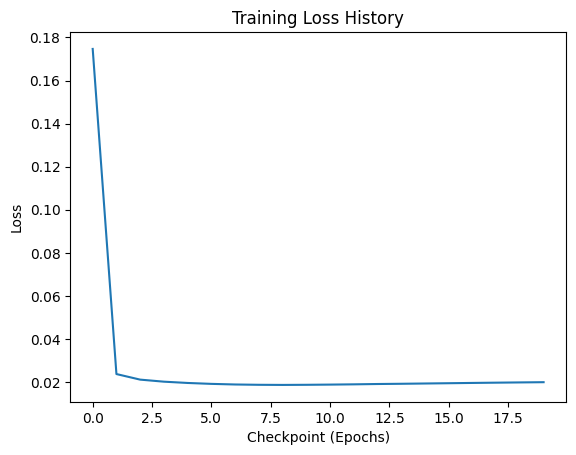

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import for sklearn dataset and preprocessing
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# ============================
# Activation functions and their derivatives
# ============================

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(z, a):
    # Note: z is not used here; kept for uniform signature.
    return a * (1 - a)

def relu(x):
    return np.maximum(0, x)

def relu_derivative(z, a):
    return (z > 0).astype(float)

def linear(x):
    return x

def linear_derivative(z, a):
    return np.ones_like(a)

activation_functions = {
    "sigmoid": sigmoid,
    "relu": relu,
    "linear": linear
}

activation_derivatives = {
    "sigmoid": lambda z, a: sigmoid_derivative(z, a),
    "relu": lambda z, a: relu_derivative(z, a),
    "linear": lambda z, a: linear_derivative(z, a)
}

# ============================
# Loss functions and their derivatives
# ============================

def binary_crossentropy_loss(y_true, y_pred):
    epsilon = 1e-8
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

def binary_crossentropy_derivative(y_true, y_pred):
    epsilon = 1e-8
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return - (y_true / y_pred) + ((1 - y_true) / (1 - y_pred))

def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def mse_derivative(y_true, y_pred):
    return 2 * (y_pred - y_true)

loss_functions = {
    "binary_crossentropy": binary_crossentropy_loss,
    "mse": mse_loss
}

loss_derivatives = {
    "binary_crossentropy": binary_crossentropy_derivative,
    "mse": mse_derivative
}

# ============================
# Regularization functions (modular)
# ============================

def compute_reg_gradient(W, lambda_reg, reg_type, m):
    if reg_type == "l2":
        return lambda_reg * W / m
    elif reg_type == "l1":
        return lambda_reg * np.sign(W) / m
    else:
        return 0

def compute_reg_loss(W_list, lambda_reg, reg_type):
    if reg_type == "l2":
        return (lambda_reg / 2) * sum(np.sum(W ** 2) for W in W_list)
    elif reg_type == "l1":
        return lambda_reg * sum(np.sum(np.abs(W)) for W in W_list)
    else:
        return 0

# ============================
# Neural Network Class with Learning Rate Decay Options and Custom Weight Initialization
# ============================

class NeuralNetwork:
    def __init__(self, layers, learning_rate=0.01, lambda_reg=0.001, reg_type="l2",
                 loss_function_name=None,
                 activation_function_name="relu",
                 output_activation_function_name=None,
                 activation_function_names=None,
                 task="classification",
                 lr_decay_type="none",  # Options: "none", "exponential", "linear"
                 decay_rate=0.0,
                 weight_init="base"):  # New parameter for weight initialization strategy
        """
        :param layers: List containing the size of each layer (input, hidden, output)
        :param learning_rate: Initial learning rate
        :param lambda_reg: Regularization coefficient
        :param reg_type: Type of regularization ("l2", "l1", or other for none)
        :param loss_function_name: Name of the loss function (if None, set based on task)
        :param activation_function_name: Activation to use for hidden layers (if activation_function_names not provided)
        :param output_activation_function_name: Activation for the output layer (if None, set based on task)
        :param activation_function_names: List of activation function names for each layer (length = len(layers)-1)
        :param task: "classification" or "regression"
        :param lr_decay_type: Learning rate decay strategy ("none", "exponential", "linear")
        :param decay_rate: Decay rate used in the learning rate schedule
        :param weight_init: Weight initialization strategy ("base" uses fan-in scaling or "glorot")
        """
        self.layers = layers
        self.initial_learning_rate = learning_rate
        self.learning_rate = learning_rate
        self.lambda_reg = lambda_reg
        self.reg_type = reg_type
        self.task = task
        self.lr_decay_type = lr_decay_type
        self.decay_rate = decay_rate
        self.weight_init = weight_init  # Store the weight initialization strategy
        
        # Set defaults based on task
        if self.task == "regression":
            self.loss_function_name = loss_function_name or "mse"
            output_activation_function_name = output_activation_function_name or "linear"
        else:
            self.loss_function_name = loss_function_name or "binary_crossentropy"
            output_activation_function_name = output_activation_function_name or "sigmoid"
        
        # If no list of activations is provided, use the same activation for all hidden layers and set the output activation
        if activation_function_names is None:
            self.activation_function_names = [activation_function_name] * (len(layers) - 1)
            self.activation_function_names[-1] = output_activation_function_name
        else:
            if len(activation_function_names) != len(layers) - 1:
                raise ValueError("activation_function_names must have length equal to len(layers)-1.")
            self.activation_function_names = activation_function_names
        
        self._initialize_parameters()
        
    def _initialize_parameters(self):
        self.W = []
        self.b = []
        np.random.seed(42)
        for i in range(len(self.layers) - 1):
            fan_in = self.layers[i]
            fan_out = self.layers[i + 1]
            if self.weight_init == "base":
                # Standard random initialization scaled by fan-in
                std = np.sqrt(1.0 / fan_in)
            elif self.weight_init == "glorot":
                # Glorot (Xavier) initialization
                std = np.sqrt(2.0 / (fan_in + fan_out))
            else:
                raise ValueError("Unsupported weight initialization strategy. Use 'base' or 'glorot'.")
            weight = np.random.randn(fan_in, fan_out) * std
            self.W.append(weight)
            self.b.append(np.zeros((1, fan_out)))
    
    def _apply_activation(self, x, func_name):
        if func_name not in activation_functions:
            raise ValueError(f"Unsupported activation: {func_name}")
        return activation_functions[func_name](x)
    
    def _apply_activation_derivative(self, z, a, func_name):
        if func_name not in activation_derivatives:
            raise ValueError(f"Unsupported activation derivative: {func_name}")
        return activation_derivatives[func_name](z, a)
    
    def _forward(self, X):
        A = [X]
        Z = []
        # Forward propagation through hidden layers
        for i in range(len(self.W) - 1):
            z_curr = np.dot(A[-1], self.W[i]) + self.b[i]
            Z.append(z_curr)
            a_curr = self._apply_activation(z_curr, self.activation_function_names[i])
            A.append(a_curr)
        # Forward propagation through output layer
        z_out = np.dot(A[-1], self.W[-1]) + self.b[-1]
        Z.append(z_out)
        a_out = self._apply_activation(z_out, self.activation_function_names[-1])
        A.append(a_out)
        return Z, A
    
    def _backward(self, X, y, Z, A):
        m = X.shape[0]
        if self.loss_function_name not in loss_derivatives:
            raise ValueError(f"Unsupported loss derivative: {self.loss_function_name}")
        # Compute derivative of loss with respect to output activation
        dA = loss_derivatives[self.loss_function_name](y, A[-1])
        # Compute derivative with respect to z at output layer
        dZ = dA * self._apply_activation_derivative(Z[-1], A[-1], self.activation_function_names[-1])
        reg_term = compute_reg_gradient(self.W[-1], self.lambda_reg, self.reg_type, m)
        dW = [np.dot(A[-2].T, dZ) / m + reg_term]
        db = [np.sum(dZ, axis=0, keepdims=True) / m]
        
        # Backpropagation through hidden layers
        for i in range(len(self.W) - 2, -1, -1):
            dA = np.dot(dZ, self.W[i + 1].T)
            dZ = dA * self._apply_activation_derivative(Z[i], A[i + 1], self.activation_function_names[i])
            reg_term = compute_reg_gradient(self.W[i], self.lambda_reg, self.reg_type, m)
            dW.insert(0, np.dot(A[i].T, dZ) / m + reg_term)
            db.insert(0, np.sum(dZ, axis=0, keepdims=True) / m)
        
        # Update parameters using current learning rate
        for i in range(len(self.W)):
            self.W[i] -= self.learning_rate * dW[i]
            self.b[i] -= self.learning_rate * db[i]
    
    def train(self, X, y, epochs=300, batch_size=32, verbose=True):
        loss_history = []
        for epoch in range(epochs):
            # Update learning rate according to the decay schedule
            if self.lr_decay_type == "exponential":
                self.learning_rate = self.initial_learning_rate * np.exp(-self.decay_rate * epoch)
            elif self.lr_decay_type == "linear":
                # Ensure learning rate does not go negative.
                self.learning_rate = self.initial_learning_rate * max(0, 1 - self.decay_rate * epoch)
            # Otherwise ("none"), keep the initial learning rate.
            
            permutation = np.random.permutation(X.shape[0])
            X_shuffled = X[permutation]
            y_shuffled = y[permutation]
            for i in range(0, X.shape[0], batch_size):
                X_batch = X_shuffled[i:i + batch_size]
                y_batch = y_shuffled[i:i + batch_size]
                Z, A = self._forward(X_batch)
                self._backward(X_batch, y_batch, Z, A)
            if epoch % max(1, int(epochs / 20)) == 0:
                _, A_full = self._forward(X)
                loss = loss_functions[self.loss_function_name](y, A_full[-1])
                reg_loss = compute_reg_loss(self.W, self.lambda_reg, self.reg_type)
                total_loss = loss + reg_loss
                loss_history.append(total_loss)
                if verbose:
                    print(f"Epoch {epoch:4d}, Loss: {total_loss:.4f}, Learning Rate: {self.learning_rate:.6f}")
        return loss_history
    
    def predict(self, X):
        _, A = self._forward(X)
        output = A[-1]
        if self.task == "classification":
            # For binary classification, threshold at 0.5
            if output.shape[1] == 1:
                return (output > 0.5).astype(int)
            else:
                return np.argmax(output, axis=1)
        else:  # regression
            return output
    
    def evaluate(self, X, y):
        predictions = self.predict(X)
        if self.task == "regression":
            return mse_loss(y, predictions)
        else:
            # If y is one-hot encoded, convert to class labels
            if y.ndim > 1 and y.shape[1] > 1:
                y_true = np.argmax(y, axis=1)
            else:
                y_true = y
            return np.mean(predictions == y_true)

# ============================
# Testing on a sklearn Classification Dataset
# ============================

# Load the breast cancer dataset (binary classification)
data = load_breast_cancer()
X = data.data
y = data.target.reshape(-1, 1)  # reshape y to be a column vector

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the network architecture
input_size = X_train.shape[1]
hidden_units = 10
output_size = 1  # binary classification
layers = [input_size, hidden_units, output_size]

# Define activation functions for hidden and output layers
activation_funcs = ["relu", "sigmoid"]

# Create the NeuralNetwork instance with learning rate decay and custom weight initialization.
# Set weight_init to "base" (fan-in scaling) or "glorot" as desired.
nn_clf = NeuralNetwork(
    layers=layers,
    learning_rate=0.1,
    lambda_reg=0.001,
    reg_type="l2",
    loss_function_name="mse",
    activation_function_names=activation_funcs,
    task="classification",
    lr_decay_type="exponential",  # Try "exponential", "linear", or "none"
    decay_rate=0.001,             # Adjust decay rate as needed
    weight_init="base"          # Choose between "base" or "glorot"
)

print("Training the neural network on the breast cancer dataset...")
loss_history = nn_clf.train(X_train, y_train, epochs=1000, batch_size=32, verbose=True)

accuracy = nn_clf.evaluate(X_test, y_test)
print(f"\nNeural Network Classification Accuracy: {accuracy:.4f}")

# Plot the training loss history
pd.Series(loss_history).plot(title="Training Loss History")
plt.xlabel("Checkpoint (Epochs)")
plt.ylabel("Loss")
plt.show()


Training the neural network on the breast cancer dataset...
Epoch    0, Loss: 0.1739, Learning Rate: 0.100000
Epoch   50, Loss: 0.0237, Learning Rate: 0.095123
Epoch  100, Loss: 0.0211, Learning Rate: 0.090484
Epoch  150, Loss: 0.0202, Learning Rate: 0.086071
Epoch  200, Loss: 0.0196, Learning Rate: 0.081873
Epoch  250, Loss: 0.0191, Learning Rate: 0.077880
Epoch  300, Loss: 0.0189, Learning Rate: 0.074082
Epoch  350, Loss: 0.0187, Learning Rate: 0.070469
Epoch  400, Loss: 0.0187, Learning Rate: 0.067032
Epoch  450, Loss: 0.0187, Learning Rate: 0.063763
Epoch  500, Loss: 0.0188, Learning Rate: 0.060653
Epoch  550, Loss: 0.0190, Learning Rate: 0.057695
Epoch  600, Loss: 0.0191, Learning Rate: 0.054881
Epoch  650, Loss: 0.0192, Learning Rate: 0.052205
Epoch  700, Loss: 0.0194, Learning Rate: 0.049659
Epoch  750, Loss: 0.0195, Learning Rate: 0.047237
Epoch  800, Loss: 0.0196, Learning Rate: 0.044933
Epoch  850, Loss: 0.0198, Learning Rate: 0.042741
Epoch  900, Loss: 0.0199, Learning Rate:

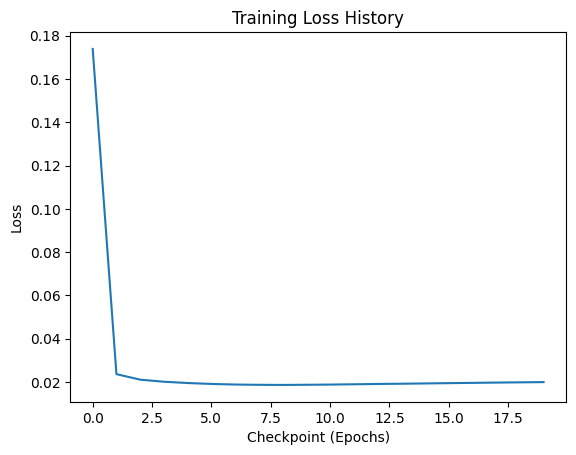

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import for sklearn dataset and preprocessing
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# ============================
# Activation functions and their derivatives
# ============================

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(z, a):
    # Note: z is not used here; kept for uniform signature.
    return a * (1 - a)

def relu(x):
    return np.maximum(0, x)

def relu_derivative(z, a):
    return (z > 0).astype(float)

def linear(x):
    return x

def linear_derivative(z, a):
    return np.ones_like(a)

activation_functions = {
    "sigmoid": sigmoid,
    "relu": relu,
    "linear": linear
}

activation_derivatives = {
    "sigmoid": lambda z, a: sigmoid_derivative(z, a),
    "relu": lambda z, a: relu_derivative(z, a),
    "linear": lambda z, a: linear_derivative(z, a)
}

# ============================
# Loss functions and their derivatives
# ============================

def binary_crossentropy_loss(y_true, y_pred):
    epsilon = 1e-8
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

def binary_crossentropy_derivative(y_true, y_pred):
    epsilon = 1e-8
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return - (y_true / y_pred) + ((1 - y_true) / (1 - y_pred))

def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def mse_derivative(y_true, y_pred):
    return 2 * (y_pred - y_true)

loss_functions = {
    "binary_crossentropy": binary_crossentropy_loss,
    "mse": mse_loss
}

loss_derivatives = {
    "binary_crossentropy": binary_crossentropy_derivative,
    "mse": mse_derivative
}

# ============================
# Regularization functions (modular)
# ============================

def compute_reg_gradient(W, lambda_reg, reg_type, m):
    if reg_type == "l2":
        return lambda_reg * W / m
    elif reg_type == "l1":
        return lambda_reg * np.sign(W) / m
    else:
        return 0

def compute_reg_loss(W_list, lambda_reg, reg_type):
    if reg_type == "l2":
        return (lambda_reg / 2) * sum(np.sum(W ** 2) for W in W_list)
    elif reg_type == "l1":
        return lambda_reg * sum(np.sum(np.abs(W)) for W in W_list)
    else:
        return 0

# ============================
# Neural Network Class with Learning Rate Decay, Momentum, and Custom Weight Initialization
# ============================

class NeuralNetwork:
    def __init__(self, layers, learning_rate=0.01, lambda_reg=0.001, reg_type="l2",
                 loss_function_name=None,
                 activation_function_name="relu",
                 output_activation_function_name=None,
                 activation_function_names=None,
                 task="classification",
                 lr_decay_type="none",  # Options: "none", "exponential", "linear"
                 decay_rate=0.0,
                 weight_init="base",  # "base" (fan-in scaling) or "glorot"
                 momentum_type="none",  # Options: "none", "momentum", "nesterov momentum"
                 momentum_alpha=0.9):    # momentum coefficient
        """
        :param layers: List containing the size of each layer (input, hidden, output)
        :param learning_rate: Initial learning rate
        :param lambda_reg: Regularization coefficient
        :param reg_type: Type of regularization ("l2", "l1", or other for none)
        :param loss_function_name: Name of the loss function (if None, set based on task)
        :param activation_function_name: Activation to use for hidden layers (if activation_function_names not provided)
        :param output_activation_function_name: Activation for the output layer (if None, set based on task)
        :param activation_function_names: List of activation function names for each layer (length = len(layers)-1)
        :param task: "classification" or "regression"
        :param lr_decay_type: Learning rate decay strategy ("none", "exponential", "linear")
        :param decay_rate: Decay rate used in the learning rate schedule
        :param weight_init: Weight initialization strategy ("base" uses fan-in scaling or "glorot")
        :param momentum_type: Momentum strategy ("none", "momentum", "nesterov momentum")
        :param momentum_alpha: Momentum coefficient (e.g., 0.9)
        """
        self.layers = layers
        self.initial_learning_rate = learning_rate
        self.learning_rate = learning_rate
        self.lambda_reg = lambda_reg
        self.reg_type = reg_type
        self.task = task
        self.lr_decay_type = lr_decay_type
        self.decay_rate = decay_rate
        self.weight_init = weight_init  # Weight initialization strategy
        
        # Set momentum parameters
        if momentum_type not in {"none", "momentum", "nesterov momentum"}:
            raise ValueError("momentum_type must be 'none', 'momentum', or 'nesterov momentum'.")
        self.momentum_type = momentum_type
        self.momentum_alpha = momentum_alpha if momentum_type != "none" else 0.0
        
        # Set defaults based on task
        if self.task == "regression":
            self.loss_function_name = loss_function_name or "mse"
            output_activation_function_name = output_activation_function_name or "linear"
        else:
            self.loss_function_name = loss_function_name or "binary_crossentropy"
            output_activation_function_name = output_activation_function_name or "sigmoid"
        
        # Set activation functions for layers
        if activation_function_names is None:
            self.activation_function_names = [activation_function_name] * (len(layers) - 1)
            self.activation_function_names[-1] = output_activation_function_name
        else:
            if len(activation_function_names) != len(layers) - 1:
                raise ValueError("activation_function_names must have length equal to len(layers)-1.")
            self.activation_function_names = activation_function_names
        
        self._initialize_parameters()
        # Initialize momentum accumulators (even if not used, for consistency)
        self.vW = [np.zeros_like(W) for W in self.W]
        self.vb = [np.zeros_like(b) for b in self.b]
        
    def _initialize_parameters(self):
        self.W = []
        self.b = []
        np.random.seed(42)
        for i in range(len(self.layers) - 1):
            fan_in = self.layers[i]
            fan_out = self.layers[i + 1]
            if self.weight_init == "base":
                # Standard random initialization scaled by fan-in
                std = np.sqrt(1.0 / fan_in)
            elif self.weight_init == "glorot":
                # Glorot (Xavier) initialization
                std = np.sqrt(2.0 / (fan_in + fan_out))
            else:
                raise ValueError("Unsupported weight initialization strategy. Use 'base' or 'glorot'.")
            weight = np.random.randn(fan_in, fan_out) * std
            self.W.append(weight)
            self.b.append(np.zeros((1, fan_out)))
    
    def _apply_activation(self, x, func_name):
        if func_name not in activation_functions:
            raise ValueError(f"Unsupported activation: {func_name}")
        return activation_functions[func_name](x)
    
    def _apply_activation_derivative(self, z, a, func_name):
        if func_name not in activation_derivatives:
            raise ValueError(f"Unsupported activation derivative: {func_name}")
        return activation_derivatives[func_name](z, a)
    
    def _forward(self, X, weights=None, biases=None):
        """
        Forward propagation. If weights and biases are provided, they are used;
        otherwise the network's parameters are used.
        Returns lists Z (pre-activations) and A (activations).
        """
        if weights is None:
            weights = self.W
        if biases is None:
            biases = self.b
            
        A = [X]
        Z = []
        # Forward through hidden layers
        for i in range(len(weights) - 1):
            z_curr = np.dot(A[-1], weights[i]) + biases[i]
            Z.append(z_curr)
            a_curr = self._apply_activation(z_curr, self.activation_function_names[i])
            A.append(a_curr)
        # Forward through output layer
        z_out = np.dot(A[-1], weights[-1]) + biases[-1]
        Z.append(z_out)
        a_out = self._apply_activation(z_out, self.activation_function_names[-1])
        A.append(a_out)
        return Z, A
    
    def _compute_gradients(self, X, y, Z, A, weights=None):
        """
        Compute gradients dW and db given inputs X, target y, pre-activations Z and activations A.
        Optionally, a custom set of weights (used in lookahead for Nesterov momentum) can be provided.
        Returns lists dW and db.
        """
        if weights is None:
            weights = self.W
        m = X.shape[0]
        # Compute derivative of loss with respect to output activation
        dA = loss_derivatives[self.loss_function_name](y, A[-1])
        # Output layer
        dZ = dA * self._apply_activation_derivative(Z[-1], A[-1], self.activation_function_names[-1])
        reg_term = compute_reg_gradient(weights[-1], self.lambda_reg, self.reg_type, m)
        dW = [np.dot(A[-2].T, dZ) / m + reg_term]
        db = [np.sum(dZ, axis=0, keepdims=True) / m]
        
        # Backpropagate through hidden layers
        for i in range(len(weights) - 2, -1, -1):
            dA = np.dot(dZ, weights[i + 1].T)
            dZ = dA * self._apply_activation_derivative(Z[i], A[i + 1], self.activation_function_names[i])
            reg_term = compute_reg_gradient(weights[i], self.lambda_reg, self.reg_type, m)
            dW.insert(0, np.dot(A[i].T, dZ) / m + reg_term)
            db.insert(0, np.sum(dZ, axis=0, keepdims=True) / m)
            
        return dW, db
    
    def train(self, X, y, epochs=300, batch_size=32, verbose=True):
        loss_history = []
        n_samples = X.shape[0]
        for epoch in range(epochs):
            # Update learning rate based on decay schedule
            if self.lr_decay_type == "exponential":
                self.learning_rate = self.initial_learning_rate * np.exp(-self.decay_rate * epoch)
            elif self.lr_decay_type == "linear":
                self.learning_rate = self.initial_learning_rate * max(0, 1 - self.decay_rate * epoch)
            # Otherwise ("none"), keep the initial learning rate.
            
            permutation = np.random.permutation(n_samples)
            X_shuffled = X[permutation]
            y_shuffled = y[permutation]
            
            for i in range(0, n_samples, batch_size):
                X_batch = X_shuffled[i:i + batch_size]
                y_batch = y_shuffled[i:i + batch_size]
                
                # Choose update strategy based on momentum type
                if self.momentum_type == "nesterov momentum":
                    # Compute lookahead parameters
                    weights_lookahead = [self.W[j] - self.momentum_alpha * self.vW[j] for j in range(len(self.W))]
                    biases_lookahead = [self.b[j] - self.momentum_alpha * self.vb[j] for j in range(len(self.b))]
                    Z, A = self._forward(X_batch, weights=weights_lookahead, biases=biases_lookahead)
                    dW, db = self._compute_gradients(X_batch, y_batch, Z, A, weights=weights_lookahead)
                    
                    # Update momentum accumulators and actual parameters
                    for j in range(len(self.W)):
                        self.vW[j] = self.momentum_alpha * self.vW[j] + self.learning_rate * dW[j]
                        self.vb[j] = self.momentum_alpha * self.vb[j] + self.learning_rate * db[j]
                        self.W[j] -= self.vW[j]
                        self.b[j] -= self.vb[j]
                        
                elif self.momentum_type == "momentum":
                    # Standard momentum: compute gradients with current parameters
                    Z, A = self._forward(X_batch)
                    dW, db = self._compute_gradients(X_batch, y_batch, Z, A)
                    for j in range(len(self.W)):
                        self.vW[j] = self.momentum_alpha * self.vW[j] + self.learning_rate * dW[j]
                        self.vb[j] = self.momentum_alpha * self.vb[j] + self.learning_rate * db[j]
                        self.W[j] -= self.vW[j]
                        self.b[j] -= self.vb[j]
                        
                else:  # No momentum
                    Z, A = self._forward(X_batch)
                    dW, db = self._compute_gradients(X_batch, y_batch, Z, A)
                    for j in range(len(self.W)):
                        self.W[j] -= self.learning_rate * dW[j]
                        self.b[j] -= self.learning_rate * db[j]
                        
            # Log loss at checkpoints
            if epoch % max(1, int(epochs / 20)) == 0:
                _, A_full = self._forward(X)
                loss = loss_functions[self.loss_function_name](y, A_full[-1])
                reg_loss = compute_reg_loss(self.W, self.lambda_reg, self.reg_type)
                total_loss = loss + reg_loss
                loss_history.append(total_loss)
                if verbose:
                    print(f"Epoch {epoch:4d}, Loss: {total_loss:.4f}, Learning Rate: {self.learning_rate:.6f}")
                    
        return loss_history
    
    def predict(self, X):
        _, A = self._forward(X)
        output = A[-1]
        if self.task == "classification":
            # For binary classification, threshold at 0.5
            if output.shape[1] == 1:
                return (output > 0.5).astype(int)
            else:
                return np.argmax(output, axis=1)
        else:  # regression
            return output
    
    def evaluate(self, X, y):
        predictions = self.predict(X)
        if self.task == "regression":
            return mse_loss(y, predictions)
        else:
            # If y is one-hot encoded, convert to class labels
            if y.ndim > 1 and y.shape[1] > 1:
                y_true = np.argmax(y, axis=1)
            else:
                y_true = y
            return np.mean(predictions == y_true)

# ============================
# Testing on a sklearn Classification Dataset
# ============================

# Load the breast cancer dataset (binary classification)
data = load_breast_cancer()
X = data.data
y = data.target.reshape(-1, 1)  # reshape y to be a column vector

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the network architecture
input_size = X_train.shape[1]
hidden_units = 10
output_size = 1  # binary classification
layers = [input_size, hidden_units, output_size]

# Define activation functions for hidden and output layers
activation_funcs = ["relu", "sigmoid"]

# Create the NeuralNetwork instance with learning rate decay, momentum, and custom weight initialization.
nn_clf = NeuralNetwork(
    layers=layers,
    learning_rate=0.1,
    lambda_reg=0.001,
    reg_type="l2",
    loss_function_name="mse",
    activation_function_names=activation_funcs,
    task="classification",
    lr_decay_type="exponential",  # Try "exponential", "linear", or "none"
    decay_rate=0.001,             # Adjust decay rate as needed
    weight_init="base",           # Choose between "base" or "glorot"
    momentum_type="nesterov momentum",  # "none", "momentum", or "nesterov momentum"
    momentum_alpha=0.01            # Momentum coefficient
)

print("Training the neural network on the breast cancer dataset...")
loss_history = nn_clf.train(X_train, y_train, epochs=1000, batch_size=32, verbose=True)

accuracy = nn_clf.evaluate(X_test, y_test)
print(f"\nNeural Network Classification Accuracy: {accuracy:.4f}")

# Plot the training loss history
pd.Series(loss_history).plot(title="Training Loss History")
plt.xlabel("Checkpoint (Epochs)")
plt.ylabel("Loss")
plt.show()


Using cached ../datasets/monks/monk-1-train.csv
Using cached ../datasets/monks/monk-1-test.csv
One-hot encoding MONK-1 dataset...
Epoch    0, Loss: 0.2538, Learning Rate: 0.200000
Epoch    5, Loss: 0.2384, Learning Rate: 0.199000
Epoch   10, Loss: 0.2203, Learning Rate: 0.198000
Epoch   15, Loss: 0.1969, Learning Rate: 0.197000
Epoch   20, Loss: 0.1768, Learning Rate: 0.196000
Epoch   25, Loss: 0.1612, Learning Rate: 0.195000
Epoch   30, Loss: 0.1499, Learning Rate: 0.194000
Epoch   35, Loss: 0.1412, Learning Rate: 0.193000
Epoch   40, Loss: 0.1340, Learning Rate: 0.192000
Epoch   45, Loss: 0.1279, Learning Rate: 0.191000
Epoch   50, Loss: 0.1223, Learning Rate: 0.190000
Epoch   55, Loss: 0.1173, Learning Rate: 0.189000
Epoch   60, Loss: 0.1128, Learning Rate: 0.188000
Epoch   65, Loss: 0.1085, Learning Rate: 0.187000
Epoch   70, Loss: 0.1047, Learning Rate: 0.186000
Epoch   75, Loss: 0.1008, Learning Rate: 0.185000
Epoch   80, Loss: 0.0971, Learning Rate: 0.184000
Epoch   85, Loss: 0.

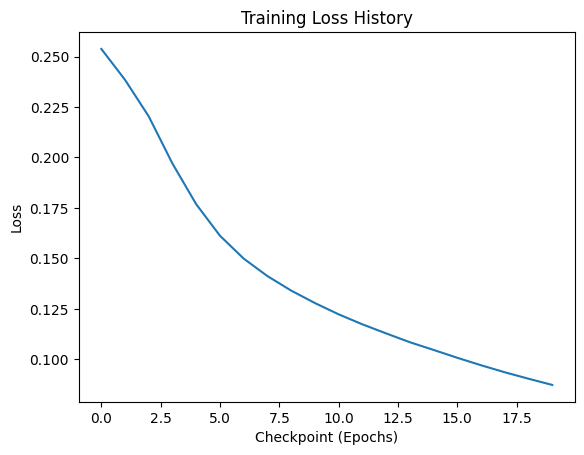

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from lib.data_loader import get_monks_dataset

# ============================
# Activation functions and their derivatives
# ============================

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(z, a):
    # Note: z is not used here; kept for uniform signature.
    return a * (1 - a)

def relu(x):
    return np.maximum(0, x)

def relu_derivative(z, a):
    return (z > 0).astype(float)

def linear(x):
    return x

def linear_derivative(z, a):
    return np.ones_like(a)

activation_functions = {
    "sigmoid": sigmoid,
    "relu": relu,
    "linear": linear
}

activation_derivatives = {
    "sigmoid": lambda z, a: sigmoid_derivative(z, a),
    "relu": lambda z, a: relu_derivative(z, a),
    "linear": lambda z, a: linear_derivative(z, a)
}

# ============================
# Loss functions and their derivatives
# ============================

def binary_crossentropy_loss(y_true, y_pred):
    """
    Binary crossentropy loss for binary classification.
    """
    epsilon = 1e-8
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

def binary_crossentropy_derivative(y_true, y_pred):
    """
    Derivative of the binary crossentropy loss.
    """
    epsilon = 1e-8
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return - (y_true / y_pred) + ((1 - y_true) / (1 - y_pred))

def mse_loss(y_true, y_pred):
    """
    Mean Squared Error (MSE) loss, typically used for regression.
    """
    return np.mean((y_true - y_pred) ** 2)

def mse_derivative(y_true, y_pred):
    """
    Derivative of the MSE loss.
    """
    return 2 * (y_pred - y_true)

def mee_loss(y_true, y_pred):
    """
    Mean Euclidean Error (MEE) loss, defined as:
        E_MEE = (1/N) * sum over i [ ||y_true[i] - y_pred[i]||_2 ].
    """
    diff = y_true - y_pred  # shape: (N, d) or (N, 1)
    # Euclidean distance for each sample
    dist = np.sqrt(np.sum(diff ** 2, axis=1))  # shape: (N,)
    return np.mean(dist)

def mee_derivative(y_true, y_pred):
    """
    Derivative of the Mean Euclidean Error (MEE) loss.
    For each sample i, derivative wrt y_pred[i] is:
        (1/N) * ( (y_pred[i] - y_true[i]) / ||y_pred[i] - y_true[i]||_2 ).
    We safely handle the case where the norm is zero.
    """
    diff = (y_pred - y_true)  # shape: (N, d) or (N, 1)
    dist = np.sqrt(np.sum(diff ** 2, axis=1, keepdims=True))  # shape: (N, 1)
    # Avoid division by zero:
    epsilon = 1e-8
    dist_safe = np.where(dist == 0, epsilon, dist)
    N = y_true.shape[0]
    # Each sample's derivative is diff_i / dist_i, scaled by 1/N
    derivative = diff / dist_safe / N  # shape: (N, d)
    return derivative

loss_functions = {
    "binary_crossentropy": binary_crossentropy_loss,
    "mse": mse_loss,
    "mee": mee_loss,  
}

loss_derivatives = {
    "binary_crossentropy": binary_crossentropy_derivative,
    "mse": mse_derivative,
    "mee": mee_derivative, 
}

# ============================
# Regularization functions (modular)
# ============================

def compute_reg_gradient(W, lambda_reg, reg_type, m):
    if reg_type == "l2":
        return lambda_reg * W / m
    elif reg_type == "l1":
        return lambda_reg * np.sign(W) / m
    else:
        return 0

def compute_reg_loss(W_list, lambda_reg, reg_type):
    if reg_type == "l2":
        return (lambda_reg / 2) * sum(np.sum(W ** 2) for W in W_list)
    elif reg_type == "l1":
        return lambda_reg * sum(np.sum(np.abs(W)) for W in W_list)
    else:
        return 0

# ============================
# Neural Network Class with Learning Rate Decay, Momentum, and Custom Weight Initialization
# ============================

class NeuralNetwork:
    def __init__(self, layers, learning_rate=0.01, lambda_reg=0.001, reg_type="l2",
                 loss_function_name=None,
                 activation_function_name="relu",
                 output_activation_function_name=None,
                 activation_function_names=None,
                 task="classification",
                 lr_decay_type="none",  # Options: "none", "exponential", "linear"
                 decay_rate=0.0,
                 weight_init="base",  # "base" (fan-in scaling) or "glorot"
                 momentum_type="none",  # Options: "none", "momentum", "nesterov momentum"
                 momentum_alpha=0.9):    # momentum coefficient
        """
        :param layers: List containing the size of each layer (input, hidden, output)
        :param learning_rate: Initial learning rate
        :param lambda_reg: Regularization coefficient
        :param reg_type: Type of regularization ("l2", "l1", or other for none)
        :param loss_function_name: Name of the loss function (if None, set based on task)
        :param activation_function_name: Activation to use for hidden layers (if activation_function_names not provided)
        :param output_activation_function_name: Activation for the output layer (if None, set based on task)
        :param activation_function_names: List of activation function names for each layer (length = len(layers)-1)
        :param task: "classification" or "regression"
        :param lr_decay_type: Learning rate decay strategy ("none", "exponential", "linear")
        :param decay_rate: Decay rate used in the learning rate schedule
        :param weight_init: Weight initialization strategy ("base" uses fan-in scaling or "glorot")
        :param momentum_type: Momentum strategy ("none", "momentum", "nesterov momentum")
        :param momentum_alpha: Momentum coefficient (e.g., 0.9)
        """
        self.layers = layers
        self.initial_learning_rate = learning_rate
        self.learning_rate = learning_rate
        self.lambda_reg = lambda_reg
        self.reg_type = reg_type
        self.task = task
        self.lr_decay_type = lr_decay_type
        self.decay_rate = decay_rate
        self.weight_init = weight_init  # Weight initialization strategy
        
        # Set momentum parameters
        if momentum_type not in {"none", "momentum", "nesterov momentum"}:
            raise ValueError("momentum_type must be 'none', 'momentum', or 'nesterov momentum'.")
        self.momentum_type = momentum_type
        self.momentum_alpha = momentum_alpha if momentum_type != "none" else 0.0
        
        # Set defaults based on task
        if self.task == "regression":
            self.loss_function_name = loss_function_name or "mse"
            output_activation_function_name = output_activation_function_name or "linear"
        else:
            # Classification
            self.loss_function_name = loss_function_name or "binary_crossentropy"
            output_activation_function_name = output_activation_function_name or "sigmoid"
        
        # Set activation functions for layers
        if activation_function_names is None:
            self.activation_function_names = [activation_function_name] * (len(layers) - 1)
            self.activation_function_names[-1] = output_activation_function_name
        else:
            if len(activation_function_names) != len(layers) - 1:
                raise ValueError("activation_function_names must have length equal to len(layers)-1.")
            self.activation_function_names = activation_function_names
        
        self._initialize_parameters()
        # Initialize momentum accumulators (even if not used, for consistency)
        self.vW = [np.zeros_like(W) for W in self.W]
        self.vb = [np.zeros_like(b) for b in self.b]
        
    def _initialize_parameters(self):
        self.W = []
        self.b = []
        np.random.seed(42)
        for i in range(len(self.layers) - 1):
            fan_in = self.layers[i]
            fan_out = self.layers[i + 1]
            if self.weight_init == "base":
                # Standard random initialization scaled by fan-in
                std = np.sqrt(1.0 / fan_in)
            elif self.weight_init == "glorot":
                # Glorot (Xavier) initialization
                std = np.sqrt(2.0 / (fan_in + fan_out))
            else:
                raise ValueError("Unsupported weight initialization strategy. Use 'base' or 'glorot'.")
            weight = np.random.randn(fan_in, fan_out) * std
            self.W.append(weight)
            self.b.append(np.zeros((1, fan_out)))
    
    def _apply_activation(self, x, func_name):
        if func_name not in activation_functions:
            raise ValueError(f"Unsupported activation: {func_name}")
        return activation_functions[func_name](x)
    
    def _apply_activation_derivative(self, z, a, func_name):
        if func_name not in activation_derivatives:
            raise ValueError(f"Unsupported activation derivative: {func_name}")
        return activation_derivatives[func_name](z, a)
    
    def _forward(self, X, weights=None, biases=None):
        """
        Forward propagation. If weights and biases are provided, they are used;
        otherwise the network's parameters are used.
        Returns lists Z (pre-activations) and A (activations).
        """
        if weights is None:
            weights = self.W
        if biases is None:
            biases = self.b
            
        A = [X]
        Z = []
        # Forward through hidden layers
        for i in range(len(weights) - 1):
            z_curr = np.dot(A[-1], weights[i]) + biases[i]
            Z.append(z_curr)
            a_curr = self._apply_activation(z_curr, self.activation_function_names[i])
            A.append(a_curr)
        # Forward through output layer
        z_out = np.dot(A[-1], weights[-1]) + biases[-1]
        Z.append(z_out)
        a_out = self._apply_activation(z_out, self.activation_function_names[-1])
        A.append(a_out)
        return Z, A
    
    def _compute_gradients(self, X, y, Z, A, weights=None):
        """
        Compute gradients dW and db given inputs X, target y, pre-activations Z and activations A.
        Optionally, a custom set of weights (used in lookahead for Nesterov momentum) can be provided.
        Returns lists dW and db.
        """
        if weights is None:
            weights = self.W
        m = X.shape[0]
        # Compute derivative of loss with respect to output activation
        dA = loss_derivatives[self.loss_function_name](y, A[-1])
        # Output layer
        dZ = dA * self._apply_activation_derivative(Z[-1], A[-1], self.activation_function_names[-1])
        reg_term = compute_reg_gradient(weights[-1], self.lambda_reg, self.reg_type, m)
        dW = [np.dot(A[-2].T, dZ) / m + reg_term]
        db = [np.sum(dZ, axis=0, keepdims=True) / m]
        
        # Backpropagate through hidden layers
        for i in range(len(weights) - 2, -1, -1):
            dA = np.dot(dZ, weights[i + 1].T)
            dZ = dA * self._apply_activation_derivative(Z[i], A[i + 1], self.activation_function_names[i])
            reg_term = compute_reg_gradient(weights[i], self.lambda_reg, self.reg_type, m)
            dW.insert(0, np.dot(A[i].T, dZ) / m + reg_term)
            db.insert(0, np.sum(dZ, axis=0, keepdims=True) / m)
            
        return dW, db
    
    def train(self, X, y, epochs=300, batch_size=32, verbose=True):
        loss_history = []
        n_samples = X.shape[0]
        for epoch in range(epochs):
            # Update learning rate based on decay schedule
            if self.lr_decay_type == "exponential":
                self.learning_rate = self.initial_learning_rate * np.exp(-self.decay_rate * epoch)
            elif self.lr_decay_type == "linear":
                self.learning_rate = self.initial_learning_rate * max(0, 1 - self.decay_rate * epoch)
            # Otherwise ("none"), keep the initial learning rate.
            
            permutation = np.random.permutation(n_samples)
            X_shuffled = X[permutation]
            y_shuffled = y[permutation]
            
            for i in range(0, n_samples, batch_size):
                X_batch = X_shuffled[i:i + batch_size]
                y_batch = y_shuffled[i:i + batch_size]
                
                # Choose update strategy based on momentum type
                if self.momentum_type == "nesterov momentum":
                    # Compute lookahead parameters
                    weights_lookahead = [self.W[j] - self.momentum_alpha * self.vW[j] for j in range(len(self.W))]
                    biases_lookahead = [self.b[j] - self.momentum_alpha * self.vb[j] for j in range(len(self.b))]
                    Z, A = self._forward(X_batch, weights=weights_lookahead, biases=biases_lookahead)
                    dW, db = self._compute_gradients(X_batch, y_batch, Z, A, weights=weights_lookahead)
                    
                    # Update momentum accumulators and actual parameters
                    for j in range(len(self.W)):
                        self.vW[j] = self.momentum_alpha * self.vW[j] + self.learning_rate * dW[j]
                        self.vb[j] = self.momentum_alpha * self.vb[j] + self.learning_rate * db[j]
                        self.W[j] -= self.vW[j]
                        self.b[j] -= self.vb[j]
                        
                elif self.momentum_type == "momentum":
                    # Standard momentum: compute gradients with current parameters
                    Z, A = self._forward(X_batch)
                    dW, db = self._compute_gradients(X_batch, y_batch, Z, A)
                    for j in range(len(self.W)):
                        self.vW[j] = self.momentum_alpha * self.vW[j] + self.learning_rate * dW[j]
                        self.vb[j] = self.momentum_alpha * self.vb[j] + self.learning_rate * db[j]
                        self.W[j] -= self.vW[j]
                        self.b[j] -= self.vb[j]
                        
                else:  # No momentum
                    Z, A = self._forward(X_batch)
                    dW, db = self._compute_gradients(X_batch, y_batch, Z, A)
                    for j in range(len(self.W)):
                        self.W[j] -= self.learning_rate * dW[j]
                        self.b[j] -= self.learning_rate * db[j]
                        
            # Log loss at checkpoints
            if epoch % max(1, int(epochs / 20)) == 0:
                _, A_full = self._forward(X)
                loss = loss_functions[self.loss_function_name](y, A_full[-1])
                reg_loss = compute_reg_loss(self.W, self.lambda_reg, self.reg_type)
                total_loss = loss + reg_loss
                loss_history.append(total_loss)
                if verbose:
                    print(f"Epoch {epoch:4d}, Loss: {total_loss:.4f}, Learning Rate: {self.learning_rate:.6f}")
                    
        return loss_history
    
    def predict(self, X):
        _, A = self._forward(X)
        output = A[-1]
        if self.task == "classification":
            # For binary classification, threshold at 0.5
            if output.shape[1] == 1:
                return (output > 0.5).astype(int)
            else:
                return np.argmax(output, axis=1)
        else:  # regression
            return output
    
    def evaluate(self, X, y):
        predictions = self.predict(X)
        if self.task == "regression":
            return mse_loss(y, predictions)
        else:
            # If y is one-hot encoded, convert to class labels
            if y.ndim > 1 and y.shape[1] > 1:
                y_true = np.argmax(y, axis=1)
            else:
                y_true = y
            return np.mean(predictions == y_true)

# ============================
# Testing on a monk's dataset
# ============================

X_train, y_train, X_test, y_test = get_monks_dataset(1, one_hot_encode=True)

input_size = X_train.shape[1]
hidden_units = 10
output_size = 1  # binary classification
layers = [input_size, hidden_units, output_size]

# Define activation functions for hidden and output layers
activation_funcs = ["relu", "sigmoid"]

nn_clf = NeuralNetwork(
    layers=layers,
    learning_rate=0.2,
    lambda_reg=0.001,
    reg_type="l2",
    loss_function_name="mse",       
    activation_function_names=activation_funcs,
    task="classification",
    lr_decay_type="linear",    # "exponential", "linear", or "none"
    decay_rate=0.001,               # Adjust decay rate as needed
    weight_init="base",             # Choose between "base" or "glorot"å
)


loss_history = nn_clf.train(X_train, y_train, epochs=100, batch_size=32, verbose=True)

accuracy = nn_clf.evaluate(X_test, y_test)
print(f"\nNeural Network Classification Accuracy: {accuracy:.4f}")

pd.Series(loss_history).plot(title="Training Loss History")
plt.xlabel("Checkpoint (Epochs)")
plt.ylabel("Loss")
plt.show()

Using cached ../datasets/monks/monk-1-train.csv
Using cached ../datasets/monks/monk-1-test.csv
One-hot encoding MONK-1 dataset...
Epoch    0, Training Loss: 0.2537, Validation Loss: 0.2570, Learning Rate: 0.200000
Epoch    1, Training Loss: 0.2507, Validation Loss: 0.2551, Learning Rate: 0.199800
Epoch    2, Training Loss: 0.2476, Validation Loss: 0.2531, Learning Rate: 0.199600
Epoch    3, Training Loss: 0.2447, Validation Loss: 0.2513, Learning Rate: 0.199400
Epoch    4, Training Loss: 0.2418, Validation Loss: 0.2494, Learning Rate: 0.199200
Epoch    5, Training Loss: 0.2388, Validation Loss: 0.2474, Learning Rate: 0.199000
Epoch    6, Training Loss: 0.2358, Validation Loss: 0.2454, Learning Rate: 0.198800
Epoch    7, Training Loss: 0.2326, Validation Loss: 0.2431, Learning Rate: 0.198600
Epoch    8, Training Loss: 0.2293, Validation Loss: 0.2408, Learning Rate: 0.198400
Epoch    9, Training Loss: 0.2253, Validation Loss: 0.2381, Learning Rate: 0.198200
Epoch   10, Training Loss: 0.2

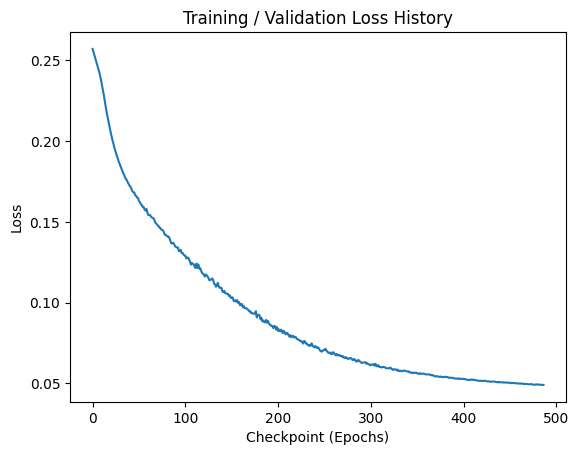

In [85]:
###### EARLY STOPPING #######

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from lib.data_loader import get_monks_dataset

# ============================
# Activation functions and their derivatives
# ============================

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(z, a):
    # Note: z is not used here; kept for uniform signature.
    return a * (1 - a)

def relu(x):
    return np.maximum(0, x)

def relu_derivative(z, a):
    return (z > 0).astype(float)

def linear(x):
    return x

def linear_derivative(z, a):
    return np.ones_like(a)

activation_functions = {
    "sigmoid": sigmoid,
    "relu": relu,
    "linear": linear
}

activation_derivatives = {
    "sigmoid": lambda z, a: sigmoid_derivative(z, a),
    "relu": lambda z, a: relu_derivative(z, a),
    "linear": lambda z, a: linear_derivative(z, a)
}

# ============================
# Loss functions and their derivatives
# ============================

def binary_crossentropy_loss(y_true, y_pred):
    """
    Binary crossentropy loss for binary classification.
    """
    epsilon = 1e-8
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

def binary_crossentropy_derivative(y_true, y_pred):
    """
    Derivative of the binary crossentropy loss.
    """
    epsilon = 1e-8
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return - (y_true / y_pred) + ((1 - y_true) / (1 - y_pred))

def mse_loss(y_true, y_pred):
    """
    Mean Squared Error (MSE) loss, typically used for regression.
    """
    return np.mean((y_true - y_pred) ** 2)

def mse_derivative(y_true, y_pred):
    """
    Derivative of the MSE loss.
    """
    return 2 * (y_pred - y_true)

def mee_loss(y_true, y_pred):
    """
    Mean Euclidean Error (MEE) loss, defined as:
        E_MEE = (1/N) * sum over i [ ||y_true[i] - y_pred[i]||_2 ].
    """
    diff = y_true - y_pred  # shape: (N, d) or (N, 1)
    # Euclidean distance for each sample
    dist = np.sqrt(np.sum(diff ** 2, axis=1))  # shape: (N,)
    return np.mean(dist)

def mee_derivative(y_true, y_pred):
    """
    Derivative of the Mean Euclidean Error (MEE) loss.
    For each sample i, derivative wrt y_pred[i] is:
        (1/N) * ( (y_pred[i] - y_true[i]) / ||y_pred[i] - y_true[i]||_2 ).
    We safely handle the case where the norm is zero.
    """
    diff = (y_pred - y_true)  # shape: (N, d) or (N, 1)
    dist = np.sqrt(np.sum(diff ** 2, axis=1, keepdims=True))  # shape: (N, 1)
    epsilon = 1e-8  # Avoid division by zero
    dist_safe = np.where(dist == 0, epsilon, dist)
    N = y_true.shape[0]
    derivative = diff / dist_safe / N  # shape: (N, d)
    return derivative

loss_functions = {
    "binary_crossentropy": binary_crossentropy_loss,
    "mse": mse_loss,
    "mee": mee_loss,  
}

loss_derivatives = {
    "binary_crossentropy": binary_crossentropy_derivative,
    "mse": mse_derivative,
    "mee": mee_derivative, 
}

# ============================
# Regularization functions (modular)
# ============================

def compute_reg_gradient(W, lambda_reg, reg_type, m):
    if reg_type == "l2":
        return lambda_reg * W / m
    elif reg_type == "l1":
        return lambda_reg * np.sign(W) / m
    else:
        return 0

def compute_reg_loss(W_list, lambda_reg, reg_type):
    if reg_type == "l2":
        return (lambda_reg / 2) * sum(np.sum(W ** 2) for W in W_list)
    elif reg_type == "l1":
        return lambda_reg * sum(np.sum(np.abs(W)) for W in W_list)
    else:
        return 0

# ============================
# Neural Network Class with Learning Rate Decay, Momentum, Custom Weight Initialization, and Early Stopping
# ============================

class NeuralNetwork:
    def __init__(self, layers, learning_rate=0.01, lambda_reg=0.001, reg_type="l2",
                 loss_function_name=None,
                 activation_function_name="relu",
                 output_activation_function_name=None,
                 activation_function_names=None,
                 task="classification",
                 lr_decay_type="none",  # Options: "none", "exponential", "linear"
                 decay_rate=0.0,
                 weight_init="base",  # "base" (fan-in scaling) or "glorot"
                 momentum_type="none",  # Options: "none", "momentum", "nesterov momentum"
                 momentum_alpha=0.9):    # momentum coefficient
        """
        :param layers: List containing the size of each layer (input, hidden, output)
        :param learning_rate: Initial learning rate
        :param lambda_reg: Regularization coefficient
        :param reg_type: Type of regularization ("l2", "l1", or other for none)
        :param loss_function_name: Name of the loss function (if None, set based on task)
        :param activation_function_name: Activation to use for hidden layers (if activation_function_names not provided)
        :param output_activation_function_name: Activation for the output layer (if None, set based on task)
        :param activation_function_names: List of activation function names for each layer (length = len(layers)-1)
        :param task: "classification" or "regression"
        :param lr_decay_type: Learning rate decay strategy ("none", "exponential", "linear")
        :param decay_rate: Decay rate used in the learning rate schedule
        :param weight_init: Weight initialization strategy ("base" uses fan-in scaling or "glorot")
        :param momentum_type: Momentum strategy ("none", "momentum", "nesterov momentum")
        :param momentum_alpha: Momentum coefficient (e.g., 0.9)
        """
        self.layers = layers
        self.initial_learning_rate = learning_rate
        self.learning_rate = learning_rate
        self.lambda_reg = lambda_reg
        self.reg_type = reg_type
        self.task = task
        self.lr_decay_type = lr_decay_type
        self.decay_rate = decay_rate
        self.weight_init = weight_init  # Weight initialization strategy
        
        # Set momentum parameters
        if momentum_type not in {"none", "momentum", "nesterov momentum"}:
            raise ValueError("momentum_type must be 'none', 'momentum', or 'nesterov momentum'.")
        self.momentum_type = momentum_type
        self.momentum_alpha = momentum_alpha if momentum_type != "none" else 0.0
        
        # Set defaults based on task
        if self.task == "regression":
            self.loss_function_name = loss_function_name or "mse"
            output_activation_function_name = output_activation_function_name or "linear"
        else:
            # Classification
            self.loss_function_name = loss_function_name or "binary_crossentropy"
            output_activation_function_name = output_activation_function_name or "sigmoid"
        
        # Set activation functions for layers
        if activation_function_names is None:
            self.activation_function_names = [activation_function_name] * (len(layers) - 1)
            self.activation_function_names[-1] = output_activation_function_name
        else:
            if len(activation_function_names) != len(layers) - 1:
                raise ValueError("activation_function_names must have length equal to len(layers)-1.")
            self.activation_function_names = activation_function_names
        
        self._initialize_parameters()
        # Initialize momentum accumulators (even if not used, for consistency)
        self.vW = [np.zeros_like(W) for W in self.W]
        self.vb = [np.zeros_like(b) for b in self.b]
        
    def _initialize_parameters(self):
        self.W = []
        self.b = []
        np.random.seed(42)
        for i in range(len(self.layers) - 1):
            fan_in = self.layers[i]
            fan_out = self.layers[i + 1]
            if self.weight_init == "base":
                # Standard random initialization scaled by fan-in
                std = np.sqrt(1.0 / fan_in)
            elif self.weight_init == "glorot":
                # Glorot (Xavier) initialization
                std = np.sqrt(2.0 / (fan_in + fan_out))
            else:
                raise ValueError("Unsupported weight initialization strategy. Use 'base' or 'glorot'.")
            weight = np.random.randn(fan_in, fan_out) * std
            self.W.append(weight)
            self.b.append(np.zeros((1, fan_out)))
    
    def _apply_activation(self, x, func_name):
        if func_name not in activation_functions:
            raise ValueError(f"Unsupported activation: {func_name}")
        return activation_functions[func_name](x)
    
    def _apply_activation_derivative(self, z, a, func_name):
        if func_name not in activation_derivatives:
            raise ValueError(f"Unsupported activation derivative: {func_name}")
        return activation_derivatives[func_name](z, a)
    
    def _forward(self, X, weights=None, biases=None):
        """
        Forward propagation. If weights and biases are provided, they are used;
        otherwise the network's parameters are used.
        Returns lists Z (pre-activations) and A (activations).
        """
        if weights is None:
            weights = self.W
        if biases is None:
            biases = self.b
            
        A = [X]
        Z = []
        # Forward through hidden layers
        for i in range(len(weights) - 1):
            z_curr = np.dot(A[-1], weights[i]) + biases[i]
            Z.append(z_curr)
            a_curr = self._apply_activation(z_curr, self.activation_function_names[i])
            A.append(a_curr)
        # Forward through output layer
        z_out = np.dot(A[-1], weights[-1]) + biases[-1]
        Z.append(z_out)
        a_out = self._apply_activation(z_out, self.activation_function_names[-1])
        A.append(a_out)
        return Z, A
    
    def _compute_gradients(self, X, y, Z, A, weights=None):
        """
        Compute gradients dW and db given inputs X, target y, pre-activations Z and activations A.
        Optionally, a custom set of weights (used in lookahead for Nesterov momentum) can be provided.
        Returns lists dW and db.
        """
        if weights is None:
            weights = self.W
        m = X.shape[0]
        # Compute derivative of loss with respect to output activation
        dA = loss_derivatives[self.loss_function_name](y, A[-1])
        # Output layer
        dZ = dA * self._apply_activation_derivative(Z[-1], A[-1], self.activation_function_names[-1])
        reg_term = compute_reg_gradient(weights[-1], self.lambda_reg, self.reg_type, m)
        dW = [np.dot(A[-2].T, dZ) / m + reg_term]
        db = [np.sum(dZ, axis=0, keepdims=True) / m]
        
        # Backpropagate through hidden layers
        for i in range(len(weights) - 2, -1, -1):
            dA = np.dot(dZ, weights[i + 1].T)
            dZ = dA * self._apply_activation_derivative(Z[i], A[i + 1], self.activation_function_names[i])
            reg_term = compute_reg_gradient(weights[i], self.lambda_reg, self.reg_type, m)
            dW.insert(0, np.dot(A[i].T, dZ) / m + reg_term)
            db.insert(0, np.sum(dZ, axis=0, keepdims=True) / m)
            
        return dW, db
    
    def train(self, X, y, epochs=300, batch_size=32, verbose=True,
              early_stopping=False, validation_data=None, patience=10, min_delta=0.0):
        """
        Train the neural network.
        
        :param X: Training data inputs.
        :param y: Training data targets.
        :param epochs: Maximum number of epochs to train.
        :param batch_size: Mini-batch size.
        :param verbose: Whether to print progress.
        :param early_stopping: Boolean flag to enable early stopping.
        :param validation_data: Tuple (X_val, y_val) for early stopping validation.
        :param patience: Number of epochs with no improvement to wait before stopping.
        :param min_delta: Minimum change in the monitored loss to qualify as an improvement.
        :return: List containing loss history at checkpoints.
        """
        if early_stopping and validation_data is None:
            raise ValueError("Validation data must be provided if early stopping is enabled.")
        
        loss_history = []
        n_samples = X.shape[0]
        
        best_loss = np.inf
        patience_counter = 0
        best_weights = None
        best_biases = None
        
        for epoch in range(epochs):
            # Update learning rate based on decay schedule
            if self.lr_decay_type == "exponential":
                self.learning_rate = self.initial_learning_rate * np.exp(-self.decay_rate * epoch)
            elif self.lr_decay_type == "linear":
                self.learning_rate = self.initial_learning_rate * max(0, 1 - self.decay_rate * epoch)
            # Otherwise ("none"), keep the initial learning rate.
            
            # Shuffle training data
            permutation = np.random.permutation(n_samples)
            X_shuffled = X[permutation]
            y_shuffled = y[permutation]
            
            # Process mini-batches
            for i in range(0, n_samples, batch_size):
                X_batch = X_shuffled[i:i + batch_size]
                y_batch = y_shuffled[i:i + batch_size]
                
                # Choose update strategy based on momentum type
                if self.momentum_type == "nesterov momentum":
                    # Compute lookahead parameters
                    weights_lookahead = [self.W[j] - self.momentum_alpha * self.vW[j] for j in range(len(self.W))]
                    biases_lookahead = [self.b[j] - self.momentum_alpha * self.vb[j] for j in range(len(self.b))]
                    Z, A = self._forward(X_batch, weights=weights_lookahead, biases=biases_lookahead)
                    dW, db = self._compute_gradients(X_batch, y_batch, Z, A, weights=weights_lookahead)
                    
                    # Update momentum accumulators and actual parameters
                    for j in range(len(self.W)):
                        self.vW[j] = self.momentum_alpha * self.vW[j] + self.learning_rate * dW[j]
                        self.vb[j] = self.momentum_alpha * self.vb[j] + self.learning_rate * db[j]
                        self.W[j] -= self.vW[j]
                        self.b[j] -= self.vb[j]
                        
                elif self.momentum_type == "momentum":
                    # Standard momentum: compute gradients with current parameters
                    Z, A = self._forward(X_batch)
                    dW, db = self._compute_gradients(X_batch, y_batch, Z, A)
                    for j in range(len(self.W)):
                        self.vW[j] = self.momentum_alpha * self.vW[j] + self.learning_rate * dW[j]
                        self.vb[j] = self.momentum_alpha * self.vb[j] + self.learning_rate * db[j]
                        self.W[j] -= self.vW[j]
                        self.b[j] -= self.vb[j]
                        
                else:  # No momentum
                    Z, A = self._forward(X_batch)
                    dW, db = self._compute_gradients(X_batch, y_batch, Z, A)
                    for j in range(len(self.W)):
                        self.W[j] -= self.learning_rate * dW[j]
                        self.b[j] -= self.learning_rate * db[j]
            
            # Compute full training loss for logging purposes
            _, A_full = self._forward(X)
            train_loss = loss_functions[self.loss_function_name](y, A_full[-1])
            reg_loss = compute_reg_loss(self.W, self.lambda_reg, self.reg_type)
            total_train_loss = train_loss + reg_loss
            
            if early_stopping:
                # Compute validation loss
                X_val, y_val = validation_data
                _, A_val = self._forward(X_val)
                val_loss = loss_functions[self.loss_function_name](y_val, A_val[-1])
                reg_loss_val = compute_reg_loss(self.W, self.lambda_reg, self.reg_type)
                total_val_loss = val_loss + reg_loss_val

                loss_history.append(total_val_loss)
                if verbose:
                    print(f"Epoch {epoch:4d}, Training Loss: {total_train_loss:.4f}, Validation Loss: {total_val_loss:.4f}, Learning Rate: {self.learning_rate:.6f}")
                
                # Check for improvement (by at least min_delta)
                if total_val_loss < best_loss - min_delta:
                    best_loss = total_val_loss
                    patience_counter = 0
                    # Save best model parameters
                    best_weights = [w.copy() for w in self.W]
                    best_biases = [b.copy() for b in self.b]
                else:
                    patience_counter += 1
                    if patience_counter >= patience:
                        if verbose:
                            print(f"Early stopping triggered at epoch {epoch}. Restoring best model parameters.")
                        # Restore best model parameters
                        if best_weights is not None:
                            self.W = best_weights
                            self.b = best_biases
                        return loss_history
            else:
                # Without early stopping, log training loss at intervals
                if epoch % max(1, int(epochs / 20)) == 0:
                    loss_history.append(total_train_loss)
                    if verbose:
                        print(f"Epoch {epoch:4d}, Loss: {total_train_loss:.4f}, Learning Rate: {self.learning_rate:.6f}")
                        
        return loss_history
    
    def predict(self, X):
        _, A = self._forward(X)
        output = A[-1]
        if self.task == "classification":
            # For binary classification, threshold at 0.5
            if output.shape[1] == 1:
                return (output > 0.5).astype(int)
            else:
                return np.argmax(output, axis=1)
        else:  # regression
            return output
    
    def evaluate(self, X, y):
        predictions = self.predict(X)
        if self.task == "regression":
            return mse_loss(y, predictions)
        else:
            # If y is one-hot encoded, convert to class labels
            if y.ndim > 1 and y.shape[1] > 1:
                y_true = np.argmax(y, axis=1)
            else:
                y_true = y
            return np.mean(predictions == y_true)

# ============================
# Testing on a monk's dataset
# ============================

X_train, y_train, X_test, y_test = get_monks_dataset(1, one_hot_encode=True)

input_size = X_train.shape[1]
hidden_units = 10
output_size = 1  # binary classification
layers = [input_size, hidden_units, output_size]

# Define activation functions for hidden and output layers
activation_funcs = ["relu", "sigmoid"]

nn_clf = NeuralNetwork(
    layers=layers,
    learning_rate=0.2,
    lambda_reg=0.001,
    reg_type="l2",
    loss_function_name="mse",       
    activation_function_names=activation_funcs,
    task="classification",
    lr_decay_type="linear",    # Options: "exponential", "linear", or "none"
    decay_rate=0.001,          # Adjust decay rate as needed
    weight_init="base",        # Choose between "base" or "glorot"
)

# For early stopping, we provide validation data.
# (In practice, you might set aside a validation split from your training data.)
loss_history = nn_clf.train(
    X_train, y_train,
    epochs=1000,
    batch_size=32,
    verbose=True,
    early_stopping=True,
    validation_data=(X_test, y_test),
    patience=10,
    min_delta=1e-4
)

accuracy = nn_clf.evaluate(X_test, y_test)
print(f"\nNeural Network Classification Accuracy: {accuracy:.4f}")

pd.Series(loss_history).plot(title="Training / Validation Loss History")
plt.xlabel("Checkpoint (Epochs)")
plt.ylabel("Loss")
plt.show()


Using cached ../datasets/monks/monk-1-train.csv
Using cached ../datasets/monks/monk-1-test.csv
One-hot encoding MONK-1 dataset...
Epoch    0, Training Loss: 0.2537, Validation Loss: 0.2570, Learning Rate: 0.200000
Epoch    1, Training Loss: 0.2506, Validation Loss: 0.2550, Learning Rate: 0.199800
Epoch    2, Training Loss: 0.2477, Validation Loss: 0.2531, Learning Rate: 0.199600
Epoch    3, Training Loss: 0.2448, Validation Loss: 0.2512, Learning Rate: 0.199400
Epoch    4, Training Loss: 0.2419, Validation Loss: 0.2494, Learning Rate: 0.199200
Epoch    5, Training Loss: 0.2389, Validation Loss: 0.2474, Learning Rate: 0.199000
Epoch    6, Training Loss: 0.2357, Validation Loss: 0.2453, Learning Rate: 0.198800
Epoch    7, Training Loss: 0.2326, Validation Loss: 0.2431, Learning Rate: 0.198600
Epoch    8, Training Loss: 0.2294, Validation Loss: 0.2410, Learning Rate: 0.198400
Epoch    9, Training Loss: 0.2251, Validation Loss: 0.2380, Learning Rate: 0.198200
Epoch   10, Training Loss: 0.2

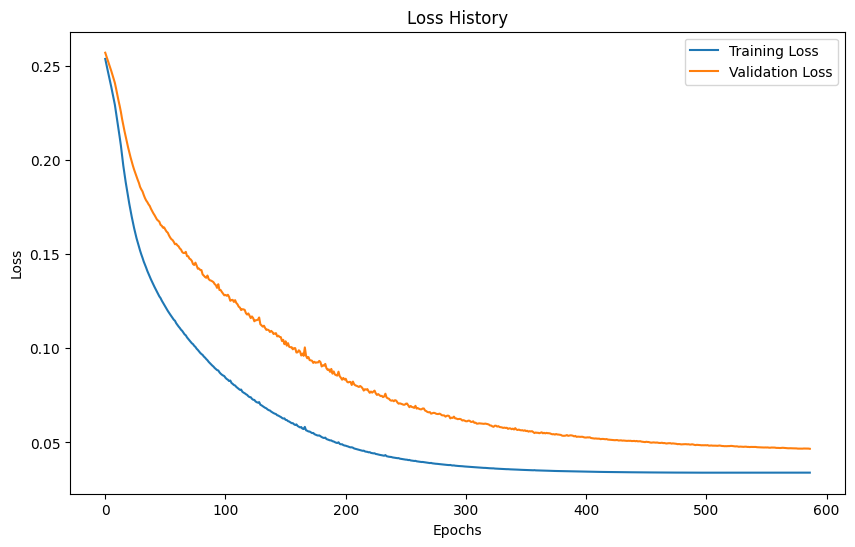

In [86]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from lib.data_loader import get_monks_dataset

# ============================
# Activation functions and their derivatives
# ============================

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(z, a):
    # Note: z is not used here; kept for uniform signature.
    return a * (1 - a)

def relu(x):
    return np.maximum(0, x)

def relu_derivative(z, a):
    return (z > 0).astype(float)

def linear(x):
    return x

def linear_derivative(z, a):
    return np.ones_like(a)

activation_functions = {
    "sigmoid": sigmoid,
    "relu": relu,
    "linear": linear
}

activation_derivatives = {
    "sigmoid": lambda z, a: sigmoid_derivative(z, a),
    "relu": lambda z, a: relu_derivative(z, a),
    "linear": lambda z, a: linear_derivative(z, a)
}

# ============================
# Loss functions and their derivatives
# ============================

def binary_crossentropy_loss(y_true, y_pred):
    """
    Binary crossentropy loss for binary classification.
    """
    epsilon = 1e-8
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

def binary_crossentropy_derivative(y_true, y_pred):
    """
    Derivative of the binary crossentropy loss.
    """
    epsilon = 1e-8
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return - (y_true / y_pred) + ((1 - y_true) / (1 - y_pred))

def mse_loss(y_true, y_pred):
    """
    Mean Squared Error (MSE) loss, typically used for regression.
    """
    return np.mean((y_true - y_pred) ** 2)

def mse_derivative(y_true, y_pred):
    """
    Derivative of the MSE loss.
    """
    return 2 * (y_pred - y_true)

def mee_loss(y_true, y_pred):
    """
    Mean Euclidean Error (MEE) loss, defined as:
        E_MEE = (1/N) * sum over i [ ||y_true[i] - y_pred[i]||_2 ].
    """
    diff = y_true - y_pred  # shape: (N, d) or (N, 1)
    # Euclidean distance for each sample
    dist = np.sqrt(np.sum(diff ** 2, axis=1))
    return np.mean(dist)

def mee_derivative(y_true, y_pred):
    """
    Derivative of the Mean Euclidean Error (MEE) loss.
    For each sample i, derivative wrt y_pred[i] is:
        (1/N) * ( (y_pred[i] - y_true[i]) / ||y_pred[i] - y_true[i]||_2 ).
    We safely handle the case where the norm is zero.
    """
    diff = y_pred - y_true
    dist = np.sqrt(np.sum(diff ** 2, axis=1, keepdims=True))
    epsilon = 1e-8  # Avoid division by zero
    dist_safe = np.where(dist == 0, epsilon, dist)
    N = y_true.shape[0]
    derivative = diff / dist_safe / N
    return derivative

loss_functions = {
    "binary_crossentropy": binary_crossentropy_loss,
    "mse": mse_loss,
    "mee": mee_loss,  
}

loss_derivatives = {
    "binary_crossentropy": binary_crossentropy_derivative,
    "mse": mse_derivative,
    "mee": mee_derivative, 
}

# ============================
# Regularization functions (modular)
# ============================

def compute_reg_gradient(W, lambda_reg, reg_type, m):
    if reg_type == "l2":
        return lambda_reg * W / m
    elif reg_type == "l1":
        return lambda_reg * np.sign(W) / m
    else:
        return 0

def compute_reg_loss(W_list, lambda_reg, reg_type):
    if reg_type == "l2":
        return (lambda_reg / 2) * sum(np.sum(W ** 2) for W in W_list)
    elif reg_type == "l1":
        return lambda_reg * sum(np.sum(np.abs(W)) for W in W_list)
    else:
        return 0

# ============================
# Neural Network Class with Learning Rate Decay, Momentum, Custom Weight Initialization, and Early Stopping
# ============================

class NeuralNetwork:
    def __init__(self, layers, learning_rate=0.01, lambda_reg=0.001, reg_type="l2",
                 loss_function_name=None,
                 activation_function_name="relu",
                 output_activation_function_name=None,
                 activation_function_names=None,
                 task="classification",
                 lr_decay_type="none",  # Options: "none", "exponential", "linear"
                 decay_rate=0.0,
                 weight_init="base",  # "base" (fan-in scaling) or "glorot"
                 momentum_type="none",  # Options: "none", "momentum", "nesterov momentum"
                 momentum_alpha=0.9):
        """
        :param layers: List containing the size of each layer (input, hidden, output)
        :param learning_rate: Initial learning rate
        :param lambda_reg: Regularization coefficient
        :param reg_type: Type of regularization ("l2", "l1", or other for none)
        :param loss_function_name: Name of the loss function (if None, set based on task)
        :param activation_function_name: Activation to use for hidden layers (if activation_function_names not provided)
        :param output_activation_function_name: Activation for the output layer (if None, set based on task)
        :param activation_function_names: List of activation function names for each layer (length = len(layers)-1)
        :param task: "classification" or "regression"
        :param lr_decay_type: Learning rate decay strategy ("none", "exponential", "linear")
        :param decay_rate: Decay rate used in the learning rate schedule
        :param weight_init: Weight initialization strategy ("base" uses fan-in scaling or "glorot")
        :param momentum_type: Momentum strategy ("none", "momentum", "nesterov momentum")
        :param momentum_alpha: Momentum coefficient (e.g., 0.9)
        """
        self.layers = layers
        self.initial_learning_rate = learning_rate
        self.learning_rate = learning_rate
        self.lambda_reg = lambda_reg
        self.reg_type = reg_type
        self.task = task
        self.lr_decay_type = lr_decay_type
        self.decay_rate = decay_rate
        self.weight_init = weight_init
        
        # Set momentum parameters
        if momentum_type not in {"none", "momentum", "nesterov momentum"}:
            raise ValueError("momentum_type must be 'none', 'momentum', or 'nesterov momentum'.")
        self.momentum_type = momentum_type
        self.momentum_alpha = momentum_alpha if momentum_type != "none" else 0.0
        
        # Set defaults based on task
        if self.task == "regression":
            self.loss_function_name = loss_function_name or "mse"
            output_activation_function_name = output_activation_function_name or "linear"
        else:
            # Classification
            self.loss_function_name = loss_function_name or "binary_crossentropy"
            output_activation_function_name = output_activation_function_name or "sigmoid"
        
        # Set activation functions for layers
        if activation_function_names is None:
            self.activation_function_names = [activation_function_name] * (len(layers) - 1)
            self.activation_function_names[-1] = output_activation_function_name
        else:
            if len(activation_function_names) != len(layers) - 1:
                raise ValueError("activation_function_names must have length equal to len(layers)-1.")
            self.activation_function_names = activation_function_names
        
        self._initialize_parameters()
        # Initialize momentum accumulators (even if not used, for consistency)
        self.vW = [np.zeros_like(W) for W in self.W]
        self.vb = [np.zeros_like(b) for b in self.b]
        
        # Initialize loss history lists (will be (re)initialized in train())
        self.train_loss_history = []
        self.val_loss_history = None

    def _initialize_parameters(self):
        self.W = []
        self.b = []
        np.random.seed(42)
        for i in range(len(self.layers) - 1):
            fan_in = self.layers[i]
            fan_out = self.layers[i + 1]
            if self.weight_init == "base":
                std = np.sqrt(1.0 / fan_in)
            elif self.weight_init == "glorot":
                std = np.sqrt(2.0 / (fan_in + fan_out))
            else:
                raise ValueError("Unsupported weight initialization strategy. Use 'base' or 'glorot'.")
            weight = np.random.randn(fan_in, fan_out) * std
            self.W.append(weight)
            self.b.append(np.zeros((1, fan_out)))
    
    def _apply_activation(self, x, func_name):
        if func_name not in activation_functions:
            raise ValueError(f"Unsupported activation: {func_name}")
        return activation_functions[func_name](x)
    
    def _apply_activation_derivative(self, z, a, func_name):
        if func_name not in activation_derivatives:
            raise ValueError(f"Unsupported activation derivative: {func_name}")
        return activation_derivatives[func_name](z, a)
    
    def _forward(self, X, weights=None, biases=None):
        """
        Forward propagation. If weights and biases are provided, they are used;
        otherwise the network's parameters are used.
        Returns lists Z (pre-activations) and A (activations).
        """
        if weights is None:
            weights = self.W
        if biases is None:
            biases = self.b
            
        A = [X]
        Z = []
        # Forward through hidden layers
        for i in range(len(weights) - 1):
            z_curr = np.dot(A[-1], weights[i]) + biases[i]
            Z.append(z_curr)
            a_curr = self._apply_activation(z_curr, self.activation_function_names[i])
            A.append(a_curr)
        # Forward through output layer
        z_out = np.dot(A[-1], weights[-1]) + biases[-1]
        Z.append(z_out)
        a_out = self._apply_activation(z_out, self.activation_function_names[-1])
        A.append(a_out)
        return Z, A
    
    def _compute_gradients(self, X, y, Z, A, weights=None):
        """
        Compute gradients dW and db given inputs X, target y, pre-activations Z and activations A.
        Optionally, a custom set of weights (used in lookahead for Nesterov momentum) can be provided.
        Returns lists dW and db.
        """
        if weights is None:
            weights = self.W
        m = X.shape[0]
        dA = loss_derivatives[self.loss_function_name](y, A[-1])
        # Output layer
        dZ = dA * self._apply_activation_derivative(Z[-1], A[-1], self.activation_function_names[-1])
        reg_term = compute_reg_gradient(weights[-1], self.lambda_reg, self.reg_type, m)
        dW = [np.dot(A[-2].T, dZ) / m + reg_term]
        db = [np.sum(dZ, axis=0, keepdims=True) / m]
        
        # Backpropagate through hidden layers
        for i in range(len(weights) - 2, -1, -1):
            dA = np.dot(dZ, weights[i + 1].T)
            dZ = dA * self._apply_activation_derivative(Z[i], A[i + 1], self.activation_function_names[i])
            reg_term = compute_reg_gradient(weights[i], self.lambda_reg, self.reg_type, m)
            dW.insert(0, np.dot(A[i].T, dZ) / m + reg_term)
            db.insert(0, np.sum(dZ, axis=0, keepdims=True) / m)
            
        return dW, db
    
    def train(self, X, y, epochs=300, batch_size=32, verbose=True,
              early_stopping=False, validation_data=None, patience=10, min_delta=0.0):
        """
        Train the neural network.

        The loss histories for training and validation (if provided) are stored in:
            self.train_loss_history and self.val_loss_history

        :param X: Training data inputs.
        :param y: Training data targets.
        :param epochs: Maximum number of epochs to train.
        :param batch_size: Mini-batch size.
        :param verbose: Whether to print progress.
        :param early_stopping: Enable early stopping if True.
        :param validation_data: Tuple (X_val, y_val) for early stopping and validation loss logging.
        :param patience: Number of epochs with no improvement to wait before stopping.
        :param min_delta: Minimum change in the monitored loss to qualify as an improvement.
        """
        # Reinitialize loss histories
        self.train_loss_history = []
        if validation_data is not None:
            self.val_loss_history = []
        else:
            self.val_loss_history = None

        n_samples = X.shape[0]
        best_loss = np.inf
        patience_counter = 0
        best_weights = None
        best_biases = None

        for epoch in range(epochs):
            # Update learning rate based on decay schedule
            if self.lr_decay_type == "exponential":
                self.learning_rate = self.initial_learning_rate * np.exp(-self.decay_rate * epoch)
            elif self.lr_decay_type == "linear":
                self.learning_rate = self.initial_learning_rate * max(0, 1 - self.decay_rate * epoch)
            # Otherwise ("none"), keep the initial learning rate.
            
            # Shuffle training data
            permutation = np.random.permutation(n_samples)
            X_shuffled = X[permutation]
            y_shuffled = y[permutation]
            
            # Process mini-batches
            for i in range(0, n_samples, batch_size):
                X_batch = X_shuffled[i:i + batch_size]
                y_batch = y_shuffled[i:i + batch_size]
                
                if self.momentum_type == "nesterov momentum":
                    weights_lookahead = [self.W[j] - self.momentum_alpha * self.vW[j] for j in range(len(self.W))]
                    biases_lookahead = [self.b[j] - self.momentum_alpha * self.vb[j] for j in range(len(self.b))]
                    Z, A = self._forward(X_batch, weights=weights_lookahead, biases=biases_lookahead)
                    dW, db = self._compute_gradients(X_batch, y_batch, Z, A, weights=weights_lookahead)
                    for j in range(len(self.W)):
                        self.vW[j] = self.momentum_alpha * self.vW[j] + self.learning_rate * dW[j]
                        self.vb[j] = self.momentum_alpha * self.vb[j] + self.learning_rate * db[j]
                        self.W[j] -= self.vW[j]
                        self.b[j] -= self.vb[j]
                        
                elif self.momentum_type == "momentum":
                    Z, A = self._forward(X_batch)
                    dW, db = self._compute_gradients(X_batch, y_batch, Z, A)
                    for j in range(len(self.W)):
                        self.vW[j] = self.momentum_alpha * self.vW[j] + self.learning_rate * dW[j]
                        self.vb[j] = self.momentum_alpha * self.vb[j] + self.learning_rate * db[j]
                        self.W[j] -= self.vW[j]
                        self.b[j] -= self.vb[j]
                        
                else:  # No momentum
                    Z, A = self._forward(X_batch)
                    dW, db = self._compute_gradients(X_batch, y_batch, Z, A)
                    for j in range(len(self.W)):
                        self.W[j] -= self.learning_rate * dW[j]
                        self.b[j] -= self.learning_rate * db[j]
            
            # Compute training loss
            _, A_full = self._forward(X)
            train_loss = loss_functions[self.loss_function_name](y, A_full[-1])
            reg_loss = compute_reg_loss(self.W, self.lambda_reg, self.reg_type)
            total_train_loss = train_loss + reg_loss
            self.train_loss_history.append(total_train_loss)
            
            # Compute validation loss if validation data is provided
            if validation_data is not None:
                X_val, y_val = validation_data
                _, A_val = self._forward(X_val)
                val_loss = loss_functions[self.loss_function_name](y_val, A_val[-1])
                reg_loss_val = compute_reg_loss(self.W, self.lambda_reg, self.reg_type)
                total_val_loss = val_loss + reg_loss_val
                self.val_loss_history.append(total_val_loss)
            else:
                total_val_loss = None

            # Verbose logging
            if verbose:
                if total_val_loss is not None:
                    print(f"Epoch {epoch:4d}, Training Loss: {total_train_loss:.4f}, "
                          f"Validation Loss: {total_val_loss:.4f}, Learning Rate: {self.learning_rate:.6f}")
                else:
                    print(f"Epoch {epoch:4d}, Training Loss: {total_train_loss:.4f}, "
                          f"Learning Rate: {self.learning_rate:.6f}")
            
            # Early stopping check (only if validation data is provided)
            if early_stopping and (validation_data is not None):
                if total_val_loss < best_loss - min_delta:
                    best_loss = total_val_loss
                    patience_counter = 0
                    best_weights = [w.copy() for w in self.W]
                    best_biases = [b.copy() for b in self.b]
                else:
                    patience_counter += 1
                    if patience_counter >= patience:
                        if verbose:
                            print(f"Early stopping triggered at epoch {epoch}. Restoring best model parameters.")
                        if best_weights is not None:
                            self.W = best_weights
                            self.b = best_biases
                        break

    def plot_loss_history(self):
        """
        Plot the training loss history and, if available, the validation loss history.
        """
        plt.figure(figsize=(10, 6))
        plt.plot(self.train_loss_history, label="Training Loss")
        if self.val_loss_history is not None and len(self.val_loss_history) > 0:
            plt.plot(self.val_loss_history, label="Validation Loss")
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.title("Loss History")
        plt.legend()
        plt.show()
    
    def predict(self, X):
        _, A = self._forward(X)
        output = A[-1]
        if self.task == "classification":
            if output.shape[1] == 1:
                return (output > 0.5).astype(int)
            else:
                return np.argmax(output, axis=1)
        else:
            return output
    
    def evaluate(self, X, y):
        predictions = self.predict(X)
        if self.task == "regression":
            return mse_loss(y, predictions)
        else:
            if y.ndim > 1 and y.shape[1] > 1:
                y_true = np.argmax(y, axis=1)
            else:
                y_true = y
            return np.mean(predictions == y_true)

# ============================
# Testing on a monk's dataset
# ============================

X_train, y_train, X_test, y_test = get_monks_dataset(1, one_hot_encode=True)

input_size = X_train.shape[1]
hidden_units = 10
output_size = 1  # binary classification
layers = [input_size, hidden_units, output_size]

# Define activation functions for hidden and output layers
activation_funcs = ["relu", "sigmoid"]

nn_clf = NeuralNetwork(
    layers=layers,
    learning_rate=0.2,
    lambda_reg=0.001,
    reg_type="l2",
    loss_function_name="mse",       
    activation_function_names=activation_funcs,
    task="classification",
    lr_decay_type="linear",    # Options: "exponential", "linear", or "none"
    decay_rate=0.001,
    weight_init="base",        # "base" or "glorot"
)

# For early stopping, we provide validation data.
nn_clf.train(
    X_train, y_train,
    epochs=1000,
    batch_size=32,
    verbose=True,
    early_stopping=True,
    validation_data=(X_test, y_test),
    patience=10,
    min_delta=1e-4
)

accuracy = nn_clf.evaluate(X_test, y_test)
print(f"\nNeural Network Classification Accuracy: {accuracy:.4f}")

# Plot the loss histories
nn_clf.plot_loss_history()

Using cached ../datasets/monks/monk-1-train.csv
Using cached ../datasets/monks/monk-1-test.csv
One-hot encoding MONK-1 dataset...
Epoch    0, Training Loss: 0.2536, Validation Loss: 0.2569, Learning Rate: 0.200000
Epoch    1, Training Loss: 0.2503, Validation Loss: 0.2548, Learning Rate: 0.199800
Epoch    2, Training Loss: 0.2474, Validation Loss: 0.2530, Learning Rate: 0.199600
Epoch    3, Training Loss: 0.2445, Validation Loss: 0.2511, Learning Rate: 0.199400
Epoch    4, Training Loss: 0.2414, Validation Loss: 0.2491, Learning Rate: 0.199200
Epoch    5, Training Loss: 0.2383, Validation Loss: 0.2471, Learning Rate: 0.199000
Epoch    6, Training Loss: 0.2352, Validation Loss: 0.2450, Learning Rate: 0.198800
Epoch    7, Training Loss: 0.2321, Validation Loss: 0.2427, Learning Rate: 0.198600
Epoch    8, Training Loss: 0.2286, Validation Loss: 0.2403, Learning Rate: 0.198400
Epoch    9, Training Loss: 0.2240, Validation Loss: 0.2369, Learning Rate: 0.198200
Epoch   10, Training Loss: 0.2

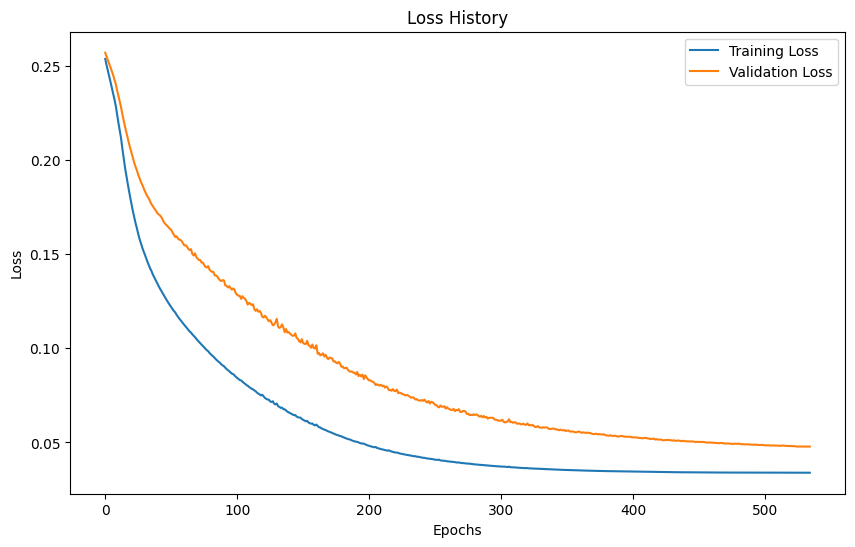

In [87]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from lib.data_loader import get_monks_dataset

# ============================
# Activation functions and their derivatives
# ============================

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(z, a):
    # Note: z is not used here; kept for uniform signature.
    return a * (1 - a)

def relu(x):
    return np.maximum(0, x)

def relu_derivative(z, a):
    return (z > 0).astype(float)

def linear(x):
    return x

def linear_derivative(z, a):
    return np.ones_like(a)

activation_functions = {
    "sigmoid": sigmoid,
    "relu": relu,
    "linear": linear
}

activation_derivatives = {
    "sigmoid": lambda z, a: sigmoid_derivative(z, a),
    "relu": lambda z, a: relu_derivative(z, a),
    "linear": lambda z, a: linear_derivative(z, a)
}

# ============================
# Loss functions and their derivatives
# ============================

def binary_crossentropy_loss(y_true, y_pred):
    """
    Binary crossentropy loss for binary classification.
    """
    epsilon = 1e-8
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

def binary_crossentropy_derivative(y_true, y_pred):
    """
    Derivative of the binary crossentropy loss.
    """
    epsilon = 1e-8
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return - (y_true / y_pred) + ((1 - y_true) / (1 - y_pred))

def mse_loss(y_true, y_pred):
    """
    Mean Squared Error (MSE) loss, typically used for regression.
    """
    return np.mean((y_true - y_pred) ** 2)

def mse_derivative(y_true, y_pred):
    """
    Derivative of the MSE loss.
    """
    return 2 * (y_pred - y_true)

def mee_loss(y_true, y_pred):
    """
    Mean Euclidean Error (MEE) loss, defined as:
        E_MEE = (1/N) * sum over i [ ||y_true[i] - y_pred[i]||_2 ].
    """
    diff = y_true - y_pred  # shape: (N, d) or (N, 1)
    # Euclidean distance for each sample
    dist = np.sqrt(np.sum(diff ** 2, axis=1))
    return np.mean(dist)

def mee_derivative(y_true, y_pred):
    """
    Derivative of the Mean Euclidean Error (MEE) loss.
    For each sample i, derivative wrt y_pred[i] is:
        (1/N) * ( (y_pred[i] - y_true[i]) / ||y_pred[i] - y_true[i]||_2 ).
    We safely handle the case where the norm is zero.
    """
    diff = y_pred - y_true
    dist = np.sqrt(np.sum(diff ** 2, axis=1, keepdims=True))
    epsilon = 1e-8  # Avoid division by zero
    dist_safe = np.where(dist == 0, epsilon, dist)
    N = y_true.shape[0]
    derivative = diff / dist_safe / N
    return derivative

loss_functions = {
    "binary_crossentropy": binary_crossentropy_loss,
    "mse": mse_loss,
    "mee": mee_loss,  
}

loss_derivatives = {
    "binary_crossentropy": binary_crossentropy_derivative,
    "mse": mse_derivative,
    "mee": mee_derivative, 
}

# ============================
# Regularization functions (modular)
# ============================

def compute_reg_gradient(W, lambda_reg, reg_type, m):
    if reg_type == "l2":
        return lambda_reg * W / m
    elif reg_type == "l1":
        return lambda_reg * np.sign(W) / m
    else:
        return 0

def compute_reg_loss(W_list, lambda_reg, reg_type):
    if reg_type == "l2":
        return (lambda_reg / 2) * sum(np.sum(W ** 2) for W in W_list)
    elif reg_type == "l1":
        return lambda_reg * sum(np.sum(np.abs(W)) for W in W_list)
    else:
        return 0

# ============================
# Neural Network Class with Learning Rate Decay, Momentum, Custom Weight Initialization, and Early Stopping
# ============================

class NeuralNetwork:
    def __init__(self, layers, learning_rate=0.01, lambda_reg=0.001, reg_type="l2",
                 loss_function_name=None,
                 activation_function_name="relu",
                 output_activation_function_name=None,
                 activation_function_names=None,
                 task="classification",
                 lr_decay_type="none",  # Options: "none", "exponential", "linear"
                 decay_rate=0.0,
                 weight_init="base",  # "base" (fan-in scaling) or "glorot"
                 momentum_type="none",  # Options: "none", "momentum", "nesterov momentum"
                 momentum_alpha=0.9):
        """
        :param layers: List containing the size of each layer (input, hidden, output)
        :param learning_rate: Initial learning rate
        :param lambda_reg: Regularization coefficient
        :param reg_type: Type of regularization ("l2", "l1", or other for none)
        :param loss_function_name: Name of the loss function (if None, set based on task)
        :param activation_function_name: Activation to use for hidden layers (if activation_function_names not provided)
        :param output_activation_function_name: Activation for the output layer (if None, set based on task)
        :param activation_function_names: List of activation function names for each layer (length = len(layers)-1)
        :param task: "classification" or "regression"
        :param lr_decay_type: Learning rate decay strategy ("none", "exponential", "linear")
        :param decay_rate: Decay rate used in the learning rate schedule
        :param weight_init: Weight initialization strategy ("base" uses fan-in scaling or "glorot")
        :param momentum_type: Momentum strategy ("none", "momentum", "nesterov momentum")
        :param momentum_alpha: Momentum coefficient (e.g., 0.9)
        """
        self.layers = layers
        self.initial_learning_rate = learning_rate
        self.learning_rate = learning_rate
        self.lambda_reg = lambda_reg
        self.reg_type = reg_type
        self.task = task
        self.lr_decay_type = lr_decay_type
        self.decay_rate = decay_rate
        self.weight_init = weight_init
        
        # Set momentum parameters
        if momentum_type not in {"none", "momentum", "nesterov momentum"}:
            raise ValueError("momentum_type must be 'none', 'momentum', or 'nesterov momentum'.")
        self.momentum_type = momentum_type
        self.momentum_alpha = momentum_alpha if momentum_type != "none" else 0.0
        
        # Set defaults based on task
        if self.task == "regression":
            self.loss_function_name = loss_function_name or "mse"
            output_activation_function_name = output_activation_function_name or "linear"
        else:
            # Classification
            self.loss_function_name = loss_function_name or "binary_crossentropy"
            output_activation_function_name = output_activation_function_name or "sigmoid"
        
        # Set activation functions for layers
        if activation_function_names is None:
            self.activation_function_names = [activation_function_name] * (len(layers) - 1)
            self.activation_function_names[-1] = output_activation_function_name
        else:
            if len(activation_function_names) != len(layers) - 1:
                raise ValueError("activation_function_names must have length equal to len(layers)-1.")
            self.activation_function_names = activation_function_names
        
        self._initialize_parameters()
        # Initialize momentum accumulators (even if not used, for consistency)
        self.vW = [np.zeros_like(W) for W in self.W]
        self.vb = [np.zeros_like(b) for b in self.b]
        
        # Initialize loss history lists (will be (re)initialized in train())
        self.train_loss_history = []
        self.val_loss_history = None

    def _initialize_parameters(self):
        self.W = []
        self.b = []
        np.random.seed(42)
        for i in range(len(self.layers) - 1):
            fan_in = self.layers[i]
            fan_out = self.layers[i + 1]
            if self.weight_init == "base":
                std = np.sqrt(1.0 / fan_in)
            elif self.weight_init == "glorot":
                std = np.sqrt(2.0 / (fan_in + fan_out))
            else:
                raise ValueError("Unsupported weight initialization strategy. Use 'base' or 'glorot'.")
            weight = np.random.randn(fan_in, fan_out) * std
            self.W.append(weight)
            self.b.append(np.zeros((1, fan_out)))
    
    def _apply_activation(self, x, func_name):
        if func_name not in activation_functions:
            raise ValueError(f"Unsupported activation: {func_name}")
        return activation_functions[func_name](x)
    
    def _apply_activation_derivative(self, z, a, func_name):
        if func_name not in activation_derivatives:
            raise ValueError(f"Unsupported activation derivative: {func_name}")
        return activation_derivatives[func_name](z, a)
    
    def _forward(self, X, weights=None, biases=None):
        """
        Forward propagation. If weights and biases are provided, they are used;
        otherwise the network's parameters are used.
        Returns lists Z (pre-activations) and A (activations).
        """
        if weights is None:
            weights = self.W
        if biases is None:
            biases = self.b
            
        A = [X]
        Z = []
        # Forward through hidden layers
        for i in range(len(weights) - 1):
            z_curr = np.dot(A[-1], weights[i]) + biases[i]
            Z.append(z_curr)
            a_curr = self._apply_activation(z_curr, self.activation_function_names[i])
            A.append(a_curr)
        # Forward through output layer
        z_out = np.dot(A[-1], weights[-1]) + biases[-1]
        Z.append(z_out)
        a_out = self._apply_activation(z_out, self.activation_function_names[-1])
        A.append(a_out)
        return Z, A
    
    def _compute_gradients(self, X, y, Z, A, weights=None):
        """
        Compute gradients dW and db given inputs X, target y, pre-activations Z and activations A.
        Optionally, a custom set of weights (used in lookahead for Nesterov momentum) can be provided.
        Returns lists dW and db.
        """
        if weights is None:
            weights = self.W
        m = X.shape[0]
        dA = loss_derivatives[self.loss_function_name](y, A[-1])
        # Output layer
        dZ = dA * self._apply_activation_derivative(Z[-1], A[-1], self.activation_function_names[-1])
        reg_term = compute_reg_gradient(weights[-1], self.lambda_reg, self.reg_type, m)
        dW = [np.dot(A[-2].T, dZ) / m + reg_term]
        db = [np.sum(dZ, axis=0, keepdims=True) / m]
        
        # Backpropagate through hidden layers
        for i in range(len(weights) - 2, -1, -1):
            dA = np.dot(dZ, weights[i + 1].T)
            dZ = dA * self._apply_activation_derivative(Z[i], A[i + 1], self.activation_function_names[i])
            reg_term = compute_reg_gradient(weights[i], self.lambda_reg, self.reg_type, m)
            dW.insert(0, np.dot(A[i].T, dZ) / m + reg_term)
            db.insert(0, np.sum(dZ, axis=0, keepdims=True) / m)
            
        return dW, db
    
    def train(self, X, y, epochs=300, batch_size=32, verbose=True,
              early_stopping=False, validation_data=None, patience=10, min_delta=0.0):
        """
        Train the neural network.

        The loss histories for training and validation (if provided) are stored in:
            self.train_loss_history and self.val_loss_history

        :param X: Training data inputs.
        :param y: Training data targets.
        :param epochs: Maximum number of epochs to train.
        :param batch_size: Mini-batch size.
        :param verbose: Whether to print progress.
        :param early_stopping: Enable early stopping if True.
        :param validation_data: Tuple (X_val, y_val) for early stopping and validation loss logging.
        :param patience: Number of epochs with no improvement to wait before stopping.
        :param min_delta: Minimum change in the monitored loss to qualify as an improvement.
        """
        # Reinitialize loss histories
        self.train_loss_history = []
        if validation_data is not None:
            self.val_loss_history = []
        else:
            self.val_loss_history = None

        n_samples = X.shape[0]
        best_loss = np.inf
        patience_counter = 0
        best_weights = None
        best_biases = None

        for epoch in range(epochs):
            # Update learning rate based on decay schedule
            if self.lr_decay_type == "exponential":
                self.learning_rate = self.initial_learning_rate * np.exp(-self.decay_rate * epoch)
            elif self.lr_decay_type == "linear":
                self.learning_rate = self.initial_learning_rate * max(0, 1 - self.decay_rate * epoch)
            # Otherwise ("none"), keep the initial learning rate.
            
            # Shuffle training data
            permutation = np.random.permutation(n_samples)
            X_shuffled = X[permutation]
            y_shuffled = y[permutation]
            
            # Process mini-batches
            for i in range(0, n_samples, batch_size):
                X_batch = X_shuffled[i:i + batch_size]
                y_batch = y_shuffled[i:i + batch_size]
                
                if self.momentum_type == "nesterov momentum":
                    weights_lookahead = [self.W[j] - self.momentum_alpha * self.vW[j] for j in range(len(self.W))]
                    biases_lookahead = [self.b[j] - self.momentum_alpha * self.vb[j] for j in range(len(self.b))]
                    Z, A = self._forward(X_batch, weights=weights_lookahead, biases=biases_lookahead)
                    dW, db = self._compute_gradients(X_batch, y_batch, Z, A, weights=weights_lookahead)
                    for j in range(len(self.W)):
                        self.vW[j] = self.momentum_alpha * self.vW[j] + self.learning_rate * dW[j]
                        self.vb[j] = self.momentum_alpha * self.vb[j] + self.learning_rate * db[j]
                        self.W[j] -= self.vW[j]
                        self.b[j] -= self.vb[j]
                        
                elif self.momentum_type == "momentum":
                    Z, A = self._forward(X_batch)
                    dW, db = self._compute_gradients(X_batch, y_batch, Z, A)
                    for j in range(len(self.W)):
                        self.vW[j] = self.momentum_alpha * self.vW[j] + self.learning_rate * dW[j]
                        self.vb[j] = self.momentum_alpha * self.vb[j] + self.learning_rate * db[j]
                        self.W[j] -= self.vW[j]
                        self.b[j] -= self.vb[j]
                        
                else:  # No momentum
                    Z, A = self._forward(X_batch)
                    dW, db = self._compute_gradients(X_batch, y_batch, Z, A)
                    for j in range(len(self.W)):
                        self.W[j] -= self.learning_rate * dW[j]
                        self.b[j] -= self.learning_rate * db[j]
            
            # Compute training loss
            _, A_full = self._forward(X)
            train_loss = loss_functions[self.loss_function_name](y, A_full[-1])
            reg_loss = compute_reg_loss(self.W, self.lambda_reg, self.reg_type)
            total_train_loss = train_loss + reg_loss
            self.train_loss_history.append(total_train_loss)
            
            # Compute validation loss if validation data is provided
            if validation_data is not None:
                X_val, y_val = validation_data
                _, A_val = self._forward(X_val)
                val_loss = loss_functions[self.loss_function_name](y_val, A_val[-1])
                reg_loss_val = compute_reg_loss(self.W, self.lambda_reg, self.reg_type)
                total_val_loss = val_loss + reg_loss_val
                self.val_loss_history.append(total_val_loss)
            else:
                total_val_loss = None

            # Verbose logging
            if verbose:
                if total_val_loss is not None:
                    print(f"Epoch {epoch:4d}, Training Loss: {total_train_loss:.4f}, "
                          f"Validation Loss: {total_val_loss:.4f}, Learning Rate: {self.learning_rate:.6f}")
                else:
                    print(f"Epoch {epoch:4d}, Training Loss: {total_train_loss:.4f}, "
                          f"Learning Rate: {self.learning_rate:.6f}")
            
            # Early stopping check (only if validation data is provided)
            if early_stopping and (validation_data is not None):
                if total_val_loss < best_loss - min_delta:
                    best_loss = total_val_loss
                    patience_counter = 0
                    best_weights = [w.copy() for w in self.W]
                    best_biases = [b.copy() for b in self.b]
                else:
                    patience_counter += 1
                    if patience_counter >= patience:
                        if verbose:
                            print(f"Early stopping triggered at epoch {epoch}. Restoring best model parameters.")
                        if best_weights is not None:
                            self.W = best_weights
                            self.b = best_biases
                        break

    def plot_loss_history(self):
        """
        Plot the training loss history and, if available, the validation loss history.
        """
        plt.figure(figsize=(10, 6))
        plt.plot(self.train_loss_history, label="Training Loss")
        if self.val_loss_history is not None and len(self.val_loss_history) > 0:
            plt.plot(self.val_loss_history, label="Validation Loss")
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.title("Loss History")
        plt.legend()
        plt.show()
    
    def predict(self, X):
        _, A = self._forward(X)
        output = A[-1]
        if self.task == "classification":
            if output.shape[1] == 1:
                return (output > 0.5).astype(int)
            else:
                return np.argmax(output, axis=1)
        else:
            return output
    
    def evaluate(self, X, y):
        predictions = self.predict(X)
        if self.task == "regression":
            return mse_loss(y, predictions)
        else:
            if y.ndim > 1 and y.shape[1] > 1:
                y_true = np.argmax(y, axis=1)
            else:
                y_true = y
            return np.mean(predictions == y_true)

# ============================
# Testing on a monk's dataset
# ============================

X_train, y_train, X_test, y_test = get_monks_dataset(1, one_hot_encode=True)

input_size = X_train.shape[1]
hidden_units = 10
output_size = 1  # binary classification
layers = [input_size, hidden_units, output_size]

# Define activation functions for hidden and output layers
activation_funcs = ["relu", "sigmoid"]

nn_clf = NeuralNetwork(
    layers=layers,
    learning_rate=0.2,
    lambda_reg=0.001,
    reg_type="l2",
    loss_function_name="mse",       
    activation_function_names=activation_funcs,
    task="classification",
    lr_decay_type="linear",    # Options: "exponential", "linear", or "none"
    decay_rate=0.001,
    weight_init="base",        # "base" or "glorot"
)

# For early stopping, we provide validation data.
nn_clf.train(
    X_train, y_train,
    epochs=1000,
    batch_size=32,
    verbose=True,
    early_stopping=True,
    validation_data=(X_test, y_test),
    patience=10,
    min_delta=1e-4
)

accuracy = nn_clf.evaluate(X_test, y_test)
print(f"\nNeural Network Classification Accuracy: {accuracy:.4f}")

# Plot the loss histories
nn_clf.plot_loss_history()

Using cached ../datasets/monks/monk-1-train.csv
Using cached ../datasets/monks/monk-1-test.csv
One-hot encoding MONK-1 dataset...
Epoch    0, Training Loss: 0.2537, Validation Loss: 0.2570, Learning Rate: 0.200000
Epoch    1, Training Loss: 0.2504, Validation Loss: 0.2549, Learning Rate: 0.199800
Epoch    2, Training Loss: 0.2473, Validation Loss: 0.2529, Learning Rate: 0.199600
Epoch    3, Training Loss: 0.2444, Validation Loss: 0.2511, Learning Rate: 0.199400
Epoch    4, Training Loss: 0.2416, Validation Loss: 0.2493, Learning Rate: 0.199200
Epoch    5, Training Loss: 0.2386, Validation Loss: 0.2474, Learning Rate: 0.199000
Epoch    6, Training Loss: 0.2355, Validation Loss: 0.2453, Learning Rate: 0.198800
Epoch    7, Training Loss: 0.2324, Validation Loss: 0.2430, Learning Rate: 0.198600
Epoch    8, Training Loss: 0.2291, Validation Loss: 0.2407, Learning Rate: 0.198400
Epoch    9, Training Loss: 0.2251, Validation Loss: 0.2380, Learning Rate: 0.198200
Epoch   10, Training Loss: 0.2

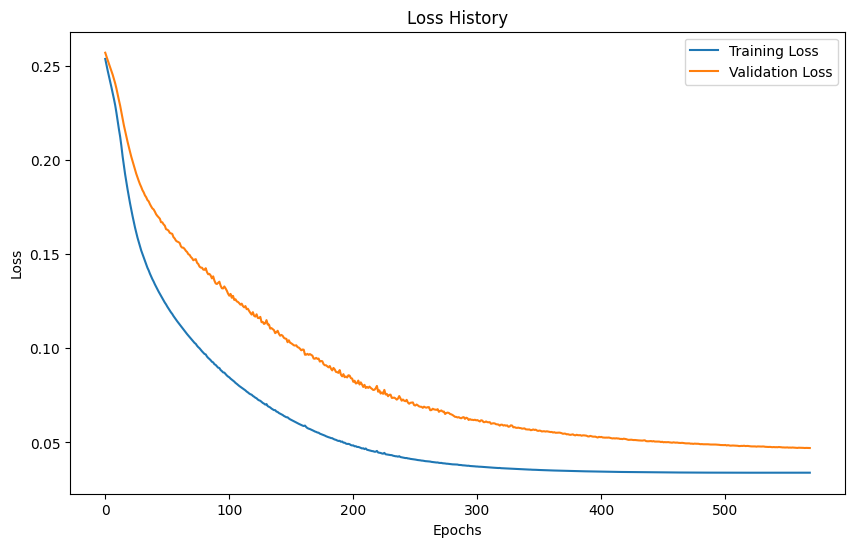


Fold 1/5
Fold 1 Evaluation Metric: 0.8800

Fold 2/5
Fold 2 Evaluation Metric: 0.7600

Fold 3/5
Fold 3 Evaluation Metric: 0.8400

Fold 4/5
Fold 4 Evaluation Metric: 0.8000

Fold 5/5
Fold 5 Evaluation Metric: 0.9583

Average Evaluation Metric over 5 folds: 0.8477

K-fold Cross-Validation Results:
{'fold_metrics': [np.float64(0.88), np.float64(0.76), np.float64(0.84), np.float64(0.8), np.float64(0.9583333333333334)], 'average_metric': np.float64(0.8476666666666667)}


In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold  # Added dependency for K-fold CV

from lib.data_loader import get_monks_dataset

# ============================
# Activation functions and their derivatives
# ============================

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(z, a):
    # Note: z is not used here; kept for uniform signature.
    return a * (1 - a)

def relu(x):
    return np.maximum(0, x)

def relu_derivative(z, a):
    return (z > 0).astype(float)

def linear(x):
    return x

def linear_derivative(z, a):
    return np.ones_like(a)

activation_functions = {
    "sigmoid": sigmoid,
    "relu": relu,
    "linear": linear
}

activation_derivatives = {
    "sigmoid": lambda z, a: sigmoid_derivative(z, a),
    "relu": lambda z, a: relu_derivative(z, a),
    "linear": lambda z, a: linear_derivative(z, a)
}

# ============================
# Loss functions and their derivatives
# ============================

def binary_crossentropy_loss(y_true, y_pred):
    """
    Binary crossentropy loss for binary classification.
    """
    epsilon = 1e-8
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

def binary_crossentropy_derivative(y_true, y_pred):
    """
    Derivative of the binary crossentropy loss.
    """
    epsilon = 1e-8
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return - (y_true / y_pred) + ((1 - y_true) / (1 - y_pred))

def mse_loss(y_true, y_pred):
    """
    Mean Squared Error (MSE) loss, typically used for regression.
    """
    return np.mean((y_true - y_pred) ** 2)

def mse_derivative(y_true, y_pred):
    """
    Derivative of the MSE loss.
    """
    return 2 * (y_pred - y_true)

def mee_loss(y_true, y_pred):
    """
    Mean Euclidean Error (MEE) loss, defined as:
        E_MEE = (1/N) * sum over i [ ||y_true[i] - y_pred[i]||_2 ].
    """
    diff = y_true - y_pred  # shape: (N, d) or (N, 1)
    # Euclidean distance for each sample
    dist = np.sqrt(np.sum(diff ** 2, axis=1))
    return np.mean(dist)

def mee_derivative(y_true, y_pred):
    """
    Derivative of the Mean Euclidean Error (MEE) loss.
    For each sample i, derivative wrt y_pred[i] is:
        (1/N) * ( (y_pred[i] - y_true[i]) / ||y_pred[i] - y_true[i]||_2 ).
    We safely handle the case where the norm is zero.
    """
    diff = y_pred - y_true
    dist = np.sqrt(np.sum(diff ** 2, axis=1, keepdims=True))
    epsilon = 1e-8  # Avoid division by zero
    dist_safe = np.where(dist == 0, epsilon, dist)
    N = y_true.shape[0]
    derivative = diff / dist_safe / N
    return derivative

loss_functions = {
    "binary_crossentropy": binary_crossentropy_loss,
    "mse": mse_loss,
    "mee": mee_loss,  
}

loss_derivatives = {
    "binary_crossentropy": binary_crossentropy_derivative,
    "mse": mse_derivative,
    "mee": mee_derivative, 
}

# ============================
# Regularization functions (modular)
# ============================

def compute_reg_gradient(W, lambda_reg, reg_type, m):
    if reg_type == "l2":
        return lambda_reg * W / m
    elif reg_type == "l1":
        return lambda_reg * np.sign(W) / m
    else:
        return 0

def compute_reg_loss(W_list, lambda_reg, reg_type):
    if reg_type == "l2":
        return (lambda_reg / 2) * sum(np.sum(W ** 2) for W in W_list)
    elif reg_type == "l1":
        return lambda_reg * sum(np.sum(np.abs(W)) for W in W_list)
    else:
        return 0

# ============================
# Neural Network Class with Learning Rate Decay, Momentum, Custom Weight Initialization, and Early Stopping
# ============================

class NeuralNetwork:
    def __init__(self, layers, learning_rate=0.01, lambda_reg=0.001, reg_type="l2",
                 loss_function_name=None,
                 activation_function_name="relu",
                 output_activation_function_name=None,
                 activation_function_names=None,
                 task="classification",
                 lr_decay_type="none",  # Options: "none", "exponential", "linear"
                 decay_rate=0.0,
                 weight_init="base",  # "base" (fan-in scaling) or "glorot"
                 momentum_type="none",  # Options: "none", "momentum", "nesterov momentum"
                 momentum_alpha=0.9):
        """
        :param layers: List containing the size of each layer (input, hidden, output)
        :param learning_rate: Initial learning rate
        :param lambda_reg: Regularization coefficient
        :param reg_type: Type of regularization ("l2", "l1", or other for none)
        :param loss_function_name: Name of the loss function (if None, set based on task)
        :param activation_function_name: Activation to use for hidden layers (if activation_function_names not provided)
        :param output_activation_function_name: Activation for the output layer (if None, set based on task)
        :param activation_function_names: List of activation function names for each layer (length = len(layers)-1)
        :param task: "classification" or "regression"
        :param lr_decay_type: Learning rate decay strategy ("none", "exponential", "linear")
        :param decay_rate: Decay rate used in the learning rate schedule
        :param weight_init: Weight initialization strategy ("base" uses fan-in scaling or "glorot")
        :param momentum_type: Momentum strategy ("none", "momentum", "nesterov momentum")
        :param momentum_alpha: Momentum coefficient (e.g., 0.9)
        """
        self.layers = layers
        self.initial_learning_rate = learning_rate
        self.learning_rate = learning_rate
        self.lambda_reg = lambda_reg
        self.reg_type = reg_type
        self.task = task
        self.lr_decay_type = lr_decay_type
        self.decay_rate = decay_rate
        self.weight_init = weight_init
        
        # Set momentum parameters
        if momentum_type not in {"none", "momentum", "nesterov momentum"}:
            raise ValueError("momentum_type must be 'none', 'momentum', or 'nesterov momentum'.")
        self.momentum_type = momentum_type
        self.momentum_alpha = momentum_alpha if momentum_type != "none" else 0.0
        
        # Set defaults based on task
        if self.task == "regression":
            self.loss_function_name = loss_function_name or "mse"
            output_activation_function_name = output_activation_function_name or "linear"
        else:
            # Classification
            self.loss_function_name = loss_function_name or "binary_crossentropy"
            output_activation_function_name = output_activation_function_name or "sigmoid"
        
        # Set activation functions for layers
        if activation_function_names is None:
            self.activation_function_names = [activation_function_name] * (len(layers) - 1)
            self.activation_function_names[-1] = output_activation_function_name
        else:
            if len(activation_function_names) != len(layers) - 1:
                raise ValueError("activation_function_names must have length equal to len(layers)-1.")
            self.activation_function_names = activation_function_names
        
        self._initialize_parameters()
        # Initialize momentum accumulators (even if not used, for consistency)
        self.vW = [np.zeros_like(W) for W in self.W]
        self.vb = [np.zeros_like(b) for b in self.b]
        
        # Initialize loss history lists (will be (re)initialized in train())
        self.train_loss_history = []
        self.val_loss_history = None

    def _initialize_parameters(self):
        self.W = []
        self.b = []
        np.random.seed(42)
        for i in range(len(self.layers) - 1):
            fan_in = self.layers[i]
            fan_out = self.layers[i + 1]
            if self.weight_init == "base":
                std = np.sqrt(1.0 / fan_in)
            elif self.weight_init == "glorot":
                std = np.sqrt(2.0 / (fan_in + fan_out))
            else:
                raise ValueError("Unsupported weight initialization strategy. Use 'base' or 'glorot'.")
            weight = np.random.randn(fan_in, fan_out) * std
            self.W.append(weight)
            self.b.append(np.zeros((1, fan_out)))
    
    def _apply_activation(self, x, func_name):
        if func_name not in activation_functions:
            raise ValueError(f"Unsupported activation: {func_name}")
        return activation_functions[func_name](x)
    
    def _apply_activation_derivative(self, z, a, func_name):
        if func_name not in activation_derivatives:
            raise ValueError(f"Unsupported activation derivative: {func_name}")
        return activation_derivatives[func_name](z, a)
    
    def _forward(self, X, weights=None, biases=None):
        """
        Forward propagation. If weights and biases are provided, they are used;
        otherwise the network's parameters are used.
        Returns lists Z (pre-activations) and A (activations).
        """
        if weights is None:
            weights = self.W
        if biases is None:
            biases = self.b
            
        A = [X]
        Z = []
        # Forward through hidden layers
        for i in range(len(weights) - 1):
            z_curr = np.dot(A[-1], weights[i]) + biases[i]
            Z.append(z_curr)
            a_curr = self._apply_activation(z_curr, self.activation_function_names[i])
            A.append(a_curr)
        # Forward through output layer
        z_out = np.dot(A[-1], weights[-1]) + biases[-1]
        Z.append(z_out)
        a_out = self._apply_activation(z_out, self.activation_function_names[-1])
        A.append(a_out)
        return Z, A
    
    def _compute_gradients(self, X, y, Z, A, weights=None):
        """
        Compute gradients dW and db given inputs X, target y, pre-activations Z and activations A.
        Optionally, a custom set of weights (used in lookahead for Nesterov momentum) can be provided.
        Returns lists dW and db.
        """
        if weights is None:
            weights = self.W
        m = X.shape[0]
        dA = loss_derivatives[self.loss_function_name](y, A[-1])
        # Output layer
        dZ = dA * self._apply_activation_derivative(Z[-1], A[-1], self.activation_function_names[-1])
        reg_term = compute_reg_gradient(weights[-1], self.lambda_reg, self.reg_type, m)
        dW = [np.dot(A[-2].T, dZ) / m + reg_term]
        db = [np.sum(dZ, axis=0, keepdims=True) / m]
        
        # Backpropagate through hidden layers
        for i in range(len(weights) - 2, -1, -1):
            dA = np.dot(dZ, weights[i + 1].T)
            dZ = dA * self._apply_activation_derivative(Z[i], A[i + 1], self.activation_function_names[i])
            reg_term = compute_reg_gradient(weights[i], self.lambda_reg, self.reg_type, m)
            dW.insert(0, np.dot(A[i].T, dZ) / m + reg_term)
            db.insert(0, np.sum(dZ, axis=0, keepdims=True) / m)
            
        return dW, db
    
    def train(self, X, y, epochs=300, batch_size=32, verbose=True,
              early_stopping=False, validation_data=None, patience=10, min_delta=0.0):
        """
        Train the neural network.

        The loss histories for training and validation (if provided) are stored in:
            self.train_loss_history and self.val_loss_history

        :param X: Training data inputs.
        :param y: Training data targets.
        :param epochs: Maximum number of epochs to train.
        :param batch_size: Mini-batch size.
        :param verbose: Whether to print progress.
        :param early_stopping: Enable early stopping if True.
        :param validation_data: Tuple (X_val, y_val) for early stopping and validation loss logging.
        :param patience: Number of epochs with no improvement to wait before stopping.
        :param min_delta: Minimum change in the monitored loss to qualify as an improvement.
        """
        # Reinitialize loss histories
        self.train_loss_history = []
        if validation_data is not None:
            self.val_loss_history = []
        else:
            self.val_loss_history = None

        n_samples = X.shape[0]
        best_loss = np.inf
        patience_counter = 0
        best_weights = None
        best_biases = None

        for epoch in range(epochs):
            # Update learning rate based on decay schedule
            if self.lr_decay_type == "exponential":
                self.learning_rate = self.initial_learning_rate * np.exp(-self.decay_rate * epoch)
            elif self.lr_decay_type == "linear":
                self.learning_rate = self.initial_learning_rate * max(0, 1 - self.decay_rate * epoch)
            # Otherwise ("none"), keep the initial learning rate.
            
            # Shuffle training data
            permutation = np.random.permutation(n_samples)
            X_shuffled = X[permutation]
            y_shuffled = y[permutation]
            
            # Process mini-batches
            for i in range(0, n_samples, batch_size):
                X_batch = X_shuffled[i:i + batch_size]
                y_batch = y_shuffled[i:i + batch_size]
                
                if self.momentum_type == "nesterov momentum":
                    weights_lookahead = [self.W[j] - self.momentum_alpha * self.vW[j] for j in range(len(self.W))]
                    biases_lookahead = [self.b[j] - self.momentum_alpha * self.vb[j] for j in range(len(self.b))]
                    Z, A = self._forward(X_batch, weights=weights_lookahead, biases=biases_lookahead)
                    dW, db = self._compute_gradients(X_batch, y_batch, Z, A, weights=weights_lookahead)
                    for j in range(len(self.W)):
                        self.vW[j] = self.momentum_alpha * self.vW[j] + self.learning_rate * dW[j]
                        self.vb[j] = self.momentum_alpha * self.vb[j] + self.learning_rate * db[j]
                        self.W[j] -= self.vW[j]
                        self.b[j] -= self.vb[j]
                        
                elif self.momentum_type == "momentum":
                    Z, A = self._forward(X_batch)
                    dW, db = self._compute_gradients(X_batch, y_batch, Z, A)
                    for j in range(len(self.W)):
                        self.vW[j] = self.momentum_alpha * self.vW[j] + self.learning_rate * dW[j]
                        self.vb[j] = self.momentum_alpha * self.vb[j] + self.learning_rate * db[j]
                        self.W[j] -= self.vW[j]
                        self.b[j] -= self.vb[j]
                        
                else:  # No momentum
                    Z, A = self._forward(X_batch)
                    dW, db = self._compute_gradients(X_batch, y_batch, Z, A)
                    for j in range(len(self.W)):
                        self.W[j] -= self.learning_rate * dW[j]
                        self.b[j] -= self.learning_rate * db[j]
            
            # Compute training loss
            _, A_full = self._forward(X)
            train_loss = loss_functions[self.loss_function_name](y, A_full[-1])
            reg_loss = compute_reg_loss(self.W, self.lambda_reg, self.reg_type)
            total_train_loss = train_loss + reg_loss
            self.train_loss_history.append(total_train_loss)
            
            # Compute validation loss if validation data is provided
            if validation_data is not None:
                X_val, y_val = validation_data
                _, A_val = self._forward(X_val)
                val_loss = loss_functions[self.loss_function_name](y_val, A_val[-1])
                reg_loss_val = compute_reg_loss(self.W, self.lambda_reg, self.reg_type)
                total_val_loss = val_loss + reg_loss_val
                self.val_loss_history.append(total_val_loss)
            else:
                total_val_loss = None

            # Verbose logging
            if verbose:
                if total_val_loss is not None:
                    print(f"Epoch {epoch:4d}, Training Loss: {total_train_loss:.4f}, "
                          f"Validation Loss: {total_val_loss:.4f}, Learning Rate: {self.learning_rate:.6f}")
                else:
                    print(f"Epoch {epoch:4d}, Training Loss: {total_train_loss:.4f}, "
                          f"Learning Rate: {self.learning_rate:.6f}")
            
            # Early stopping check (only if validation data is provided)
            if early_stopping and (validation_data is not None):
                if total_val_loss < best_loss - min_delta:
                    best_loss = total_val_loss
                    patience_counter = 0
                    best_weights = [w.copy() for w in self.W]
                    best_biases = [b.copy() for b in self.b]
                else:
                    patience_counter += 1
                    if patience_counter >= patience:
                        if verbose:
                            print(f"Early stopping triggered at epoch {epoch}. Restoring best model parameters.")
                        if best_weights is not None:
                            self.W = best_weights
                            self.b = best_biases
                        break

    def plot_loss_history(self):
        """
        Plot the training loss history and, if available, the validation loss history.
        """
        plt.figure(figsize=(10, 6))
        plt.plot(self.train_loss_history, label="Training Loss")
        if self.val_loss_history is not None and len(self.val_loss_history) > 0:
            plt.plot(self.val_loss_history, label="Validation Loss")
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.title("Loss History")
        plt.legend()
        plt.show()
    
    def predict(self, X):
        _, A = self._forward(X)
        output = A[-1]
        if self.task == "classification":
            if output.shape[1] == 1:
                return (output > 0.5).astype(int)
            else:
                return np.argmax(output, axis=1)
        else:
            return output
    
    def evaluate(self, X, y):
        predictions = self.predict(X)
        if self.task == "regression":
            return mse_loss(y, predictions)
        else:
            if y.ndim > 1 and y.shape[1] > 1:
                y_true = np.argmax(y, axis=1)
            else:
                y_true = y
            return np.mean(predictions == y_true)

# ============================
# K-fold Cross-Validation Function
# ============================

def k_fold_cross_validation(model_builder, X, y, k=5, epochs=1000, batch_size=32,
                            verbose=True, early_stopping=False, patience=10, min_delta=1e-4):
    """
    Perform k-fold cross validation for a neural network.
    
    :param model_builder: A callable that returns a new instance of NeuralNetwork.
    :param X: Input features.
    :param y: Targets.
    :param k: Number of folds.
    :param epochs: Number of training epochs per fold.
    :param batch_size: Batch size.
    :param verbose: Verbosity flag.
    :param early_stopping: Whether to use early stopping.
    :param patience: Patience for early stopping.
    :param min_delta: Minimum change in loss for early stopping.
    :return: Dictionary containing per-fold metrics and the overall average metric.
    """
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    fold_metrics = []
    fold = 1
    for train_index, val_index in kf.split(X):
        print(f"\nFold {fold}/{k}")
        X_train_fold, X_val_fold = X[train_index], X[val_index]
        y_train_fold, y_val_fold = y[train_index], y[val_index]
        
        # Build a new model instance for this fold
        nn_model = model_builder()
        
        # Train the model on the training fold with validation on the fold's validation set.
        nn_model.train(
            X_train_fold, y_train_fold,
            epochs=epochs,
            batch_size=batch_size,
            verbose=verbose,
            early_stopping=early_stopping,
            validation_data=(X_val_fold, y_val_fold),
            patience=patience,
            min_delta=min_delta
        )
        
        # Evaluate the model on the validation fold.
        metric = nn_model.evaluate(X_val_fold, y_val_fold)
        print(f"Fold {fold} Evaluation Metric: {metric:.4f}")
        fold_metrics.append(metric)
        fold += 1
    
    avg_metric = np.mean(fold_metrics)
    print(f"\nAverage Evaluation Metric over {k} folds: {avg_metric:.4f}")
    return {"fold_metrics": fold_metrics, "average_metric": avg_metric}

# ============================
# Testing on a monk's dataset
# ============================

X_train, y_train, X_test, y_test = get_monks_dataset(1, one_hot_encode=True)

input_size = X_train.shape[1]
hidden_units = 10
output_size = 1  # binary classification
layers = [input_size, hidden_units, output_size]

# Define activation functions for hidden and output layers
activation_funcs = ["relu", "sigmoid"]

# Example: Build a neural network classifier instance
nn_clf = NeuralNetwork(
    layers=layers,
    learning_rate=0.2,
    lambda_reg=0.001,
    reg_type="l2",
    loss_function_name="mse",       
    activation_function_names=activation_funcs,
    task="classification",
    lr_decay_type="linear",    # Options: "exponential", "linear", or "none"
    decay_rate=0.001,
    weight_init="base",        # "base" or "glorot"
)

# For early stopping, we provide validation data.
nn_clf.train(
    X_train, y_train,
    epochs=1000,
    batch_size=32,
    verbose=True,
    early_stopping=True,
    validation_data=(X_test, y_test),
    patience=10,
    min_delta=1e-4
)

accuracy = nn_clf.evaluate(X_test, y_test)
print(f"\nNeural Network Classification Accuracy: {accuracy:.4f}")

# Plot the loss histories
nn_clf.plot_loss_history()

# ============================
# K-fold Cross-Validation Example
# ============================

def build_nn_model():
    """
    Returns a new instance of NeuralNetwork with the same configuration.
    This is used for each fold in cross validation.
    """
    return NeuralNetwork(
        layers=layers,
        learning_rate=0.2,
        lambda_reg=0.001,
        reg_type="l2",
        loss_function_name="mse",       
        activation_function_names=activation_funcs,
        task="classification",
        lr_decay_type="linear",    # Options: "exponential", "linear", or "none"
        decay_rate=0.001,
        weight_init="base",        # "base" or "glorot"
    )

# Perform 5-fold cross validation on the training set.
cv_results = k_fold_cross_validation(
    model_builder=build_nn_model,
    X=X_train,
    y=y_train,
    k=5,
    epochs=1000,
    batch_size=32,
    verbose=False,  # Set True to see per-epoch logging within each fold.
    early_stopping=True,
    patience=10,
    min_delta=1e-4
)

print("\nK-fold Cross-Validation Results:")
print(cv_results)


Using cached ../datasets/monks/monk-1-train.csv
Using cached ../datasets/monks/monk-1-test.csv
One-hot encoding MONK-1 dataset...
Epoch    0, Training Loss: 0.2536, Validation Loss: 0.2569, Learning Rate: 0.200000
Epoch    1, Training Loss: 0.2504, Validation Loss: 0.2549, Learning Rate: 0.199800
Epoch    2, Training Loss: 0.2474, Validation Loss: 0.2530, Learning Rate: 0.199600
Epoch    3, Training Loss: 0.2446, Validation Loss: 0.2512, Learning Rate: 0.199400
Epoch    4, Training Loss: 0.2416, Validation Loss: 0.2494, Learning Rate: 0.199200
Epoch    5, Training Loss: 0.2387, Validation Loss: 0.2475, Learning Rate: 0.199000
Epoch    6, Training Loss: 0.2356, Validation Loss: 0.2454, Learning Rate: 0.198800
Epoch    7, Training Loss: 0.2325, Validation Loss: 0.2432, Learning Rate: 0.198600
Epoch    8, Training Loss: 0.2293, Validation Loss: 0.2410, Learning Rate: 0.198400
Epoch    9, Training Loss: 0.2253, Validation Loss: 0.2382, Learning Rate: 0.198200
Epoch   10, Training Loss: 0.2

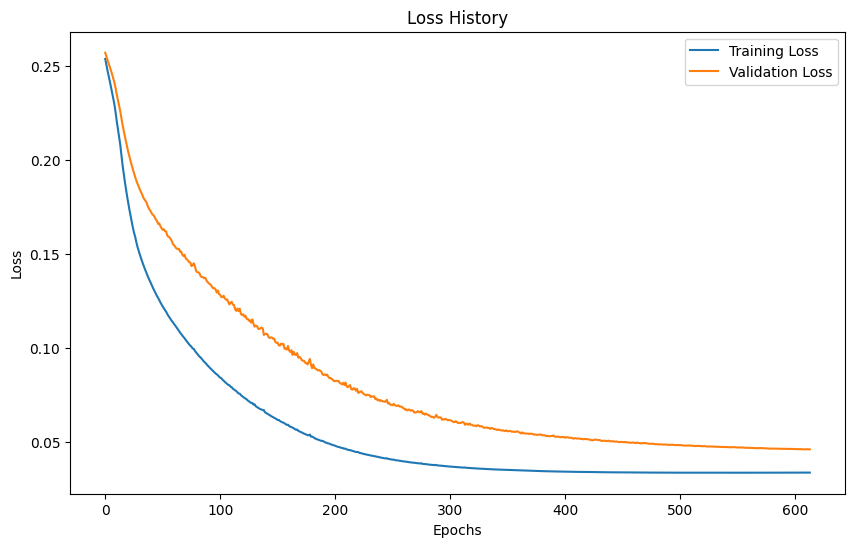


Fold 1/5
Fold 1 Evaluation Metric: 0.8400

Fold 2/5
Fold 2 Evaluation Metric: 0.9600

Fold 3/5
Fold 3 Evaluation Metric: 0.8000

Fold 4/5
Fold 4 Evaluation Metric: 0.8800

Fold 5/5
Fold 5 Evaluation Metric: 0.7500

Average Evaluation Metric over 5 folds: 0.8460

K-fold Cross-Validation Results:
{'fold_metrics': [np.float64(0.84), np.float64(0.96), np.float64(0.8), np.float64(0.88), np.float64(0.75)], 'average_metric': np.float64(0.8459999999999999)}

Fold 1/5

Fold 1/5

Fold 1/5

Fold 1/5

Fold 1/5
Fold 1 Evaluation Metric: 0.8400

Fold 2/5

Fold 1/5
Fold 1 Evaluation Metric: 0.8800

Fold 2/5

Fold 1/5
Fold 1 Evaluation Metric: 0.8400

Fold 2/5
Fold 1 Evaluation Metric: 0.8400

Fold 2/5
Fold 2 Evaluation Metric: 0.7600

Fold 3/5
Fold 2 Evaluation Metric: 0.8000

Fold 3/5

Fold 1/5

Fold 1/5
Fold 1 Evaluation Metric: 0.8400

Fold 2/5
Fold 2 Evaluation Metric: 0.7600

Fold 3/5
Fold 1 Evaluation Metric: 0.8400

Fold 2/5
Fold 1 Evaluation Metric: 0.8800

Fold 2/5
Fold 3 Evaluation Metric:

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, ParameterGrid  # Added ParameterGrid dependency
from joblib import Parallel, delayed  # For parallel grid search

from lib.data_loader import get_monks_dataset

# ============================
# Activation functions and their derivatives
# ============================

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(z, a):
    # Note: z is not used here; kept for uniform signature.
    return a * (1 - a)

def relu(x):
    return np.maximum(0, x)

def relu_derivative(z, a):
    return (z > 0).astype(float)

def linear(x):
    return x

def linear_derivative(z, a):
    return np.ones_like(a)

activation_functions = {
    "sigmoid": sigmoid,
    "relu": relu,
    "linear": linear
}

activation_derivatives = {
    "sigmoid": lambda z, a: sigmoid_derivative(z, a),
    "relu": lambda z, a: relu_derivative(z, a),
    "linear": lambda z, a: linear_derivative(z, a)
}

# ============================
# Loss functions and their derivatives
# ============================

def binary_crossentropy_loss(y_true, y_pred):
    """
    Binary crossentropy loss for binary classification.
    """
    epsilon = 1e-8
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

def binary_crossentropy_derivative(y_true, y_pred):
    """
    Derivative of the binary crossentropy loss.
    """
    epsilon = 1e-8
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return - (y_true / y_pred) + ((1 - y_true) / (1 - y_pred))

def mse_loss(y_true, y_pred):
    """
    Mean Squared Error (MSE) loss, typically used for regression.
    """
    return np.mean((y_true - y_pred) ** 2)

def mse_derivative(y_true, y_pred):
    """
    Derivative of the MSE loss.
    """
    return 2 * (y_pred - y_true)

def mee_loss(y_true, y_pred):
    """
    Mean Euclidean Error (MEE) loss, defined as:
        E_MEE = (1/N) * sum over i [ ||y_true[i] - y_pred[i]||_2 ].
    """
    diff = y_true - y_pred  # shape: (N, d) or (N, 1)
    # Euclidean distance for each sample
    dist = np.sqrt(np.sum(diff ** 2, axis=1))
    return np.mean(dist)

def mee_derivative(y_true, y_pred):
    """
    Derivative of the Mean Euclidean Error (MEE) loss.
    For each sample i, derivative wrt y_pred[i] is:
        (1/N) * ( (y_pred[i] - y_true[i]) / ||y_pred[i] - y_true[i]||_2 ).
    We safely handle the case where the norm is zero.
    """
    diff = y_pred - y_true
    dist = np.sqrt(np.sum(diff ** 2, axis=1, keepdims=True))
    epsilon = 1e-8  # Avoid division by zero
    dist_safe = np.where(dist == 0, epsilon, dist)
    N = y_true.shape[0]
    derivative = diff / dist_safe / N
    return derivative

loss_functions = {
    "binary_crossentropy": binary_crossentropy_loss,
    "mse": mse_loss,
    "mee": mee_loss,  
}

loss_derivatives = {
    "binary_crossentropy": binary_crossentropy_derivative,
    "mse": mse_derivative,
    "mee": mee_derivative, 
}

# ============================
# Regularization functions (modular)
# ============================

def compute_reg_gradient(W, lambda_reg, reg_type, m):
    if reg_type == "l2":
        return lambda_reg * W / m
    elif reg_type == "l1":
        return lambda_reg * np.sign(W) / m
    else:
        return 0

def compute_reg_loss(W_list, lambda_reg, reg_type):
    if reg_type == "l2":
        return (lambda_reg / 2) * sum(np.sum(W ** 2) for W in W_list)
    elif reg_type == "l1":
        return lambda_reg * sum(np.sum(np.abs(W)) for W in W_list)
    else:
        return 0

# ============================
# Neural Network Class with Learning Rate Decay, Momentum, Custom Weight Initialization, and Early Stopping
# ============================

class NeuralNetwork:
    def __init__(self, layers, learning_rate=0.01, lambda_reg=0.001, reg_type="l2",
                 loss_function_name=None,
                 activation_function_name="relu",
                 output_activation_function_name=None,
                 activation_function_names=None,
                 task="classification",
                 lr_decay_type="none",  # Options: "none", "exponential", "linear"
                 decay_rate=0.0,
                 weight_init="base",  # "base" (fan-in scaling) or "glorot"
                 momentum_type="none",  # Options: "none", "momentum", "nesterov momentum"
                 momentum_alpha=0.9):
        """
        :param layers: List containing the size of each layer (input, hidden, output)
        :param learning_rate: Initial learning rate
        :param lambda_reg: Regularization coefficient
        :param reg_type: Type of regularization ("l2", "l1", or other for none)
        :param loss_function_name: Name of the loss function (if None, set based on task)
        :param activation_function_name: Activation to use for hidden layers (if activation_function_names not provided)
        :param output_activation_function_name: Activation for the output layer (if None, set based on task)
        :param activation_function_names: List of activation function names for each layer (length = len(layers)-1)
        :param task: "classification" or "regression"
        :param lr_decay_type: Learning rate decay strategy ("none", "exponential", "linear")
        :param decay_rate: Decay rate used in the learning rate schedule
        :param weight_init: Weight initialization strategy ("base" uses fan-in scaling or "glorot")
        :param momentum_type: Momentum strategy ("none", "momentum", "nesterov momentum")
        :param momentum_alpha: Momentum coefficient (e.g., 0.9)
        """
        self.layers = layers
        self.initial_learning_rate = learning_rate
        self.learning_rate = learning_rate
        self.lambda_reg = lambda_reg
        self.reg_type = reg_type
        self.task = task
        self.lr_decay_type = lr_decay_type
        self.decay_rate = decay_rate
        self.weight_init = weight_init
        
        # Set momentum parameters
        if momentum_type not in {"none", "momentum", "nesterov momentum"}:
            raise ValueError("momentum_type must be 'none', 'momentum', or 'nesterov momentum'.")
        self.momentum_type = momentum_type
        self.momentum_alpha = momentum_alpha if momentum_type != "none" else 0.0
        
        # Set defaults based on task
        if self.task == "regression":
            self.loss_function_name = loss_function_name or "mse"
            output_activation_function_name = output_activation_function_name or "linear"
        else:
            # Classification
            self.loss_function_name = loss_function_name or "binary_crossentropy"
            output_activation_function_name = output_activation_function_name or "sigmoid"
        
        # Set activation functions for layers
        if activation_function_names is None:
            self.activation_function_names = [activation_function_name] * (len(layers) - 1)
            self.activation_function_names[-1] = output_activation_function_name
        else:
            if len(activation_function_names) != len(layers) - 1:
                raise ValueError("activation_function_names must have length equal to len(layers)-1.")
            self.activation_function_names = activation_function_names
        
        self._initialize_parameters()
        # Initialize momentum accumulators (even if not used, for consistency)
        self.vW = [np.zeros_like(W) for W in self.W]
        self.vb = [np.zeros_like(b) for b in self.b]
        
        # Initialize loss history lists (will be (re)initialized in train())
        self.train_loss_history = []
        self.val_loss_history = None

    def _initialize_parameters(self):
        self.W = []
        self.b = []
        np.random.seed(42)
        for i in range(len(self.layers) - 1):
            fan_in = self.layers[i]
            fan_out = self.layers[i + 1]
            if self.weight_init == "base":
                std = np.sqrt(1.0 / fan_in)
            elif self.weight_init == "glorot":
                std = np.sqrt(2.0 / (fan_in + fan_out))
            else:
                raise ValueError("Unsupported weight initialization strategy. Use 'base' or 'glorot'.")
            weight = np.random.randn(fan_in, fan_out) * std
            self.W.append(weight)
            self.b.append(np.zeros((1, fan_out)))
    
    def _apply_activation(self, x, func_name):
        if func_name not in activation_functions:
            raise ValueError(f"Unsupported activation: {func_name}")
        return activation_functions[func_name](x)
    
    def _apply_activation_derivative(self, z, a, func_name):
        if func_name not in activation_derivatives:
            raise ValueError(f"Unsupported activation derivative: {func_name}")
        return activation_derivatives[func_name](z, a)
    
    def _forward(self, X, weights=None, biases=None):
        """
        Forward propagation. If weights and biases are provided, they are used;
        otherwise the network's parameters are used.
        Returns lists Z (pre-activations) and A (activations).
        """
        if weights is None:
            weights = self.W
        if biases is None:
            biases = self.b
            
        A = [X]
        Z = []
        # Forward through hidden layers
        for i in range(len(weights) - 1):
            z_curr = np.dot(A[-1], weights[i]) + biases[i]
            Z.append(z_curr)
            a_curr = self._apply_activation(z_curr, self.activation_function_names[i])
            A.append(a_curr)
        # Forward through output layer
        z_out = np.dot(A[-1], weights[-1]) + biases[-1]
        Z.append(z_out)
        a_out = self._apply_activation(z_out, self.activation_function_names[-1])
        A.append(a_out)
        return Z, A
    
    def _compute_gradients(self, X, y, Z, A, weights=None):
        """
        Compute gradients dW and db given inputs X, target y, pre-activations Z and activations A.
        Optionally, a custom set of weights (used in lookahead for Nesterov momentum) can be provided.
        Returns lists dW and db.
        """
        if weights is None:
            weights = self.W
        m = X.shape[0]
        dA = loss_derivatives[self.loss_function_name](y, A[-1])
        # Output layer
        dZ = dA * self._apply_activation_derivative(Z[-1], A[-1], self.activation_function_names[-1])
        reg_term = compute_reg_gradient(weights[-1], self.lambda_reg, self.reg_type, m)
        dW = [np.dot(A[-2].T, dZ) / m + reg_term]
        db = [np.sum(dZ, axis=0, keepdims=True) / m]
        
        # Backpropagate through hidden layers
        for i in range(len(weights) - 2, -1, -1):
            dA = np.dot(dZ, weights[i + 1].T)
            dZ = dA * self._apply_activation_derivative(Z[i], A[i + 1], self.activation_function_names[i])
            reg_term = compute_reg_gradient(weights[i], self.lambda_reg, self.reg_type, m)
            dW.insert(0, np.dot(A[i].T, dZ) / m + reg_term)
            db.insert(0, np.sum(dZ, axis=0, keepdims=True) / m)
            
        return dW, db
    
    def train(self, X, y, epochs=300, batch_size=32, verbose=True,
              early_stopping=False, validation_data=None, patience=10, min_delta=0.0):
        """
        Train the neural network.

        The loss histories for training and validation (if provided) are stored in:
            self.train_loss_history and self.val_loss_history

        :param X: Training data inputs.
        :param y: Training data targets.
        :param epochs: Maximum number of epochs to train.
        :param batch_size: Mini-batch size.
        :param verbose: Whether to print progress.
        :param early_stopping: Enable early stopping if True.
        :param validation_data: Tuple (X_val, y_val) for early stopping and validation loss logging.
        :param patience: Number of epochs with no improvement to wait before stopping.
        :param min_delta: Minimum change in the monitored loss to qualify as an improvement.
        """
        # Reinitialize loss histories
        self.train_loss_history = []
        if validation_data is not None:
            self.val_loss_history = []
        else:
            self.val_loss_history = None

        n_samples = X.shape[0]
        best_loss = np.inf
        patience_counter = 0
        best_weights = None
        best_biases = None

        for epoch in range(epochs):
            # Update learning rate based on decay schedule
            if self.lr_decay_type == "exponential":
                self.learning_rate = self.initial_learning_rate * np.exp(-self.decay_rate * epoch)
            elif self.lr_decay_type == "linear":
                self.learning_rate = self.initial_learning_rate * max(0, 1 - self.decay_rate * epoch)
            # Otherwise ("none"), keep the initial learning rate.
            
            # Shuffle training data
            permutation = np.random.permutation(n_samples)
            X_shuffled = X[permutation]
            y_shuffled = y[permutation]
            
            # Process mini-batches
            for i in range(0, n_samples, batch_size):
                X_batch = X_shuffled[i:i + batch_size]
                y_batch = y_shuffled[i:i + batch_size]
                
                if self.momentum_type == "nesterov momentum":
                    weights_lookahead = [self.W[j] - self.momentum_alpha * self.vW[j] for j in range(len(self.W))]
                    biases_lookahead = [self.b[j] - self.momentum_alpha * self.vb[j] for j in range(len(self.b))]
                    Z, A = self._forward(X_batch, weights=weights_lookahead, biases=biases_lookahead)
                    dW, db = self._compute_gradients(X_batch, y_batch, Z, A, weights=weights_lookahead)
                    for j in range(len(self.W)):
                        self.vW[j] = self.momentum_alpha * self.vW[j] + self.learning_rate * dW[j]
                        self.vb[j] = self.momentum_alpha * self.vb[j] + self.learning_rate * db[j]
                        self.W[j] -= self.vW[j]
                        self.b[j] -= self.vb[j]
                        
                elif self.momentum_type == "momentum":
                    Z, A = self._forward(X_batch)
                    dW, db = self._compute_gradients(X_batch, y_batch, Z, A)
                    for j in range(len(self.W)):
                        self.vW[j] = self.momentum_alpha * self.vW[j] + self.learning_rate * dW[j]
                        self.vb[j] = self.momentum_alpha * self.vb[j] + self.learning_rate * db[j]
                        self.W[j] -= self.vW[j]
                        self.b[j] -= self.vb[j]
                        
                else:  # No momentum
                    Z, A = self._forward(X_batch)
                    dW, db = self._compute_gradients(X_batch, y_batch, Z, A)
                    for j in range(len(self.W)):
                        self.W[j] -= self.learning_rate * dW[j]
                        self.b[j] -= self.learning_rate * db[j]
            
            # Compute training loss
            _, A_full = self._forward(X)
            train_loss = loss_functions[self.loss_function_name](y, A_full[-1])
            reg_loss = compute_reg_loss(self.W, self.lambda_reg, self.reg_type)
            total_train_loss = train_loss + reg_loss
            self.train_loss_history.append(total_train_loss)
            
            # Compute validation loss if validation data is provided
            if validation_data is not None:
                X_val, y_val = validation_data
                _, A_val = self._forward(X_val)
                val_loss = loss_functions[self.loss_function_name](y_val, A_val[-1])
                reg_loss_val = compute_reg_loss(self.W, self.lambda_reg, self.reg_type)
                total_val_loss = val_loss + reg_loss_val
                self.val_loss_history.append(total_val_loss)
            else:
                total_val_loss = None

            # Verbose logging
            if verbose:
                if total_val_loss is not None:
                    print(f"Epoch {epoch:4d}, Training Loss: {total_train_loss:.4f}, "
                          f"Validation Loss: {total_val_loss:.4f}, Learning Rate: {self.learning_rate:.6f}")
                else:
                    print(f"Epoch {epoch:4d}, Training Loss: {total_train_loss:.4f}, "
                          f"Learning Rate: {self.learning_rate:.6f}")
            
            # Early stopping check (only if validation data is provided)
            if early_stopping and (validation_data is not None):
                if total_val_loss < best_loss - min_delta:
                    best_loss = total_val_loss
                    patience_counter = 0
                    best_weights = [w.copy() for w in self.W]
                    best_biases = [b.copy() for b in self.b]
                else:
                    patience_counter += 1
                    if patience_counter >= patience:
                        if verbose:
                            print(f"Early stopping triggered at epoch {epoch}. Restoring best model parameters.")
                        if best_weights is not None:
                            self.W = best_weights
                            self.b = best_biases
                        break

    def plot_loss_history(self):
        """
        Plot the training loss history and, if available, the validation loss history.
        """
        plt.figure(figsize=(10, 6))
        plt.plot(self.train_loss_history, label="Training Loss")
        if self.val_loss_history is not None and len(self.val_loss_history) > 0:
            plt.plot(self.val_loss_history, label="Validation Loss")
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.title("Loss History")
        plt.legend()
        plt.show()
    
    def predict(self, X):
        _, A = self._forward(X)
        output = A[-1]
        if self.task == "classification":
            if output.shape[1] == 1:
                return (output > 0.5).astype(int)
            else:
                return np.argmax(output, axis=1)
        else:
            return output
    
    def evaluate(self, X, y):
        predictions = self.predict(X)
        if self.task == "regression":
            return mse_loss(y, predictions)
        else:
            if y.ndim > 1 and y.shape[1] > 1:
                y_true = np.argmax(y, axis=1)
            else:
                y_true = y
            return np.mean(predictions == y_true)

# ============================
# K-fold Cross-Validation Function
# ============================

def k_fold_cross_validation(model_builder, X, y, k=5, epochs=1000, batch_size=32,
                            verbose=True, early_stopping=False, patience=10, min_delta=1e-4):
    """
    Perform k-fold cross validation for a neural network.
    
    :param model_builder: A callable that returns a new instance of NeuralNetwork.
    :param X: Input features.
    :param y: Targets.
    :param k: Number of folds.
    :param epochs: Number of training epochs per fold.
    :param batch_size: Batch size.
    :param verbose: Verbosity flag.
    :param early_stopping: Whether to use early stopping.
    :param patience: Patience for early stopping.
    :param min_delta: Minimum change in loss for early stopping.
    :return: Dictionary containing per-fold metrics and the overall average metric.
    """
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    fold_metrics = []
    fold = 1
    for train_index, val_index in kf.split(X):
        print(f"\nFold {fold}/{k}")
        X_train_fold, X_val_fold = X[train_index], X[val_index]
        y_train_fold, y_val_fold = y[train_index], y[val_index]
        
        # Build a new model instance for this fold
        nn_model = model_builder()
        
        # Train the model on the training fold with validation on the fold's validation set.
        nn_model.train(
            X_train_fold, y_train_fold,
            epochs=epochs,
            batch_size=batch_size,
            verbose=verbose,
            early_stopping=early_stopping,
            validation_data=(X_val_fold, y_val_fold),
            patience=patience,
            min_delta=min_delta
        )
        
        # Evaluate the model on the validation fold.
        metric = nn_model.evaluate(X_val_fold, y_val_fold)
        print(f"Fold {fold} Evaluation Metric: {metric:.4f}")
        fold_metrics.append(metric)
        fold += 1
    
    avg_metric = np.mean(fold_metrics)
    print(f"\nAverage Evaluation Metric over {k} folds: {avg_metric:.4f}")
    return {"fold_metrics": fold_metrics, "average_metric": avg_metric}

# ============================
# Grid Search Function with Parallelism
# ============================

def grid_search(model_builder, param_grid, X, y, k=5, epochs=1000, batch_size=32,
                early_stopping=False, patience=10, min_delta=1e-4, n_jobs=-1,
                maximize=True, verbose=True):
    """
    Perform grid search over the given parameter grid using k-fold cross validation.
    
    :param model_builder: A callable that accepts hyperparameters as keyword arguments and returns a NeuralNetwork.
    :param param_grid: Dictionary of hyperparameters to try.
    :param X: Input features.
    :param y: Targets.
    :param k: Number of folds for cross validation.
    :param epochs: Number of epochs per fold.
    :param batch_size: Batch size.
    :param early_stopping: Whether to use early stopping.
    :param patience: Patience for early stopping.
    :param min_delta: Minimum change in loss for early stopping.
    :param n_jobs: Number of parallel jobs (-1 means using all processors).
    :param maximize: If True, higher evaluation metric is better.
    :param verbose: Verbosity flag.
    :return: A tuple (best_result, all_results) where best_result is a dict with best params and metric.
    """
    grid = list(ParameterGrid(param_grid))
    results = []

    def evaluate_params(params):
        # Create a new model builder that injects the current hyperparameters.
        def builder():
            return model_builder(**params)
        cv_result = k_fold_cross_validation(builder, X, y, k=k, epochs=epochs,
                                              batch_size=batch_size,
                                              early_stopping=early_stopping,
                                              patience=patience,
                                              min_delta=min_delta,
                                              verbose=False)
        metric = cv_result["average_metric"]
        if verbose:
            print(f"Params: {params} => Average Metric: {metric:.4f}")
        return (params, metric)

    evaluated_results = Parallel(n_jobs=n_jobs)(
        delayed(evaluate_params)(params) for params in grid
    )

    for params, metric in evaluated_results:
        results.append({"params": params, "average_metric": metric})

    if maximize:
        best_result = max(results, key=lambda x: x["average_metric"])
    else:
        best_result = min(results, key=lambda x: x["average_metric"])

    if verbose:
        print("\nGrid Search Results:")
        for res in results:
            print(f"Params: {res['params']}, Average Metric: {res['average_metric']:.4f}")
        print(f"\nBest Params: {best_result['params']}, Best Average Metric: {best_result['average_metric']:.4f}")

    return best_result, results

# ============================
# Testing on a Monk's Dataset
# ============================

X_train, y_train, X_test, y_test = get_monks_dataset(1, one_hot_encode=True)

input_size = X_train.shape[1]
hidden_units = 10
output_size = 1  # binary classification
layers = [input_size, hidden_units, output_size]

# Define activation functions for hidden and output layers
activation_funcs = ["relu", "sigmoid"]

# Example: Build a neural network classifier instance
nn_clf = NeuralNetwork(
    layers=layers,
    learning_rate=0.2,
    lambda_reg=0.001,
    reg_type="l2",
    loss_function_name="mse",       
    activation_function_names=activation_funcs,
    task="classification",
    lr_decay_type="linear",    # Options: "exponential", "linear", or "none"
    decay_rate=0.001,
    weight_init="base",        # "base" or "glorot"
)

# For early stopping, we provide validation data.
nn_clf.train(
    X_train, y_train,
    epochs=1000,
    batch_size=32,
    verbose=True,
    early_stopping=True,
    validation_data=(X_test, y_test),
    patience=10,
    min_delta=1e-4
)

accuracy = nn_clf.evaluate(X_test, y_test)
print(f"\nNeural Network Classification Accuracy: {accuracy:.4f}")

# Plot the loss histories
nn_clf.plot_loss_history()

# ============================
# K-fold Cross-Validation Example
# ============================

def build_nn_model():
    """
    Returns a new instance of NeuralNetwork with the same configuration.
    This is used for each fold in cross validation.
    """
    return NeuralNetwork(
        layers=layers,
        learning_rate=0.2,
        lambda_reg=0.001,
        reg_type="l2",
        loss_function_name="mse",       
        activation_function_names=activation_funcs,
        task="classification",
        lr_decay_type="linear",    # Options: "exponential", "linear", or "none"
        decay_rate=0.001,
        weight_init="base",        # "base" or "glorot"
    )

# Perform 5-fold cross validation on the training set.
cv_results = k_fold_cross_validation(
    model_builder=build_nn_model,
    X=X_train,
    y=y_train,
    k=5,
    epochs=1000,
    batch_size=32,
    verbose=False,  # Set True to see per-epoch logging within each fold.
    early_stopping=True,
    patience=10,
    min_delta=1e-4
)

print("\nK-fold Cross-Validation Results:")
print(cv_results)

# ============================
# Grid Search Example
# ============================
# Here we define a model builder that accepts hyperparameters as keyword arguments.
def build_nn_model_with_params(learning_rate=0.2, lambda_reg=0.001, reg_type="l2",
                               lr_decay_type="linear", decay_rate=0.001, weight_init="base"):
    return NeuralNetwork(
        layers=layers,
        learning_rate=learning_rate,
        lambda_reg=lambda_reg,
        reg_type=reg_type,
        loss_function_name="mse",       
        activation_function_names=activation_funcs,
        task="classification",
        lr_decay_type=lr_decay_type,
        decay_rate=decay_rate,
        weight_init=weight_init
    )

# Define the grid of hyperparameters to search.
param_grid = {
    "learning_rate": [0.1, 0.2],
    "lambda_reg": [0.001, 0.01],
    "lr_decay_type": ["linear", "none"],
    "decay_rate": [0.001, 0.0],
    "weight_init": ["base", "glorot"],
}

# Perform grid search with 5-fold cross validation.
best_params, all_results = grid_search(
    model_builder=build_nn_model_with_params,
    param_grid=param_grid,
    X=X_train,
    y=y_train,
    k=5,
    epochs=500,       # You can reduce epochs for grid search to speed up computation.
    batch_size=32,
    early_stopping=True,
    patience=10,
    min_delta=1e-4,
    n_jobs=-1,        # Use all available processors.
    maximize=True,    # For classification accuracy, higher is better.
    verbose=True
)

print("\nFinal Grid Search Best Result:")
print(best_params)


Using cached ../datasets/monks/monk-1-train.csv
Using cached ../datasets/monks/monk-1-test.csv
One-hot encoding MONK-1 dataset...
Epoch    0, Training Loss: 0.2535, Validation Loss: 0.2568, Learning Rate: 0.200000
Epoch    1, Training Loss: 0.2502, Validation Loss: 0.2547, Learning Rate: 0.199800
Epoch    2, Training Loss: 0.2471, Validation Loss: 0.2527, Learning Rate: 0.199600
Epoch    3, Training Loss: 0.2443, Validation Loss: 0.2509, Learning Rate: 0.199400
Epoch    4, Training Loss: 0.2414, Validation Loss: 0.2491, Learning Rate: 0.199200
Epoch    5, Training Loss: 0.2384, Validation Loss: 0.2471, Learning Rate: 0.199000
Epoch    6, Training Loss: 0.2354, Validation Loss: 0.2449, Learning Rate: 0.198800
Epoch    7, Training Loss: 0.2322, Validation Loss: 0.2427, Learning Rate: 0.198600
Epoch    8, Training Loss: 0.2287, Validation Loss: 0.2403, Learning Rate: 0.198400
Epoch    9, Training Loss: 0.2245, Validation Loss: 0.2375, Learning Rate: 0.198200
Epoch   10, Training Loss: 0.2

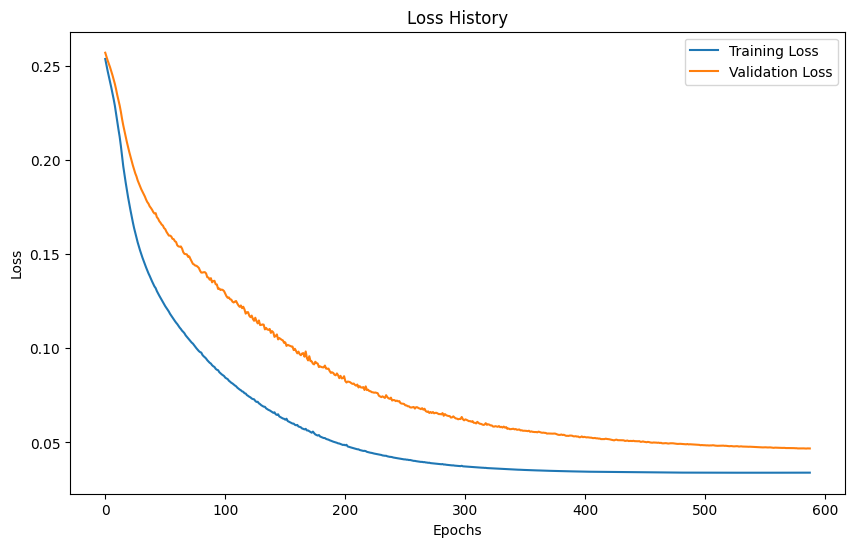


Fold 1/5
Fold 1 Evaluation Metric: 0.7200

Fold 2/5
Fold 2 Evaluation Metric: 0.8000

Fold 3/5
Fold 3 Evaluation Metric: 0.8800

Fold 4/5
Fold 4 Evaluation Metric: 0.8000

Fold 5/5
Fold 5 Evaluation Metric: 0.7083

Average Evaluation Metric over 5 folds: 0.7817

K-fold Cross-Validation Results:
{'fold_metrics': [np.float64(0.72), np.float64(0.8), np.float64(0.88), np.float64(0.8), np.float64(0.7083333333333334)], 'average_metric': np.float64(0.7816666666666667)}

Fold 1/5

Fold 1/5

Fold 1/5
Fold 1 Evaluation Metric: 0.6800

Fold 2/5

Fold 1/5
Fold 1 Evaluation Metric: 0.7600

Fold 2/5

Fold 1/5
Fold 1 Evaluation Metric: 0.6800

Fold 2/5

Fold 1/5
Fold 1 Evaluation Metric: 0.7200
Fold 1 Evaluation Metric: 0.7600

Fold 2/5

Fold 2/5
Fold 2 Evaluation Metric: 0.6400

Fold 3/5
Fold 2 Evaluation Metric: 0.6400

Fold 3/5

Fold 1/5
Fold 1 Evaluation Metric: 0.7200

Fold 2/5
Fold 2 Evaluation Metric: 0.6400

Fold 3/5
Fold 1 Evaluation Metric: 0.7200

Fold 2/5
Fold 2 Evaluation Metric: 0.6400

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, ParameterGrid  # Using scikit-learn, but just  for cross-validation and grid search SETUP (split or combination generation).
from joblib import Parallel, delayed  # For running grid search evaluations in parallel.

from lib.data_loader import get_monks_dataset  # Custom function to load one of the Monks datasets.

# ============================
# Activation functions and their derivatives
# ============================
# These functions define common activation functions used in neural networks,
# along with their derivatives needed for backpropagation.

def sigmoid(x):
    # Compute the sigmoid activation: 1 / (1 + exp(-x))
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(z, a):
    # Compute derivative of sigmoid using the already computed activation value.
    # Note: z (the pre-activation) is not used here; it is kept to maintain a uniform signature.
    return a * (1 - a)

def relu(x):
    # Compute the Rectified Linear Unit (ReLU): max(0, x)
    return np.maximum(0, x)

def relu_derivative(z, a):
    # Derivative of ReLU: 1 if z > 0, else 0.
    # Using z (the pre-activation) here to decide where the gradient flows.
    return (z > 0).astype(float)

def linear(x):
    # Linear activation (identity function): useful for regression output layers.
    return x

def linear_derivative(z, a):
    # Derivative of a linear function is constant 1.
    return np.ones_like(a)

# Dictionaries to map activation function names to their implementations.
activation_functions = {
    "sigmoid": sigmoid,
    "relu": relu,
    "linear": linear
}

# Similarly, mapping names to derivative functions.
activation_derivatives = {
    "sigmoid": lambda z, a: sigmoid_derivative(z, a),
    "relu": lambda z, a: relu_derivative(z, a),
    "linear": lambda z, a: linear_derivative(z, a)
}

# ============================
# Loss functions and their derivatives
# ============================
# Here we define loss functions for different tasks (binary classification and regression)
# along with their derivatives for backpropagation.

def binary_crossentropy_loss(y_true, y_pred):
    """
    Compute binary crossentropy loss for binary classification.
    Clipping is used to avoid taking the log of zero.
    """
    epsilon = 1e-8
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

def binary_crossentropy_derivative(y_true, y_pred):
    """
    Derivative of the binary crossentropy loss with respect to predictions.
    """
    epsilon = 1e-8
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return - (y_true / y_pred) + ((1 - y_true) / (1 - y_pred))

def mse_loss(y_true, y_pred):
    """
    Compute Mean Squared Error (MSE) loss, typically used for regression tasks.
    """
    return np.mean((y_true - y_pred) ** 2)

def mse_derivative(y_true, y_pred):
    """
    Derivative of the Mean Squared Error (MSE) loss.
    """
    return 2 * (y_pred - y_true)

def mee_loss(y_true, y_pred):
    """
    Compute Mean Euclidean Error (MEE) loss:
    For each sample, calculates the Euclidean distance between y_true and y_pred.
    """
    diff = y_true - y_pred  # Difference between true and predicted values.
    # Compute Euclidean distance for each sample.
    dist = np.sqrt(np.sum(diff ** 2, axis=1))
    return np.mean(dist)

def mee_derivative(y_true, y_pred):
    """
    Compute derivative of the Mean Euclidean Error (MEE) loss.
    For each sample, the derivative is (1/N) * ((y_pred - y_true) / ||y_pred - y_true||).
    An epsilon is used to avoid division by zero.
    """
    diff = y_pred - y_true
    dist = np.sqrt(np.sum(diff ** 2, axis=1, keepdims=True))
    epsilon = 1e-8  # Small constant to avoid division by zero.
    dist_safe = np.where(dist == 0, epsilon, dist)
    N = y_true.shape[0]
    derivative = diff / dist_safe / N
    return derivative

# Dictionaries to map loss function names to their implementations.
loss_functions = {
    "binary_crossentropy": binary_crossentropy_loss,
    "mse": mse_loss,
    "mee": mee_loss,  
}

loss_derivatives = {
    "binary_crossentropy": binary_crossentropy_derivative,
    "mse": mse_derivative,
    "mee": mee_derivative, 
}

# ============================
# Regularization functions (modular)
# ============================
# Functions to compute regularization loss and gradients (L1 and L2) to avoid overfitting.

def compute_reg_gradient(W, lambda_reg, reg_type, m):
    # Compute regularization gradient for a weight matrix W.
    if reg_type == "l2":
        return lambda_reg * W / m
    elif reg_type == "l1":
        return lambda_reg * np.sign(W) / m
    else:
        return 0

def compute_reg_loss(W_list, lambda_reg, reg_type):
    # Compute the total regularization loss over a list of weight matrices.
    if reg_type == "l2":
        return (lambda_reg / 2) * sum(np.sum(W ** 2) for W in W_list)
    elif reg_type == "l1":
        return lambda_reg * sum(np.sum(np.abs(W)) for W in W_list)
    else:
        return 0

# ============================
# Neural Network Class with Learning Rate Decay, Momentum, Custom Weight Initialization, and Early Stopping
# ============================
# This class implements a feed-forward neural network with several advanced features.
# I designed it to be flexible and modular so I can experiment with different training strategies.

class NeuralNetwork:
    def __init__(self, layers, learning_rate=0.01, lambda_reg=0.001, reg_type="l2",
                 loss_function_name=None,
                 activation_function_name="relu",
                 output_activation_function_name=None,
                 activation_function_names=None,
                 task="classification",
                 lr_decay_type="none",  # Options: "none", "exponential", "linear"
                 decay_rate=0.0,
                 weight_init="base",  # "base" (fan-in scaling) or "glorot"
                 momentum_type="none",  # Options: "none", "momentum", "nesterov momentum"
                 momentum_alpha=0.9):
        """
        Initialize the neural network with architecture and training hyperparameters.
        
        Parameters:
            layers: List with the number of neurons per layer (input, hidden, output).
            learning_rate: Starting learning rate.
            lambda_reg: Regularization coefficient.
            reg_type: Regularization type ("l2", "l1", or none).
            loss_function_name: Loss function to use (set based on task if None).
            activation_function_name: Default activation for hidden layers.
            output_activation_function_name: Activation for the output layer (set based on task if None).
            activation_function_names: List of activations per layer (overrides defaults if provided).
            task: "classification" or "regression".
            lr_decay_type: Learning rate decay strategy.
            decay_rate: Decay rate factor.
            weight_init: Weight initialization strategy.
            momentum_type: Momentum strategy.
            momentum_alpha: Momentum coefficient.
        """
        self.layers = layers
        self.initial_learning_rate = learning_rate  # Save the initial learning rate for decay computations.
        self.learning_rate = learning_rate
        self.lambda_reg = lambda_reg
        self.reg_type = reg_type
        self.task = task
        self.lr_decay_type = lr_decay_type
        self.decay_rate = decay_rate
        self.weight_init = weight_init
        
        # Set momentum parameters; validate the input.
        if momentum_type not in {"none", "momentum", "nesterov momentum"}:
            raise ValueError("momentum_type must be 'none', 'momentum', or 'nesterov momentum'.")
        self.momentum_type = momentum_type
        self.momentum_alpha = momentum_alpha if momentum_type != "none" else 0.0
        
        # Set default loss and output activation based on the task.
        if self.task == "regression":
            self.loss_function_name = loss_function_name or "mse"
            output_activation_function_name = output_activation_function_name or "linear"
        else:
            # For classification tasks.
            self.loss_function_name = loss_function_name or "binary_crossentropy"
            output_activation_function_name = output_activation_function_name or "sigmoid"
        
        # Set activation functions for each layer.
        if activation_function_names is None:
            # Use a default activation for all hidden layers and a specific one for the output layer.
            self.activation_function_names = [activation_function_name] * (len(layers) - 1)
            self.activation_function_names[-1] = output_activation_function_name
        else:
            if len(activation_function_names) != len(layers) - 1:
                raise ValueError("activation_function_names must have length equal to len(layers)-1.")
            self.activation_function_names = activation_function_names
        
        # Initialize weights and biases for the network.
        self._initialize_parameters()
        # Initialize momentum accumulators (even if not used, for consistency).
        self.vW = [np.zeros_like(W) for W in self.W]
        self.vb = [np.zeros_like(b) for b in self.b]
        
        # Loss history lists (these will be reinitialized in train()).
        self.train_loss_history = []
        self.val_loss_history = None

    def _initialize_parameters(self):
        """
        Initialize the weights and biases for each layer using either base (fan-in) or Glorot initialization.
        """
        self.W = []
        self.b = []
        np.random.seed(42)  # For reproducibility.
        for i in range(len(self.layers) - 1):
            fan_in = self.layers[i]
            fan_out = self.layers[i + 1]
            if self.weight_init == "base":
                std = np.sqrt(1.0 / fan_in)
            elif self.weight_init == "glorot":
                std = np.sqrt(2.0 / (fan_in + fan_out))
            else:
                raise ValueError("Unsupported weight initialization strategy. Use 'base' or 'glorot'.")
            weight = np.random.randn(fan_in, fan_out) * std  # Initialize weights with Gaussian noise.
            self.W.append(weight)
            self.b.append(np.zeros((1, fan_out)))  # Biases are initialized to zero.
    
    def _apply_activation(self, x, func_name):
        """
        Helper to apply an activation function based on its name.
        """
        if func_name not in activation_functions:
            raise ValueError(f"Unsupported activation: {func_name}")
        return activation_functions[func_name](x)
    
    def _apply_activation_derivative(self, z, a, func_name):
        """
        Helper to apply the derivative of an activation function based on its name.
        """
        if func_name not in activation_derivatives:
            raise ValueError(f"Unsupported activation derivative: {func_name}")
        return activation_derivatives[func_name](z, a)
    
    def _forward(self, X, weights=None, biases=None):
        """
        Forward propagation through the network.
        If custom weights and biases are provided (e.g., for Nesterov momentum lookahead), use them.
        Returns:
            Z: List of pre-activation values for each layer.
            A: List of activations for each layer (including input and output).
        """
        if weights is None:
            weights = self.W
        if biases is None:
            biases = self.b
            
        A = [X]  # Start with the input layer.
        Z = []
        # Propagate through hidden layers.
        for i in range(len(weights) - 1):
            z_curr = np.dot(A[-1], weights[i]) + biases[i]
            Z.append(z_curr)
            a_curr = self._apply_activation(z_curr, self.activation_function_names[i])
            A.append(a_curr)
        # Process the output layer separately.
        z_out = np.dot(A[-1], weights[-1]) + biases[-1]
        Z.append(z_out)
        a_out = self._apply_activation(z_out, self.activation_function_names[-1])
        A.append(a_out)
        return Z, A
    
    def _compute_gradients(self, X, y, Z, A, weights=None):
        """
        Compute gradients for weights and biases via backpropagation.
        
        Parameters:
            X: Input batch.
            y: True labels/targets.
            Z: Pre-activation values collected during forward pass.
            A: Activations collected during forward pass.
            weights: Optional custom weights (e.g., for lookahead in Nesterov momentum).
        
        Returns:
            dW: List of gradients for weight matrices.
            db: List of gradients for bias vectors.
        """
        if weights is None:
            weights = self.W
        m = X.shape[0]
        # Compute derivative of loss w.r.t. output activation.
        dA = loss_derivatives[self.loss_function_name](y, A[-1])
        # For the output layer.
        dZ = dA * self._apply_activation_derivative(Z[-1], A[-1], self.activation_function_names[-1])
        # Regularization term for the output layer.
        reg_term = compute_reg_gradient(weights[-1], self.lambda_reg, self.reg_type, m)
        dW = [np.dot(A[-2].T, dZ) / m + reg_term]
        db = [np.sum(dZ, axis=0, keepdims=True) / m]
        
        # Backpropagate through hidden layers.
        for i in range(len(weights) - 2, -1, -1):
            dA = np.dot(dZ, weights[i + 1].T)
            dZ = dA * self._apply_activation_derivative(Z[i], A[i + 1], self.activation_function_names[i])
            reg_term = compute_reg_gradient(weights[i], self.lambda_reg, self.reg_type, m)
            dW.insert(0, np.dot(A[i].T, dZ) / m + reg_term)
            db.insert(0, np.sum(dZ, axis=0, keepdims=True) / m)
            
        return dW, db
    
    def train(self, X, y, epochs=300, batch_size=32, verbose=True,
              early_stopping=False, validation_data=None, patience=10, min_delta=0.0):
        """
        Train the neural network using mini-batch gradient descent.
        
        Features include:
         - Learning rate decay (exponential or linear).
         - Momentum (classic or Nesterov).
         - Early stopping based on validation loss.
        
        The training and validation loss histories are stored in:
            self.train_loss_history and self.val_loss_history.
        """
        # Reinitialize loss histories at the start of training.
        self.train_loss_history = []
        if validation_data is not None:
            self.val_loss_history = []
        else:
            self.val_loss_history = None

        n_samples = X.shape[0]
        best_loss = np.inf
        patience_counter = 0
        best_weights = None
        best_biases = None

        for epoch in range(epochs):
            # Update learning rate based on the selected decay strategy.
            if self.lr_decay_type == "exponential":
                self.learning_rate = self.initial_learning_rate * np.exp(-self.decay_rate * epoch)
            elif self.lr_decay_type == "linear":
                self.learning_rate = self.initial_learning_rate * max(0, 1 - self.decay_rate * epoch)
            # Otherwise, if "none", the learning rate remains constant.
            
            # Shuffle training data to ensure randomness in mini-batches.
            permutation = np.random.permutation(n_samples)
            X_shuffled = X[permutation]
            y_shuffled = y[permutation]
            
            # Process the data in mini-batches.
            for i in range(0, n_samples, batch_size):
                X_batch = X_shuffled[i:i + batch_size]
                y_batch = y_shuffled[i:i + batch_size]
                
                if self.momentum_type == "nesterov momentum":
                    # Lookahead step: adjust current parameters with momentum before computing gradients.
                    weights_lookahead = [self.W[j] - self.momentum_alpha * self.vW[j] for j in range(len(self.W))]
                    biases_lookahead = [self.b[j] - self.momentum_alpha * self.vb[j] for j in range(len(self.b))]
                    Z, A = self._forward(X_batch, weights=weights_lookahead, biases=biases_lookahead)
                    dW, db = self._compute_gradients(X_batch, y_batch, Z, A, weights=weights_lookahead)
                    # Update momentum accumulators and then update parameters.
                    for j in range(len(self.W)):
                        self.vW[j] = self.momentum_alpha * self.vW[j] + self.learning_rate * dW[j]
                        self.vb[j] = self.momentum_alpha * self.vb[j] + self.learning_rate * db[j]
                        self.W[j] -= self.vW[j]
                        self.b[j] -= self.vb[j]
                        
                elif self.momentum_type == "momentum":
                    # Standard momentum update.
                    Z, A = self._forward(X_batch)
                    dW, db = self._compute_gradients(X_batch, y_batch, Z, A)
                    for j in range(len(self.W)):
                        self.vW[j] = self.momentum_alpha * self.vW[j] + self.learning_rate * dW[j]
                        self.vb[j] = self.momentum_alpha * self.vb[j] + self.learning_rate * db[j]
                        self.W[j] -= self.vW[j]
                        self.b[j] -= self.vb[j]
                        
                else:  # No momentum.
                    Z, A = self._forward(X_batch)
                    dW, db = self._compute_gradients(X_batch, y_batch, Z, A)
                    for j in range(len(self.W)):
                        self.W[j] -= self.learning_rate * dW[j]
                        self.b[j] -= self.learning_rate * db[j]
            
            # Compute training loss over the full training set.
            _, A_full = self._forward(X)
            train_loss = loss_functions[self.loss_function_name](y, A_full[-1])
            reg_loss = compute_reg_loss(self.W, self.lambda_reg, self.reg_type)
            total_train_loss = train_loss + reg_loss
            self.train_loss_history.append(total_train_loss)
            
            # If validation data is provided, compute the validation loss.
            if validation_data is not None:
                X_val, y_val = validation_data
                _, A_val = self._forward(X_val)
                val_loss = loss_functions[self.loss_function_name](y_val, A_val[-1])
                reg_loss_val = compute_reg_loss(self.W, self.lambda_reg, self.reg_type)
                total_val_loss = val_loss + reg_loss_val
                self.val_loss_history.append(total_val_loss)
            else:
                total_val_loss = None

            # Print progress information if verbosity is enabled.
            if verbose:
                if total_val_loss is not None:
                    print(f"Epoch {epoch:4d}, Training Loss: {total_train_loss:.4f}, "
                          f"Validation Loss: {total_val_loss:.4f}, Learning Rate: {self.learning_rate:.6f}")
                else:
                    print(f"Epoch {epoch:4d}, Training Loss: {total_train_loss:.4f}, "
                          f"Learning Rate: {self.learning_rate:.6f}")
            
            # Check for early stopping if enabled and using validation data.
            if early_stopping and (validation_data is not None):
                if total_val_loss < best_loss - min_delta:
                    best_loss = total_val_loss
                    patience_counter = 0
                    # Save the best parameters so far.
                    best_weights = [w.copy() for w in self.W]
                    best_biases = [b.copy() for b in self.b]
                else:
                    patience_counter += 1
                    if patience_counter >= patience:
                        if verbose:
                            print(f"Early stopping triggered at epoch {epoch}. Restoring best model parameters.")
                        if best_weights is not None:
                            self.W = best_weights
                            self.b = best_biases
                        break

    def plot_loss_history(self):
        """
        Plot the loss history for both training and (if available) validation.
        Useful for visualizing convergence.
        """
        plt.figure(figsize=(10, 6))
        plt.plot(self.train_loss_history, label="Training Loss")
        if self.val_loss_history is not None and len(self.val_loss_history) > 0:
            plt.plot(self.val_loss_history, label="Validation Loss")
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.title("Loss History")
        plt.legend()
        plt.show()
    
    def predict(self, X):
        """
        Generate predictions for given input X.
        For classification tasks, threshold or argmax is used as needed.
        """
        _, A = self._forward(X)
        output = A[-1]
        if self.task == "classification":
            if output.shape[1] == 1:
                return (output > 0.5).astype(int)  # Binary classification threshold.
            else:
                return np.argmax(output, axis=1)  # Multi-class classification.
        else:
            return output
    
    def evaluate(self, X, y):
        """
        Evaluate the model performance.
        For regression, returns MSE.
        For classification, returns accuracy.
        """
        predictions = self.predict(X)
        if self.task == "regression":
            return mse_loss(y, predictions)
        else:
            if y.ndim > 1 and y.shape[1] > 1:
                y_true = np.argmax(y, axis=1)
            else:
                y_true = y
            return np.mean(predictions == y_true)

# ============================
# K-fold Cross-Validation Function
# ============================
# This function implements k-fold cross-validation.
# It splits the data, trains a new model for each fold, and aggregates the evaluation metrics.

def k_fold_cross_validation(model_builder, X, y, k=5, epochs=1000, batch_size=32,
                            verbose=True, early_stopping=False, patience=10, min_delta=1e-4):
    """
    Perform k-fold cross validation for a neural network.
    
    Parameters:
        model_builder: A callable that returns a new instance of NeuralNetwork.
        X: Input features.
        y: Targets.
        k: Number of folds.
        epochs: Number of training epochs per fold.
        batch_size: Batch size.
        verbose: Verbosity flag.
        early_stopping: Whether to use early stopping.
        patience: Number of epochs with no improvement before stopping.
        min_delta: Minimum change in loss to be considered an improvement.
    
    Returns:
        A dictionary with per-fold metrics and the overall average metric.
    """
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    fold_metrics = []
    fold = 1
    for train_index, val_index in kf.split(X):
        print(f"\nFold {fold}/{k}")
        X_train_fold, X_val_fold = X[train_index], X[val_index]
        y_train_fold, y_val_fold = y[train_index], y[val_index]
        
        # Build a new model instance for this fold.
        nn_model = model_builder()
        
        # Train the model using the current fold's training and validation data.
        nn_model.train(
            X_train_fold, y_train_fold,
            epochs=epochs,
            batch_size=batch_size,
            verbose=verbose,
            early_stopping=early_stopping,
            validation_data=(X_val_fold, y_val_fold),
            patience=patience,
            min_delta=min_delta
        )
        
        # Evaluate performance on the validation fold.
        metric = nn_model.evaluate(X_val_fold, y_val_fold)
        print(f"Fold {fold} Evaluation Metric: {metric:.4f}")
        fold_metrics.append(metric)
        fold += 1
    
    avg_metric = np.mean(fold_metrics)
    print(f"\nAverage Evaluation Metric over {k} folds: {avg_metric:.4f}")
    return {"fold_metrics": fold_metrics, "average_metric": avg_metric}

# ============================
# Grid Search Function with Parallelism
# ============================
# This function performs a grid search over a set of hyperparameters.
# It uses k-fold cross-validation to evaluate each hyperparameter combination
# and runs evaluations in parallel for speed.

def grid_search(model_builder, param_grid, X, y, k=5, epochs=1000, batch_size=32,
                early_stopping=False, patience=10, min_delta=1e-4, n_jobs=-1,
                maximize=True, verbose=True):
    """
    Perform grid search over the given parameter grid using k-fold cross validation.
    
    Parameters:
        model_builder: A callable that accepts hyperparameters as keyword arguments and returns a NeuralNetwork.
        param_grid: Dictionary of hyperparameters to try.
        X: Input features.
        y: Targets.
        k: Number of folds for cross validation.
        epochs: Number of epochs per fold.
        batch_size: Batch size.
        early_stopping: Whether to use early stopping.
        patience: Patience for early stopping.
        min_delta: Minimum change in loss for early stopping.
        n_jobs: Number of parallel jobs (-1 uses all available processors).
        maximize: If True, a higher evaluation metric is better.
        verbose: Verbosity flag.
    
    Returns:
        A tuple (best_result, all_results) where best_result contains the best hyperparameters and metric.
    """
    grid = list(ParameterGrid(param_grid))
    results = []

    def evaluate_params(params):
        # Create a new model instance with the current hyperparameters.
        def builder():
            return model_builder(**params)
        cv_result = k_fold_cross_validation(builder, X, y, k=k, epochs=epochs,
                                              batch_size=batch_size,
                                              early_stopping=early_stopping,
                                              patience=patience,
                                              min_delta=min_delta,
                                              verbose=False)
        metric = cv_result["average_metric"]
        if verbose:
            print(f"Params: {params} => Average Metric: {metric:.4f}")
        return (params, metric)

    # Run evaluations in parallel.
    evaluated_results = Parallel(n_jobs=n_jobs)(
        delayed(evaluate_params)(params) for params in grid
    )

    for params, metric in evaluated_results:
        results.append({"params": params, "average_metric": metric})

    # Choose the best hyperparameters based on whether a higher metric is better.
    if maximize:
        best_result = max(results, key=lambda x: x["average_metric"])
    else:
        best_result = min(results, key=lambda x: x["average_metric"])

    if verbose:
        print("\nGrid Search Results:")
        for res in results:
            print(f"Params: {res['params']}, Average Metric: {res['average_metric']:.4f}")
        print(f"\nBest Params: {best_result['params']}, Best Average Metric: {best_result['average_metric']:.4f}")

    return best_result, results

# ============================
# Testing on a Monk's Dataset
# ============================
# Load the dataset, configure the network architecture, and perform training,
# evaluation, cross-validation, and grid search.

# Load Monk's dataset (with one-hot encoding for targets).
X_train, y_train, X_test, y_test = get_monks_dataset(1, one_hot_encode=True)

# Define the network architecture.
input_size = X_train.shape[1]
hidden_units = 10
output_size = 1  # Binary classification problem.
layers = [input_size, hidden_units, output_size]

# Specify activation functions for the hidden and output layers.
activation_funcs = ["relu", "sigmoid"]

# Build a neural network classifier instance with the desired configuration.
nn_clf = NeuralNetwork(
    layers=layers,
    learning_rate=0.2,
    lambda_reg=0.001,
    reg_type="l2",
    loss_function_name="mse",       # Even for classification, trying MSE here.
    activation_function_names=activation_funcs,
    task="classification",
    lr_decay_type="linear",    # Options: "exponential", "linear", or "none"
    decay_rate=0.001,
    weight_init="base",        # Options: "base" or "glorot"
)

# Train the network.
# Early stopping is used here with the test set as validation data.
nn_clf.train(
    X_train, y_train,
    epochs=1000,
    batch_size=32,
    verbose=True,
    early_stopping=True,
    validation_data=(X_test, y_test),
    patience=10,
    min_delta=1e-4
)

# Evaluate the network's classification accuracy.
accuracy = nn_clf.evaluate(X_test, y_test)
print(f"\nNeural Network Classification Accuracy: {accuracy:.4f}")

# Plot the training and validation loss history.
nn_clf.plot_loss_history()

# ============================
# K-fold Cross-Validation Example
# ============================
def build_nn_model():
    """
    Build and return a new instance of NeuralNetwork with the current configuration.
    This function is used to generate a fresh model for each cross-validation fold.
    """
    return NeuralNetwork(
        layers=layers,
        learning_rate=0.2,
        lambda_reg=0.001,
        reg_type="l2",
        loss_function_name="mse",       
        activation_function_names=activation_funcs,
        task="classification",
        lr_decay_type="linear",    # Options: "exponential", "linear", or "none"
        decay_rate=0.001,
        weight_init="base",        # Options: "base" or "glorot"
    )

# Perform 5-fold cross validation on the training set.
cv_results = k_fold_cross_validation(
    model_builder=build_nn_model,
    X=X_train,
    y=y_train,
    k=5,
    epochs=1000,
    batch_size=32,
    verbose=False,  # Set to True if you want detailed logging for each fold.
    early_stopping=True,
    patience=10,
    min_delta=1e-4
)

print("\nK-fold Cross-Validation Results:")
print(cv_results)

# ============================
# Grid Search Example
# ============================
# Define a model builder that accepts hyperparameters as keyword arguments.
def build_nn_model_with_params(learning_rate=0.2, lambda_reg=0.001, reg_type="l2",
                               lr_decay_type="linear", decay_rate=0.001, weight_init="base"):
    return NeuralNetwork(
        layers=layers,
        learning_rate=learning_rate,
        lambda_reg=lambda_reg,
        reg_type=reg_type,
        loss_function_name="mse",       
        activation_function_names=activation_funcs,
        task="classification",
        lr_decay_type=lr_decay_type,
        decay_rate=decay_rate,
        weight_init=weight_init
    )

# Define the hyperparameter grid to search over.
param_grid = {
    "learning_rate": [0.1, 0.2],
    "lambda_reg": [0.001, 0.01],
    "lr_decay_type": ["linear", "none"],
    "decay_rate": [0.001, 0.0],
    "weight_init": ["base", "glorot"],
}

# Perform grid search with 5-fold cross validation.
# Note: You can reduce epochs for grid search to speed up computation.
best_params, all_results = grid_search(
    model_builder=build_nn_model_with_params,
    param_grid=param_grid,
    X=X_train,
    y=y_train,
    k=5,
    epochs=500,       # Reduced epochs for quicker grid search.
    batch_size=32,
    early_stopping=True,
    patience=10,
    min_delta=1e-4,
    n_jobs=-1,        # Utilize all available processors.
    maximize=True,    # For classification, higher accuracy is better.
    verbose=True
)

print("\nFinal Grid Search Best Result:")
print(best_params)
